# Descriptive Statistics and Basic Plots

This notebook contains basic EDA such as a correlation matrix, descriptive statistics, box plots, and line plots. It is the basis for all later analysis.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../../M2/carpentry/completeDF.csv')

In [20]:
df.head()

CountryName    Year  SPURBGROW  SPPOPAG25FEIN  SPPOPAG25MAIN  SPPOPDPND  \
0     Albania  1990.0   2.543043        29833.0        30896.0  61.994909   
1     Albania  1991.0   0.141061        28894.0        29109.0  62.715405   
2     Albania  1992.0   0.878430        27689.0        26863.0  63.311979   
3     Albania  1993.0   0.855535        26544.0        24681.0  63.743013   
4     Albania  1994.0   0.843726        25748.0        23079.0  64.077234   

   SPPOPDPNDOL  SPPOPDPNDYG  SPPOPGROW  SPPOPTOTL  ...   NYGDPFCSTKD  \
0     8.901594    53.093316   1.799086  3286542.0  ...  4.687984e+09   
1     9.191396    53.524009  -0.602810  3266790.0  ...  3.484063e+09   
2     9.516996    53.794984  -0.606435  3247039.0  ...  3.241802e+09   
3     9.867033    53.875979  -0.610166  3227287.0  ...  3.599532e+09   
4    10.223010    53.854224  -0.613881  3207536.0  ...  4.012270e+09   

    NYGDPFCSTKN   NYTAXNINDCD  SEPRMENRRFE  SEENRPRIMFMZS  SEPRMENRRMA  \
0  5.561554e+11  4.565230e+08    99.688721        1.00459    99.233337   
1  4.133292e+11  5.590416e+08   101.441803        1.00398   101.039749   
2  3.845887e+11  5.590416e+08   100.397087        1.01642    98.775101   
3  4.270277e+11  7.219805e+08   100.271362        1.03497    96.882889   
4  4.759926e+11  1.058321e+09   100.879402        0.98764   102.142090   

   NVINDMANFKDZG  Continent          Region1  ISO3  
0      -1.330062     Europe  Southern Europe   ALB  
1       4.437151     Europe  Southern Europe   ALB  
2       4.437151     Europe  Southern Europe   ALB  
3       5.424634     Europe  Southern Europe   ALB  
4       8.645841     Europe  Southern Europe   ALB  

[5 rows x 601 columns]

In [21]:
# Making it easier to find variables to run stats on

path = '../../M1/make_indicator_dict/Indicator_Dict.csv'

indicators = pd.read_csv(path)
our_vars = list(df.columns)

indicators.columns = ['Indicator_Code', 'Indicator_Name']
check = indicators.Indicator_Code.isin(our_vars)
filtered_indicators = indicators[check]

# This will be a long list of 833 variables. Many will not be as important to look at for now, but we will 
# focus on some of the major ones.

for index, row in filtered_indicators.iterrows():
    print(row['Indicator_Code'], row['Indicator_Name'])

SPPOPDPND Age dependency ratio (% of working-age population)
SPPOPDPNDOL Age dependency ratio, old
SPPOPDPNDYG Age dependency ratio, young
SPPOPAG00FEIN Age population, age 00, female, interpolated
SPPOPAG00MAIN Age population, age 00, male, interpolated
SPPOPAG01FEIN Age population, age 01, female, interpolated
SPPOPAG01MAIN Age population, age 01, male, interpolated
SPPOPAG02FEIN Age population, age 02, female, interpolated
SPPOPAG02MAIN Age population, age 02, male, interpolated
SPPOPAG03FEIN Age population, age 03, female, interpolated
SPPOPAG03MAIN Age population, age 03, male, interpolated
SPPOPAG04FEIN Age population, age 04, female, interpolated
SPPOPAG04MAIN Age population, age 04, male, interpolated
SPPOPAG05FEIN Age population, age 05, female, interpolated
SPPOPAG05MAIN Age population, age 05, male, interpolated
SPPOPAG06FEIN Age population, age 06, female, interpolated
SPPOPAG06MAIN Age population, age 06, male, interpolated
SPPOPAG07FEIN Age population, age 07, female, int

## Basic Descriptive Statistics 

To start, we will take a look at some key distributions to understand world population

In [22]:
# With so many vairables, it's not really feasible to get anything of value using df.describe() as seen below.

df.describe()

Year    SPURBGROW  SPPOPAG25FEIN  SPPOPAG25MAIN    SPPOPDPND  \
count  3150.000000  3150.000000   3.150000e+03   3.150000e+03  3150.000000   
mean   2004.500000     2.105764   4.488552e+05   4.676970e+05    63.189871   
std       8.656816     1.889727   1.438630e+06   1.546579e+06    18.191420   
min    1990.000000    -4.200641   1.543000e+03   1.540000e+03    34.763144   
25%    1997.000000     0.692320   3.971075e+04   4.016275e+04    49.065680   
50%    2004.500000     1.935439   9.579750e+04   9.449550e+04    56.349604   
75%    2012.000000     3.433152   3.266692e+05   3.315862e+05    76.511471   
max    2019.000000    17.499073   1.329699e+07   1.417965e+07   112.848666   

       SPPOPDPNDOL  SPPOPDPNDYG    SPPOPGROW     SPPOPTOTL  SPPOPTOTLFEIN  \
count  3150.000000  3150.000000  3150.000000  3.150000e+03   3.150000e+03   
mean     12.908862    50.281009     1.283769  5.460541e+07   2.707283e+07   
std       7.737086    23.815549     1.242679  1.695707e+08   8.221954e+07   
min       3.537390    17.655973    -6.766133  1.875540e+05   9.298200e+04   
25%       6.637163    28.692377     0.411159  5.285923e+06   2.665802e+06   
50%       9.457063    45.113203     1.268192  1.137567e+07   5.749146e+06   
75%      19.301791    69.902175     2.196675  4.089519e+07   2.082971e+07   
max      36.057195   107.395726     8.117946  1.407745e+09   6.854803e+08   

       ...  ENATMCO2EGFZS  ENATMCO2ELFZS  NEGDITOTLKDZG   NYGDPFCSTKD  \
count  ...    3150.000000    3150.000000    3150.000000  3.150000e+03   
mean   ...      15.575807      59.897998       6.313733  3.808634e+11   
std    ...      17.683676      27.252574      25.905310  1.474385e+12   
min    ...       0.000000      -6.088604    -164.509353  5.424932e+08   
25%    ...       0.000000      39.629087      -0.929480  1.186444e+10   
50%    ...      11.468826      59.145462       4.882841  4.546017e+10   
75%    ...      24.911162      82.734051      11.464863  2.335656e+11   
max    ...      84.795990     258.523500     887.575203  1.877171e+13   

        NYGDPFCSTKN   NYTAXNINDCD  SEPRMENRRFE  SEENRPRIMFMZS  SEPRMENRRMA  \
count  3.150000e+03  3.150000e+03  3150.000000    3150.000000  3150.000000   
mean   1.209104e+14  2.737287e+10    99.053766       0.966731   102.060920   
std    7.512334e+14  7.066263e+10    16.497648       0.077756    14.440620   
min    8.428104e+08 -1.084567e+10    17.844669       0.503430    25.513720   
25%    1.591185e+11  7.880689e+08    94.470320       0.967110    95.132074   
50%    1.282387e+12  3.221219e+09   100.576263       0.991520   101.882458   
75%    6.413615e+12  2.007489e+10   106.435440       1.002790   109.196041   
max    1.049876e+16  7.741480e+11   163.020889       1.209560   168.116974   

       NVINDMANFKDZG  
count    3150.000000  
mean        3.513970  
std         7.389698  
min       -59.700001  
25%         0.450807  
50%         3.544382  
75%         6.832964  
max        90.679387  

[8 rows x 597 columns]

In [23]:
print(df.Year.min())
print(df.Year.max())


1990.0
2019.0


In [24]:
# Looking at a few stats for first and final years in dataset

df_1973 = df[df['Year'] == 1990]
df_2019 = df[df['Year'] == 2019]

print(f'Population Metrics for 1973')
print(f'Max Pop \t{df_1973.SPPOPTOTL.max()}')
print(f'Min Pop \t{df_1973.SPPOPTOTL.min()}')
print(f'Mean Pop \t{df_1973.SPPOPTOTL.mean()}')
print(f'Std Dev Pop \t{df_1973.SPPOPTOTL.std()}')

print(f'\nPopulation Metrics for 2019')
print(f'Max Pop \t{df_2019.SPPOPTOTL.max()}')
print(f'Min Pop \t{df_2019.SPPOPTOTL.min()}')
print(f'Mean Pop \t{df_2019.SPPOPTOTL.mean()}')
print(f'Std Dev Pop \t{df_2019.SPPOPTOTL.std()}')

Population Metrics for 1973
Max Pop 	1135185000.0
Min Pop 	187554.0
Mean Pop 	44771926.82857143
Std Dev Pop 	141336063.6061071

Population Metrics for 2019
Max Pop 	1407745000.0
Min Pop 	390351.0
Mean Pop 	64300491.01904762
Std Dev Pop 	194028930.15848935


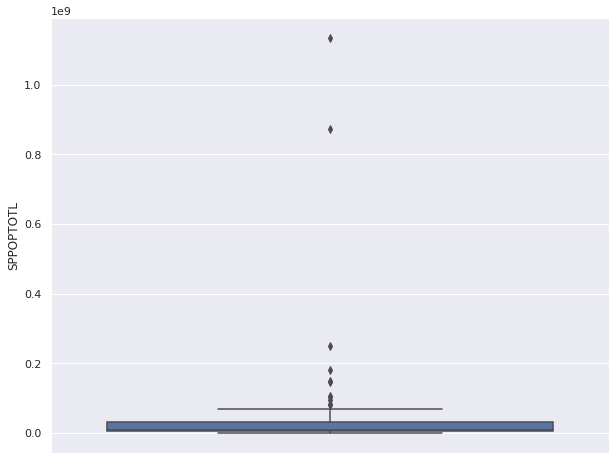

In [25]:
%matplotlib inline
sns.set(style='darkgrid')

# Taking a look at world population for the first year in the dataset and the distribution in the box-plot

plt.figure(figsize=(10,8))
sns.boxplot(x='SPPOPTOTL', data=df[df['Year'] == 1990], orient="v")

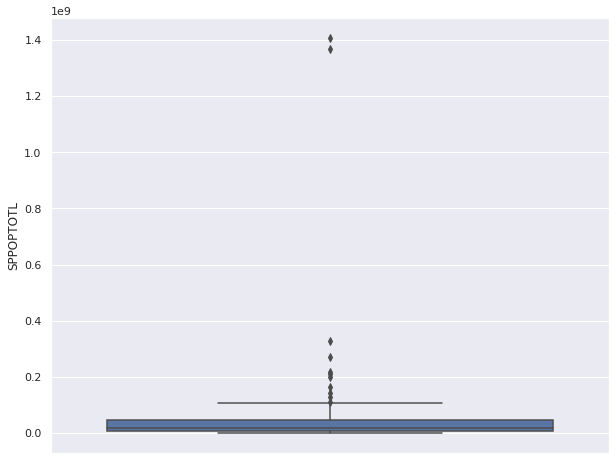

In [26]:
%matplotlib inline

# Taking a look at world population for the final year in the dataset and the distribution in the box-plot

plt.figure(figsize=(10,8))
sns.boxplot(x='SPPOPTOTL', data=df[df['Year'] == 2019], orient="v")

<function matplotlib.pyplot.show(*args, **kw)>

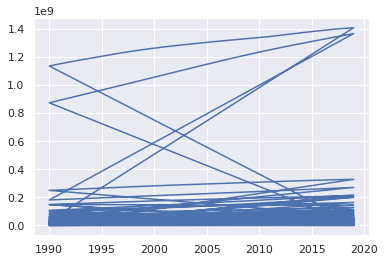

In [27]:
# Charting countries population totals over the years. This plot has some weird data anomolies we need to look
# into, mainly why some of the countries appear to have a line starting at 1990 that looks to linear going
# down to 0 in 2019

plt.plot(df.Year, df.SPPOPTOTL)
plt.show

For the above plots, it is difficult to see without making the plot y dimension huge how the majority of countries fit within the quartiles. This is due to the fact that there are some pretty significant outliers in both plots, mainly China, which have populations vastly above the rest of the world.

One interesting thing to see is how in 1973 is that there was one country (China) that was so far above the rest, but then in 2019 plot we see another one closing the gap (India). Meanwhile the rest of the world has stayed virtually the same with heavy congregation under the 0.1B population mark. 

## % of Working Age Population all countries

Running similar plots on the variable % of Working Age Population all countries.

This could be important to look at as one of our questions has to do with 'How does increasing life expectancy impact the older populations and countries economies?

What is interesting to me is the % of working population for all countries from 1973 to 2019 has condensed. We can see the median percent of working pop in 1973 was relatively high at ~85%, but in 2019 that has dropped to ~55%, which is alarming. This means that there is a higher population either young or old that is outside the working age bracket, which could indicate greater pressure on working class to support these individuals. 

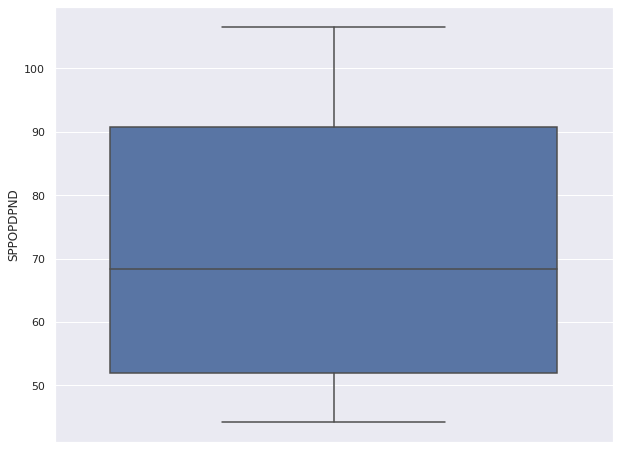

In [28]:
%matplotlib inline

# Taking a look at world population for the final year in the dataset and the distribution in the box-plot

plt.figure(figsize=(10,8))
sns.boxplot(x='SPPOPDPND', data=df[df['Year'] == 1990], orient="v")

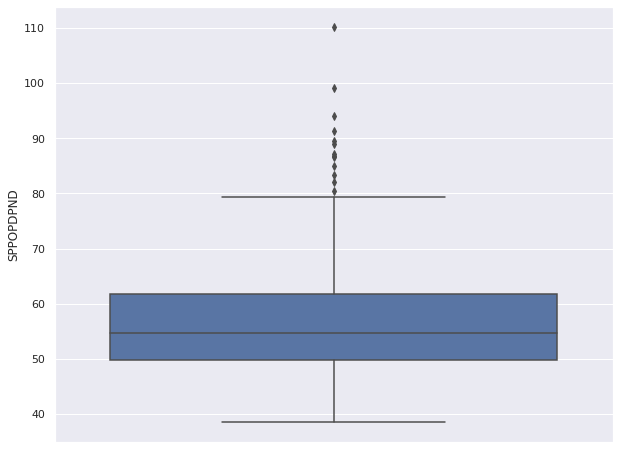

In [29]:
%matplotlib inline

# Taking a look at world population for the final year in the dataset and the distribution in the box-plot

plt.figure(figsize=(10,8))
sns.boxplot(x='SPPOPDPND', data=df[df['Year'] == 2019], orient="v")

 

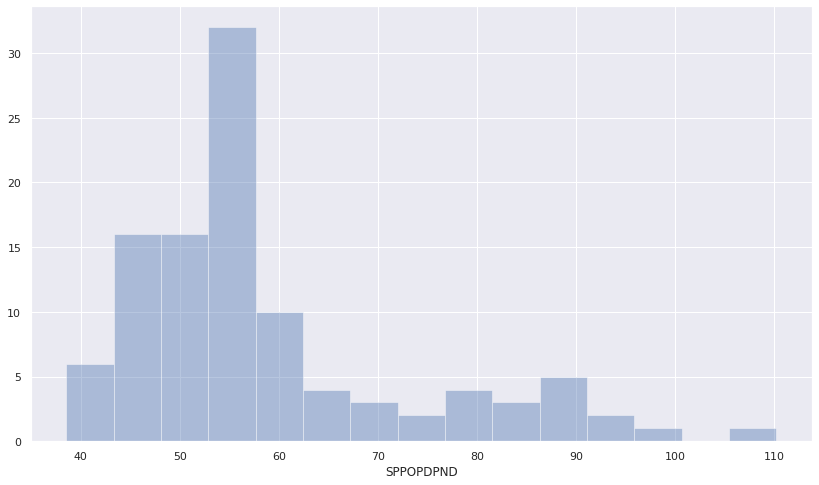

In [30]:
plt.figure(figsize=(14,8))
sns.distplot(df_2019['SPPOPDPND'], kde=False)

<function matplotlib.pyplot.show(*args, **kw)>

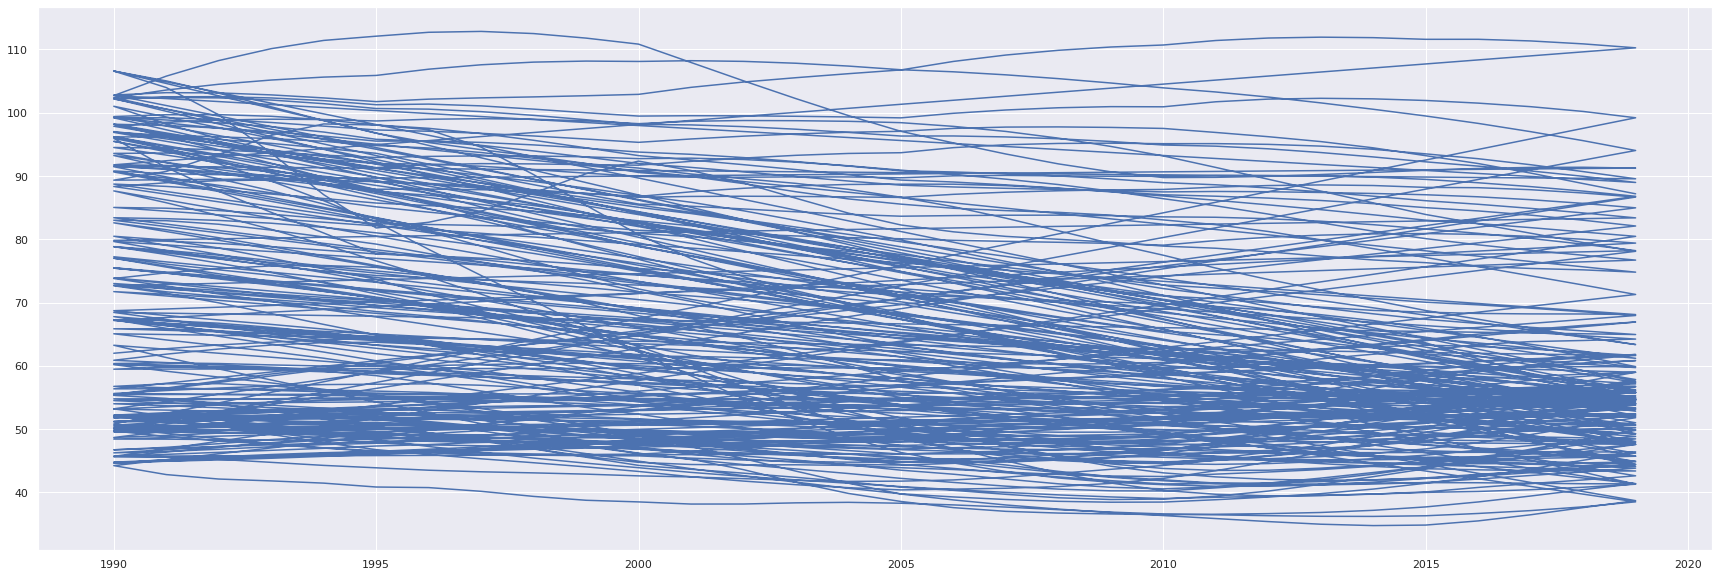

In [31]:
# This will be a mess to look at, but it does show an overall downward trend of 
# SPPOPDPND Age dependency ratio (% of working-age population)

plt.rcParams['figure.figsize'] = [30, 10]

plt.plot(df.Year, df.SPPOPDPND)
plt.show

## Plotting CO2 Emissions

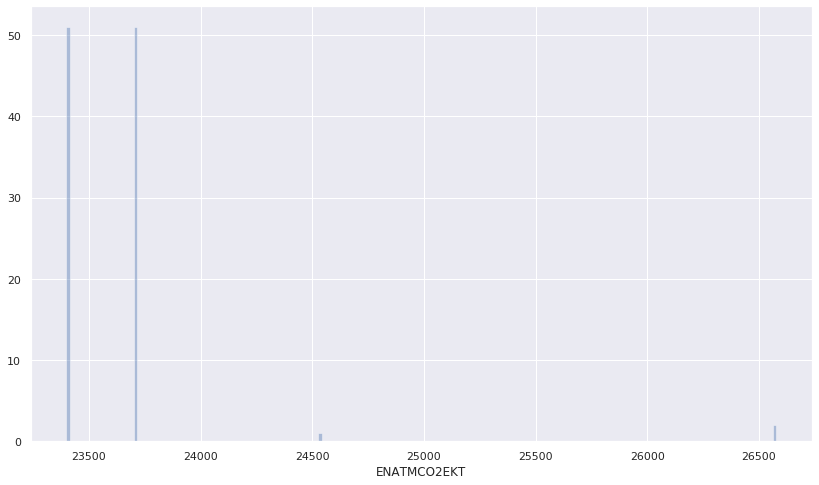

In [32]:
# In another notebook I noticed some interesting correlations with countries CO2 emissions. 
# It's diccifult to see in this plot how countries make out on this distribution since many of them 
# congregate around the 0.0e7 mark. What is alarming is there is a giant that is on the other side.
# ENATMCO2EKT CO2 emissions (kt)

plt.figure(figsize=(14,8))
sns.distplot(df_2019['ENATMCO2EKT'], bins = 200, kde=False)

<function matplotlib.pyplot.show(*args, **kw)>

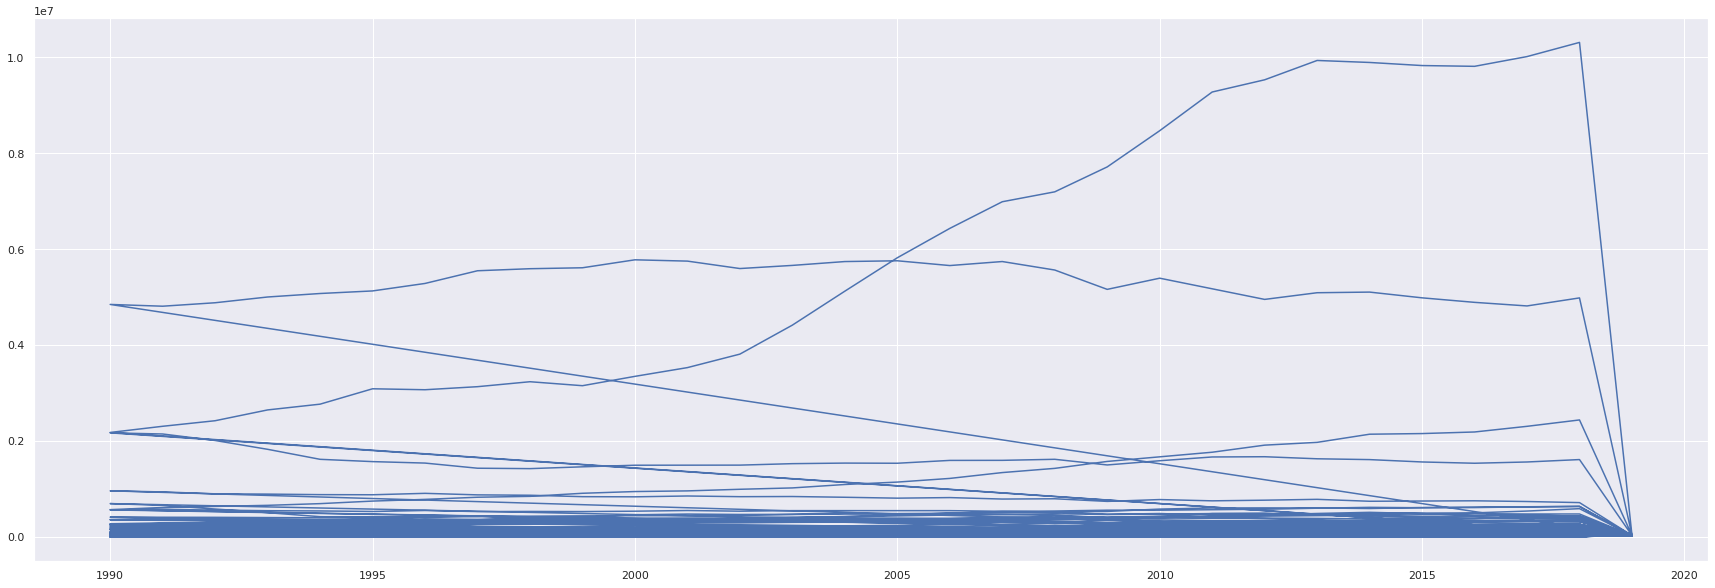

In [33]:
# Scary to see how even just a handful of the countries in the world can produce so much CO2 emissions.

plt.plot(df.Year, df.ENATMCO2EKT)
plt.show

## Compare the trends of important variables between countries

Will make educated guesses to determine the variables of highest importance. Check their distributions and see if there are any patterns/anomalies. Variables to check include those related to:

education,
access to birth control,
economic factors,
age-sex structure (number of men and women by age),
religion,
social beliefs,
female employment,
access to health care,
infant mortality rate,
and age of marraige

### Import dataframe

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('../../M2/carpentry/completeDF.csv')
print(df.shape)
df.head()

(8601, 1677)


CountryName CountryCode  Year    SHDTH0509  SHDTH0509_indicator  \
0  Afghanistan         AFG  1973  4353.848485                    1   
1  Afghanistan         AFG  1974  4353.848485                    1   
2  Afghanistan         AFG  1975  4353.848485                    1   
3  Afghanistan         AFG  1976  4353.848485                    1   
4  Afghanistan         AFG  1977  4353.848485                    1   

     SHDTH1014  SHDTH1014_indicator    SHDTH1519  SHDTH1519_indicator  \
0  2425.151515                    1  6029.272727                    1   
1  2425.151515                    1  6029.272727                    1   
2  2425.151515                    1  6029.272727                    1   
3  2425.151515                    1  6029.272727                    1   
4  2425.151515                    1  6029.272727                    1   

     SHDTH2024  ...  TXVALOTHRZSWT  TXVALOTHRZSWT_indicator  TXVALSERVCDWT  \
0  7463.212121  ...      79.684525                        1   5.705694e+08   
1  7463.212121  ...      79.684525                        1   5.705694e+08   
2  7463.212121  ...      79.684525                        1   5.705694e+08   
3  7463.212121  ...      87.676056                        1   5.680000e+07   
4  7463.212121  ...      87.676056                        1   5.680000e+07   

   TXVALSERVCDWT_indicator  TXVALTRANZSWT  TXVALTRANZSWT_indicator  \
0                        1      16.848639                        1   
1                        1      16.848639                        1   
2                        1      16.848639                        1   
3                        1      16.848639                        1   
4                        1      16.848639                        1   

   TXVALTRVLZSWT  TXVALTRVLZSWT_indicator  POPCAGR5  POPCAGR10  
0      10.995894                        1  0.026259   0.024097  
1      10.995894                        1  0.026454   0.024496  
2      10.995894                        1  0.025764   0.024551  
3      12.323944                        1  0.024362   0.024356  
4      12.323944                        1  0.022384   0.023905  

[5 rows x 1677 columns]

### Make list of countries to compare

In [35]:
df.CountryName.unique()

array(['Albania', 'Algeria', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize',
       'Benin', 'Bolivia', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Chile',
       'China', 'Colombia', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Estonia', 'Ethiopia', 'Finland', 'France', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Guatemala', 'Honduras', 'Hungary', 'India',
       'Indonesia', 'Iran, Islamic Rep.', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea, Rep.',
       'Kyrgyz Republic', 'Latvia', 'Lesotho', 'Madagascar', 'Malaysia',
       'Mali', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Morocco',
       'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'Nicaragua',
       'Niger', 'Nigeria', 'North Mac

In [37]:
# Had to remove Libya and Japan because they are not in current dataset
countries = ['United States', 'Mexico', 'Panama', 'Brazil', 'United Kingdom', \
             'Poland', 'Portugal', 'Ukraine', 'Kenya', 'China']

# Check all countries are listed correctly (error if not)
for country in countries:
    print(df[df["CountryName"] == country].head(1))

        CountryName    Year  SPURBGROW  SPPOPAG25FEIN  SPPOPAG25MAIN  \
3030  United States  1990.0   1.410256      2012936.0      2128118.0   

      SPPOPDPND  SPPOPDPNDOL  SPPOPDPNDYG  SPPOPGROW    SPPOPTOTL  ...  \
3030  52.212288    19.221039    32.991249   1.129651  249623000.0  ...   

       NYGDPFCSTKD   NYGDPFCSTKN   NYTAXNINDCD  SEPRMENRRFE  SEENRPRIMFMZS  \
3030  9.773189e+12  9.773189e+12  3.521126e+11   105.724319        0.99433   

      SEPRMENRRMA  NVINDMANFKDZG      Continent           Region1  ISO3  
3030   106.327698       2.736356  North America  Northern America   USA  

[1 rows x 601 columns]
     CountryName    Year  SPURBGROW  SPPOPAG25FEIN  SPPOPAG25MAIN  SPPOPDPND  \
1860      Mexico  1990.0   2.543528       734376.0       704381.0  77.011007   

      SPPOPDPNDOL  SPPOPDPNDYG  SPPOPGROW   SPPOPTOTL  ...   NYGDPFCSTKD  \
1860     7.610984    69.400022    1.89313  83943135.0  ...  5.915674e+11   

       NYGDPFCSTKN   NYTAXNINDCD  SEPRMENRRFE  SEENRPRIMFMZS  S

In [38]:
# Set index so plots know to plot year as x-axis
df.set_index('Year', inplace=True)

### Fertility rate (target variable)

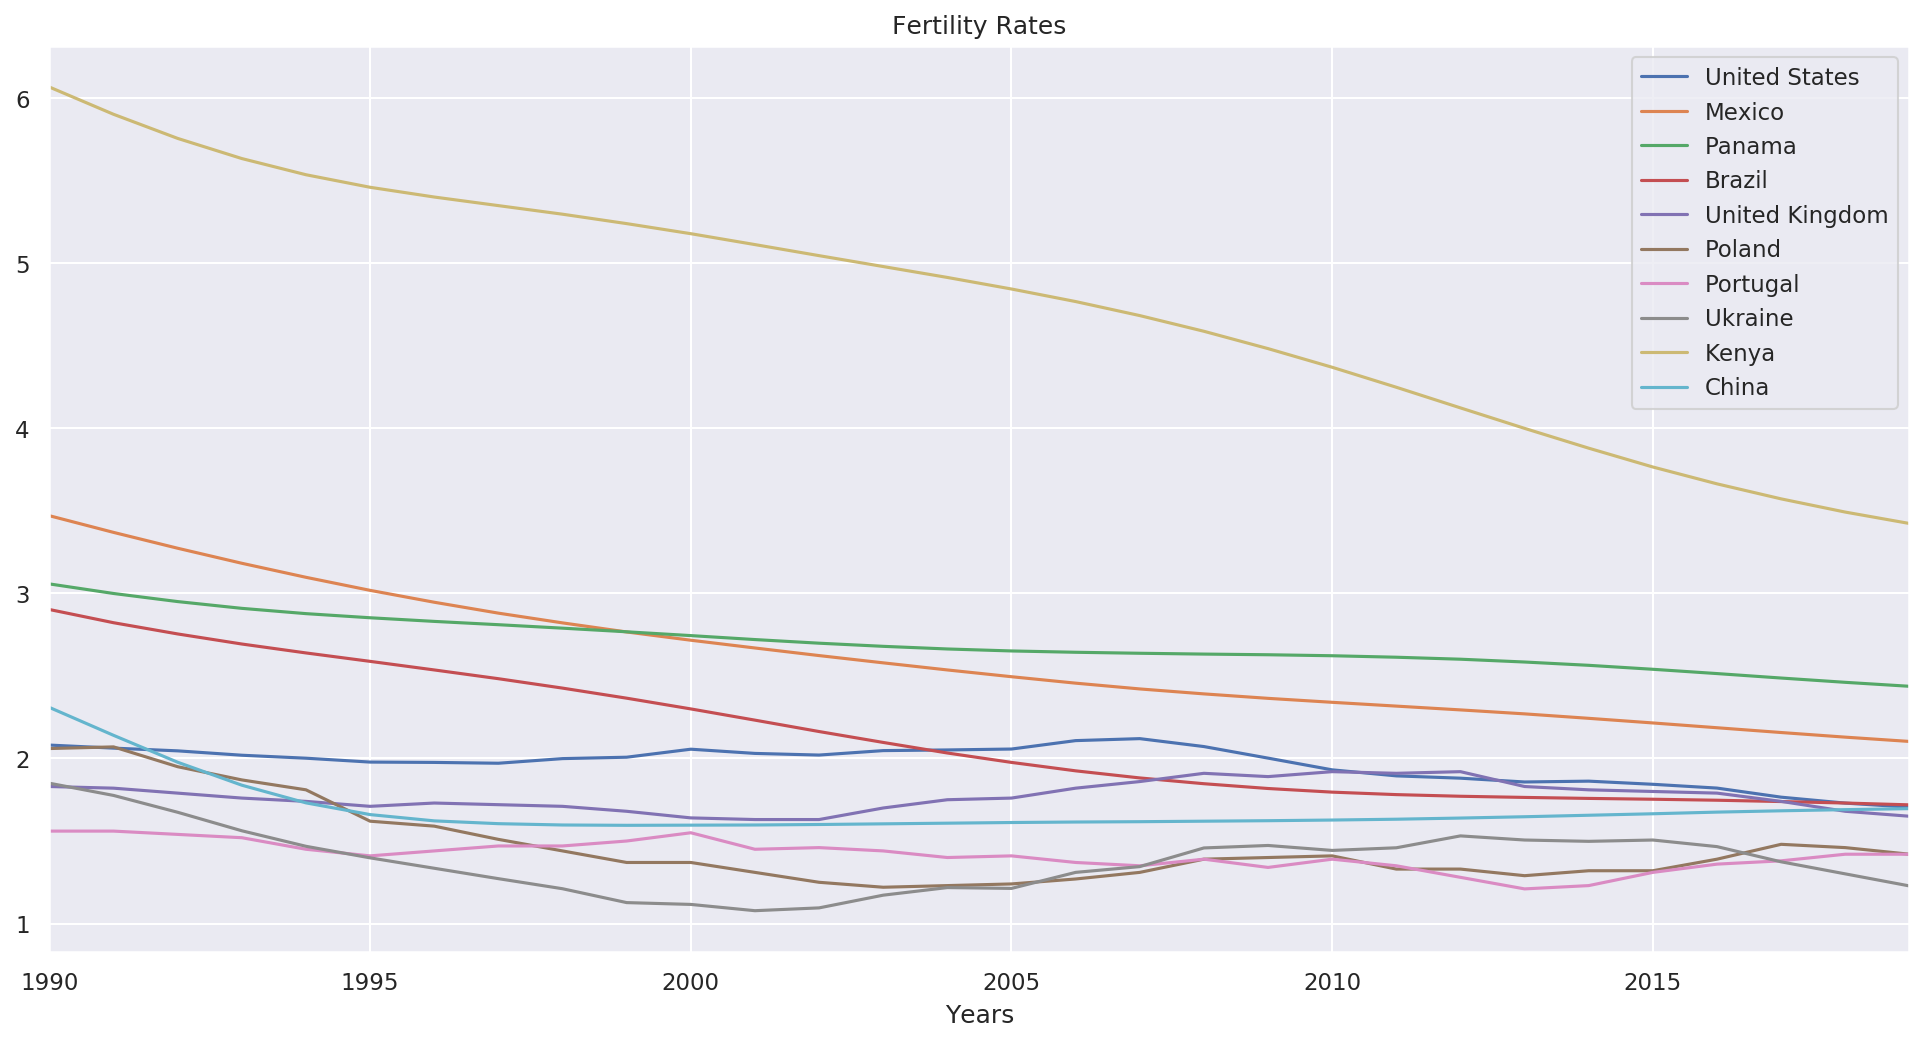

In [39]:
# set plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# draw the plots
for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SPDYNTFRTIN'].plot(label=country)

  
# adding title to the plot
plt.title('Fertility Rates')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

### Education variables

### Healthcare/family planning variables

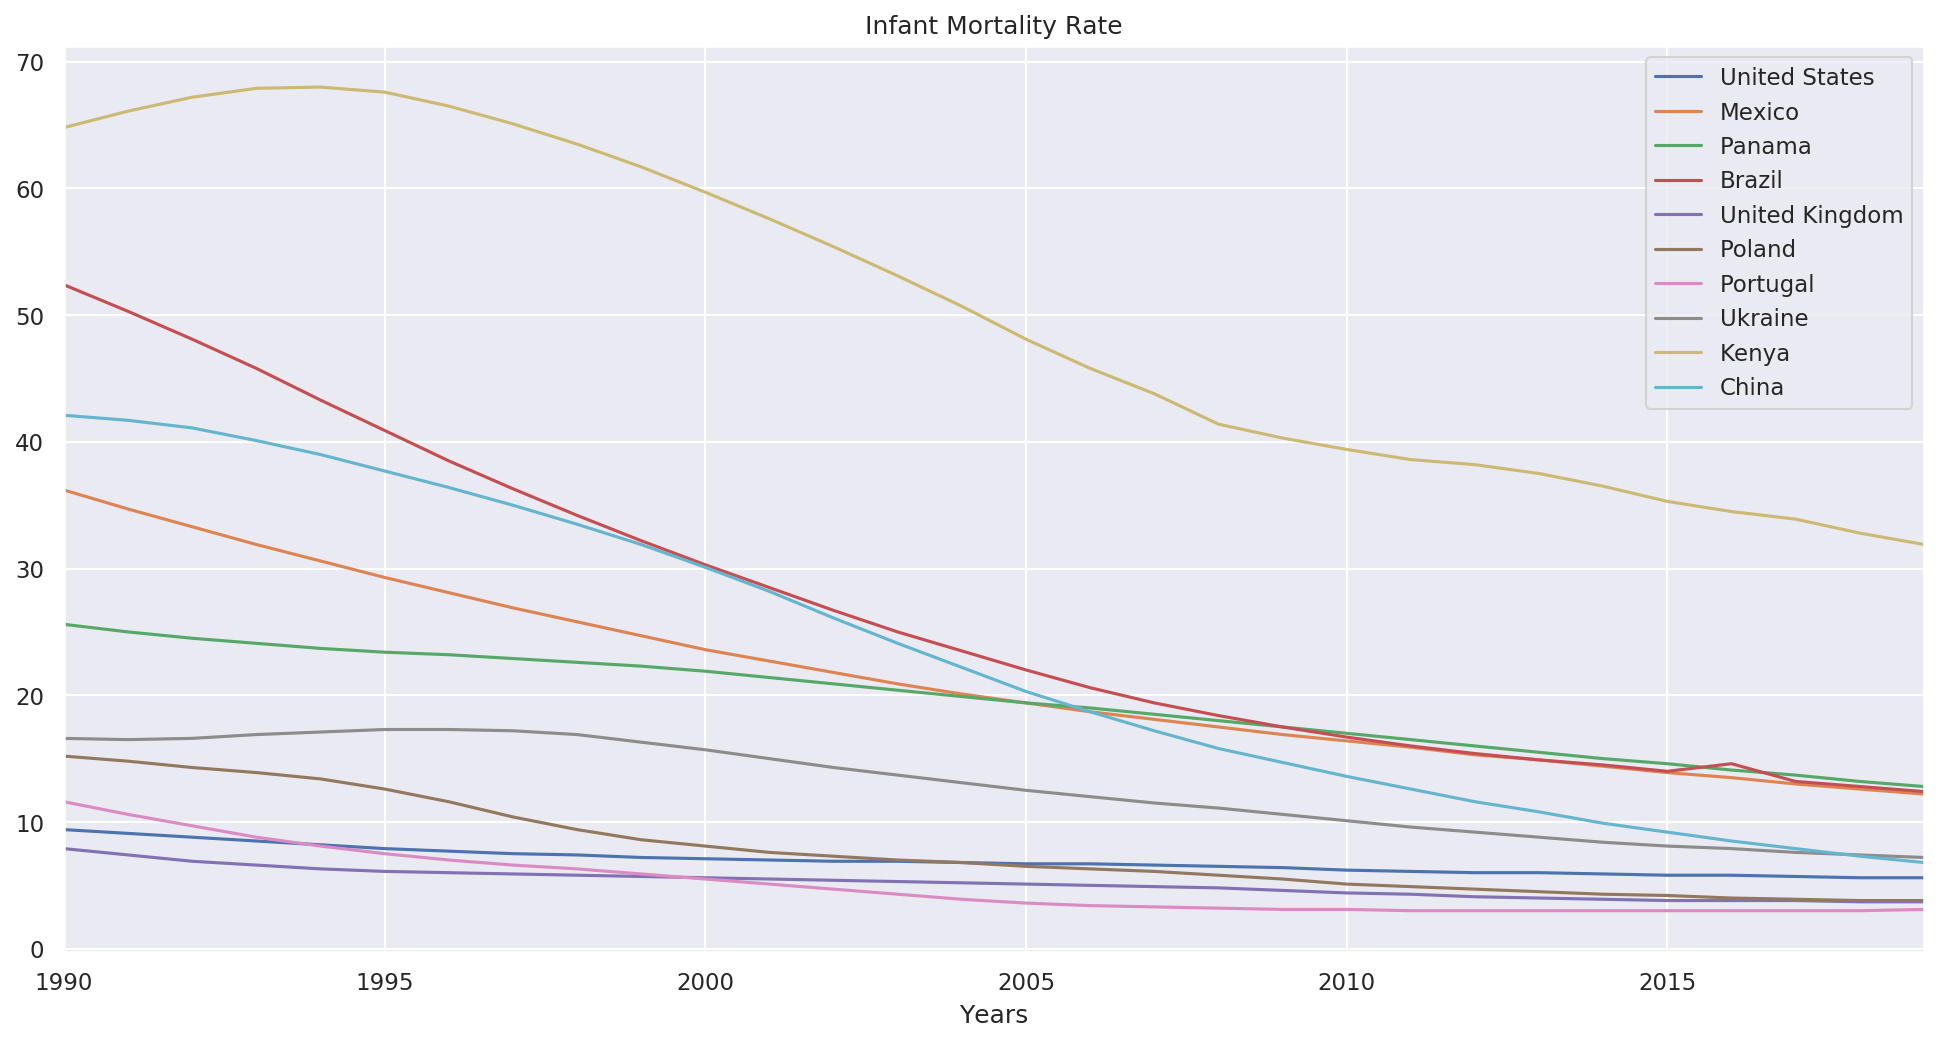

In [41]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SPDYNIMRTIN'].plot(label=country)
  
plt.title('Infant Mortality Rate')
  
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

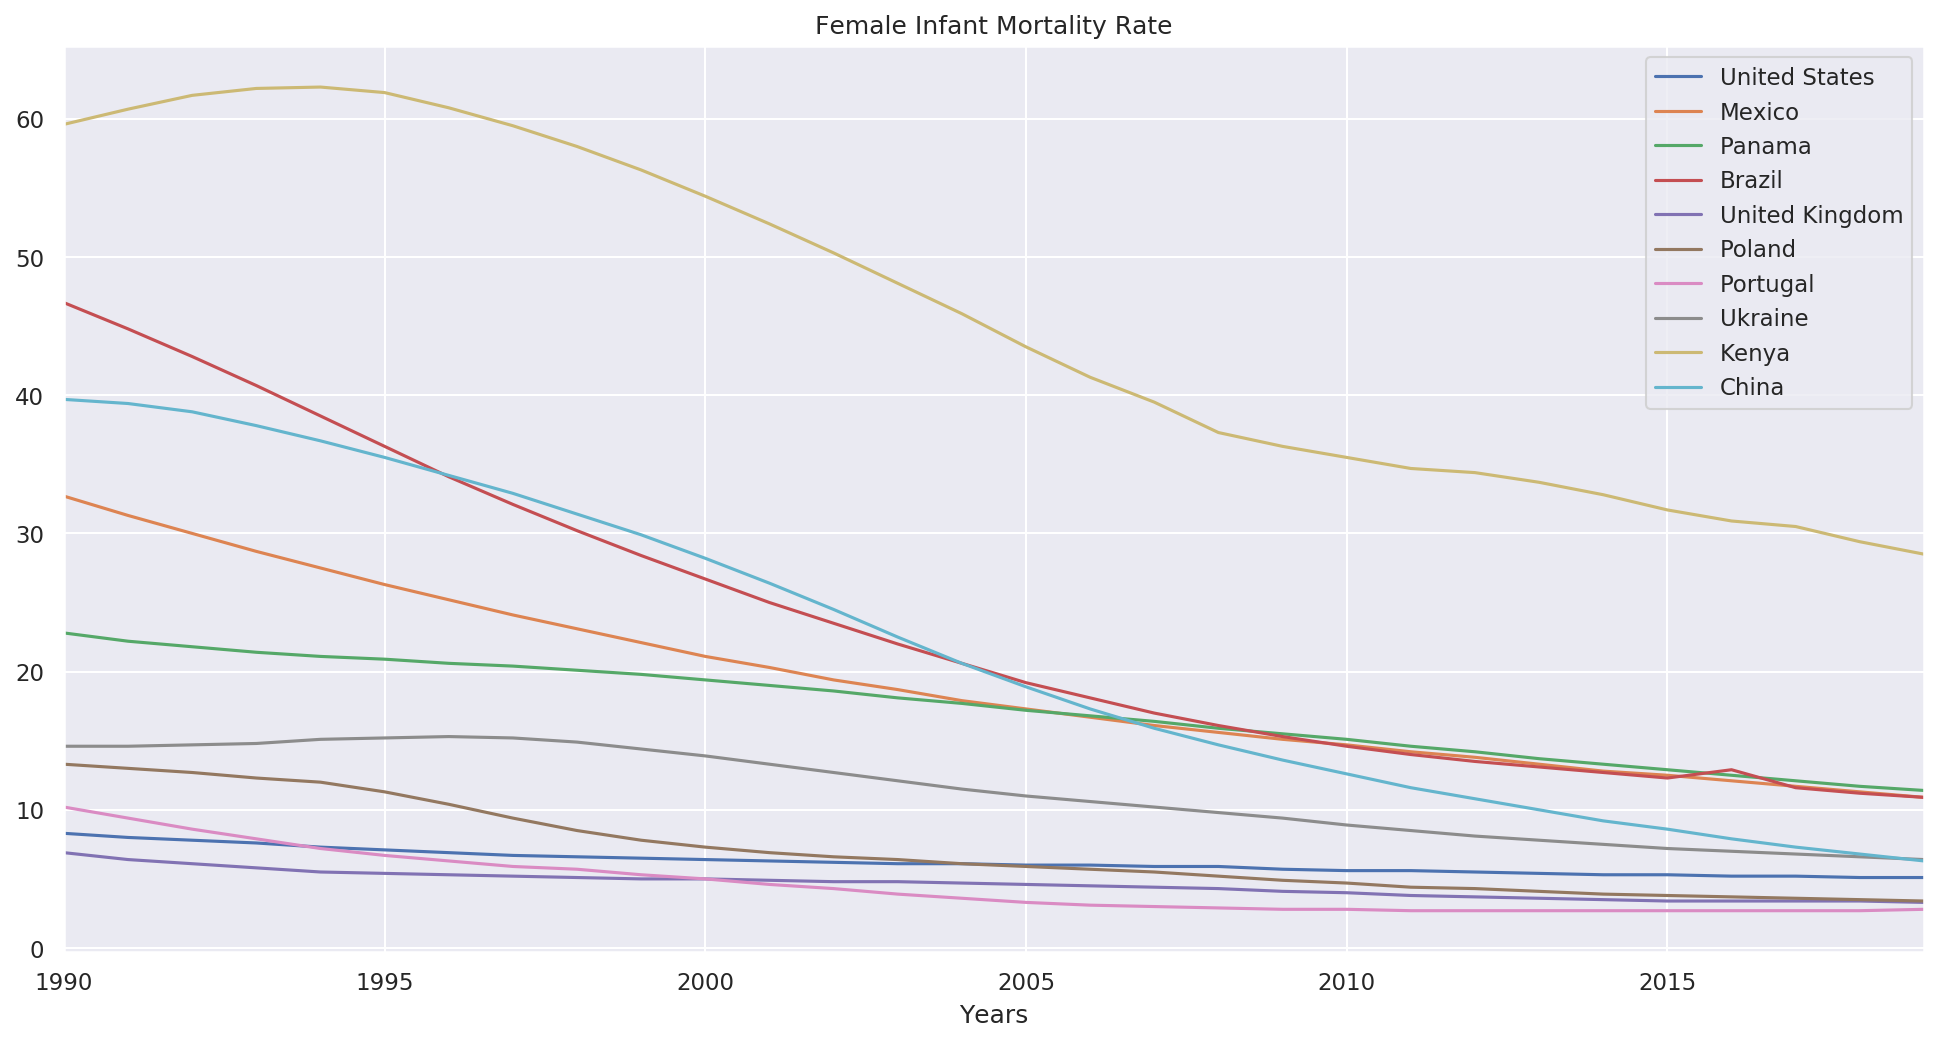

In [42]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SPDYNIMRTFEIN'].plot(label=country)
  
plt.title('Female Infant Mortality Rate')
  
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

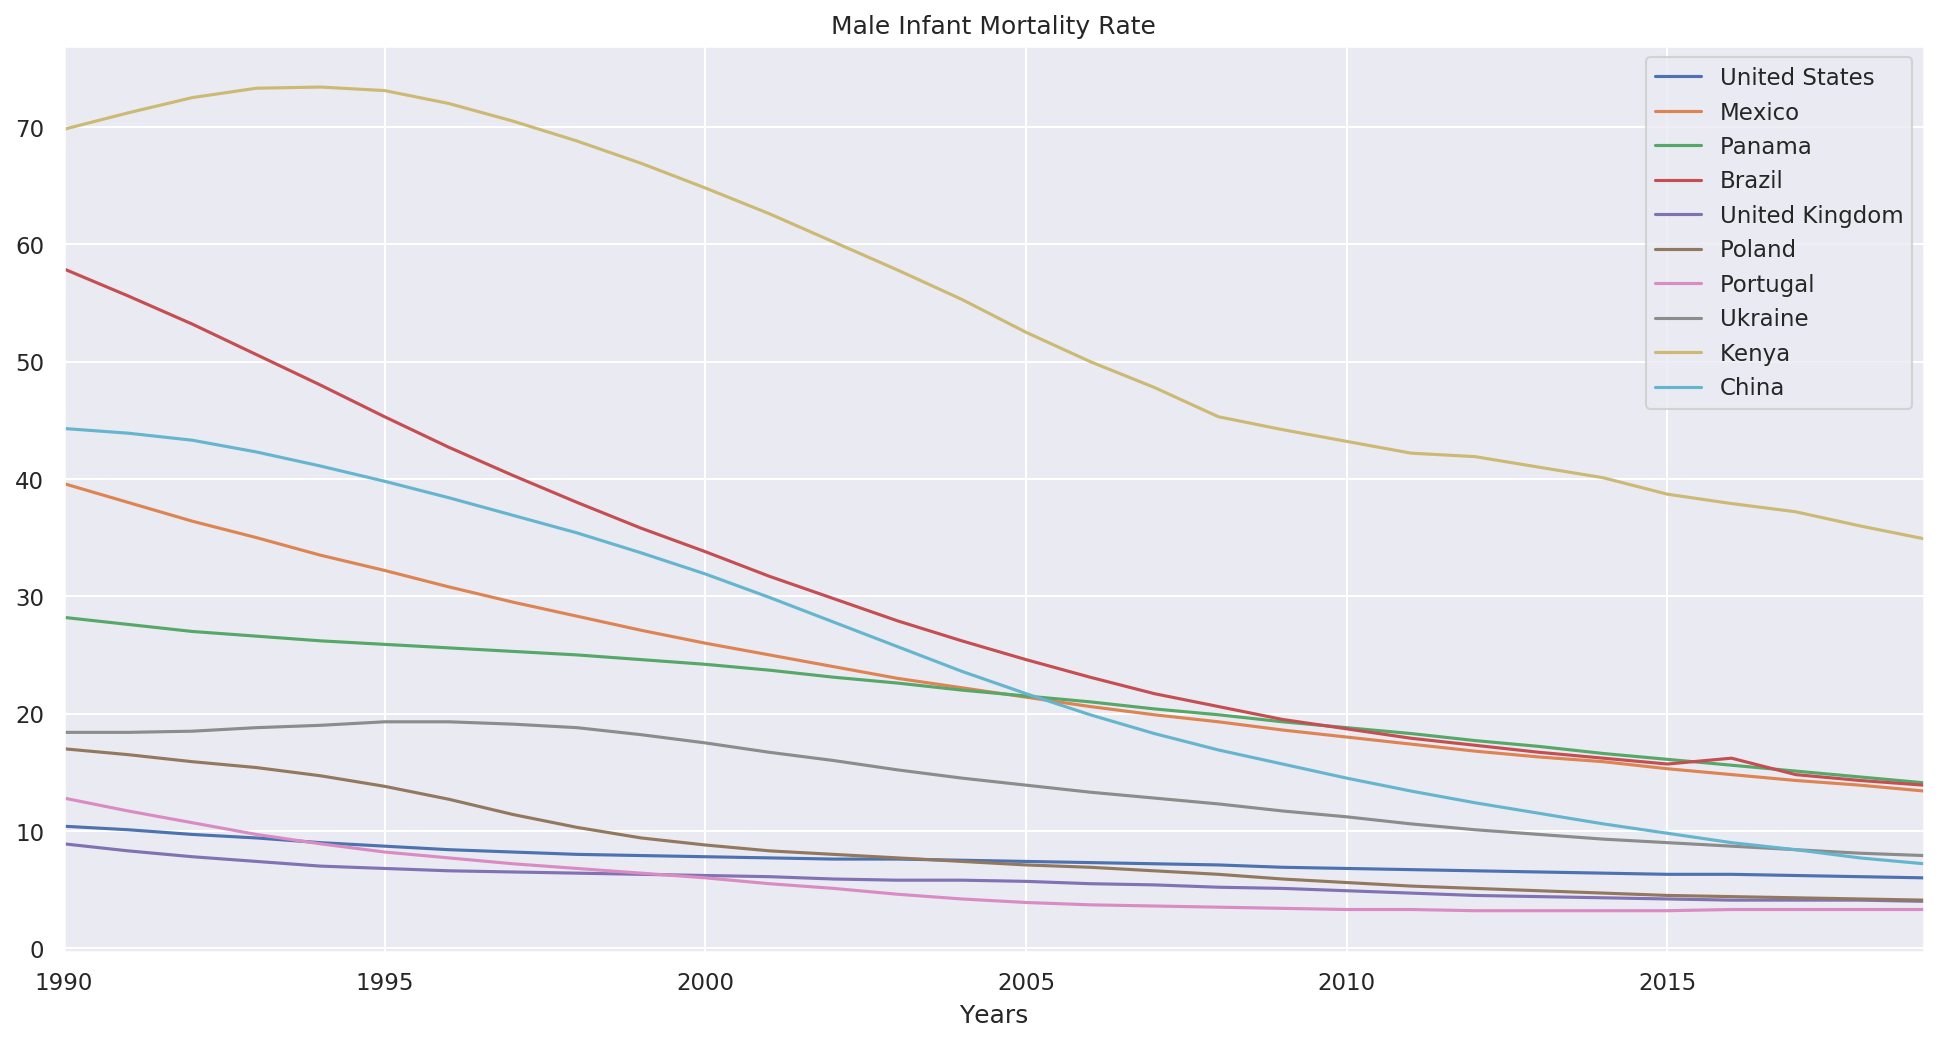

In [43]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SPDYNIMRTMAIN'].plot(label=country)
  
plt.title('Male Infant Mortality Rate')
  
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

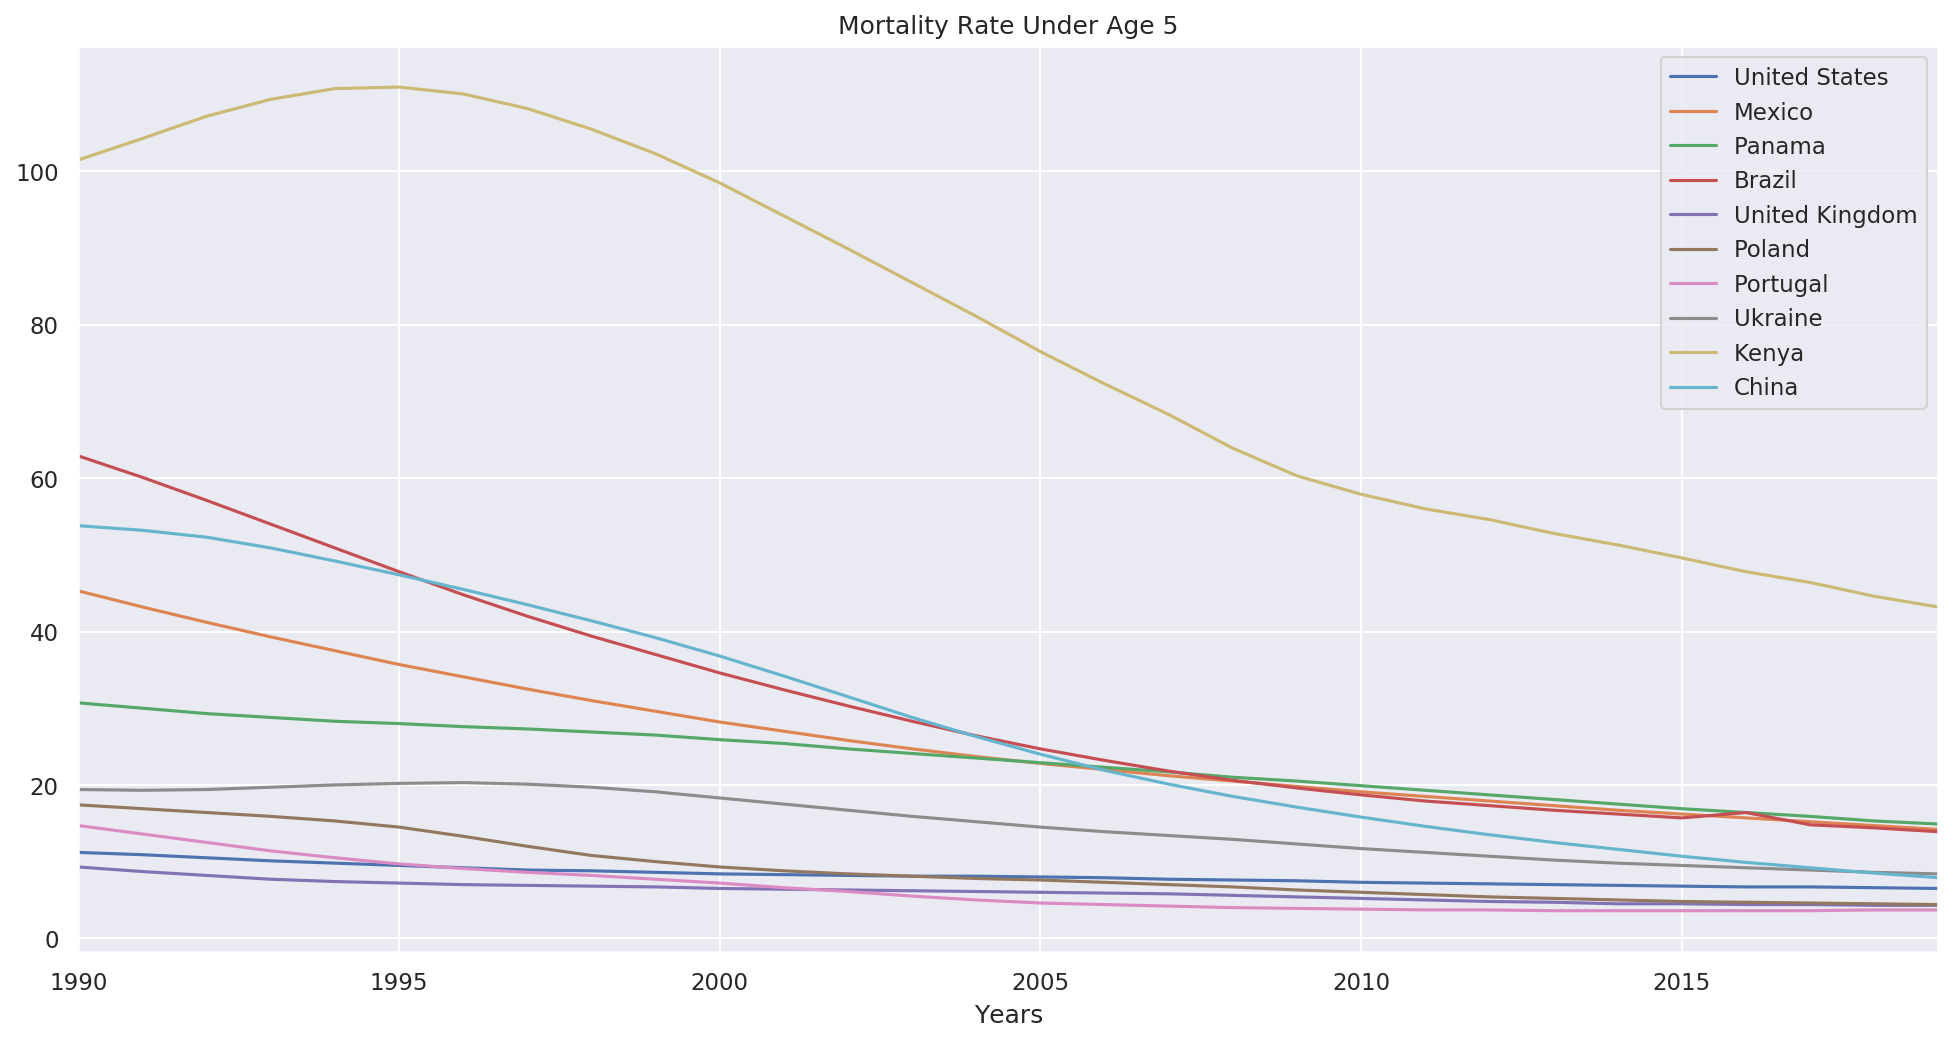

In [44]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SHDYNMORT'].plot(label=country)
  
plt.title('Mortality Rate Under Age 5')
  
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

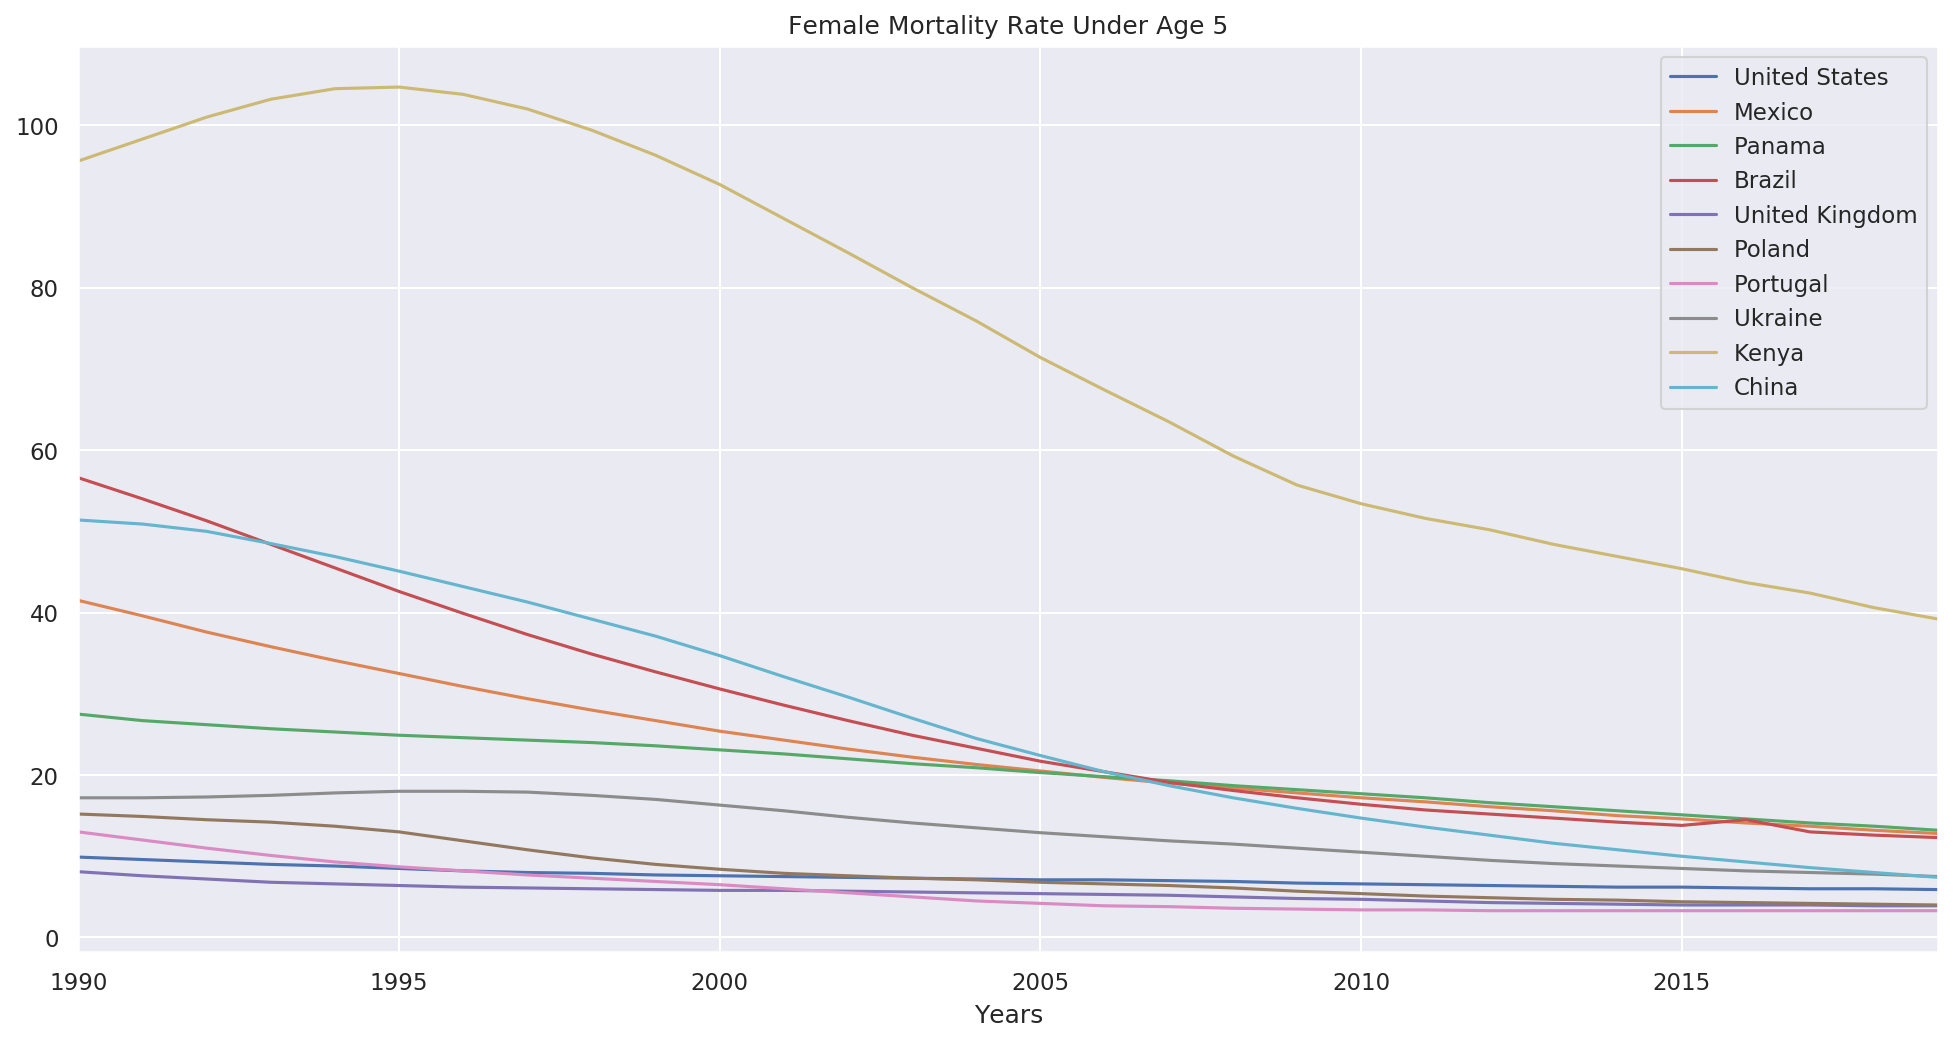

In [45]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SHDYNMORTFE'].plot(label=country)
  
plt.title('Female Mortality Rate Under Age 5')
  
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

### Marriage and social issues

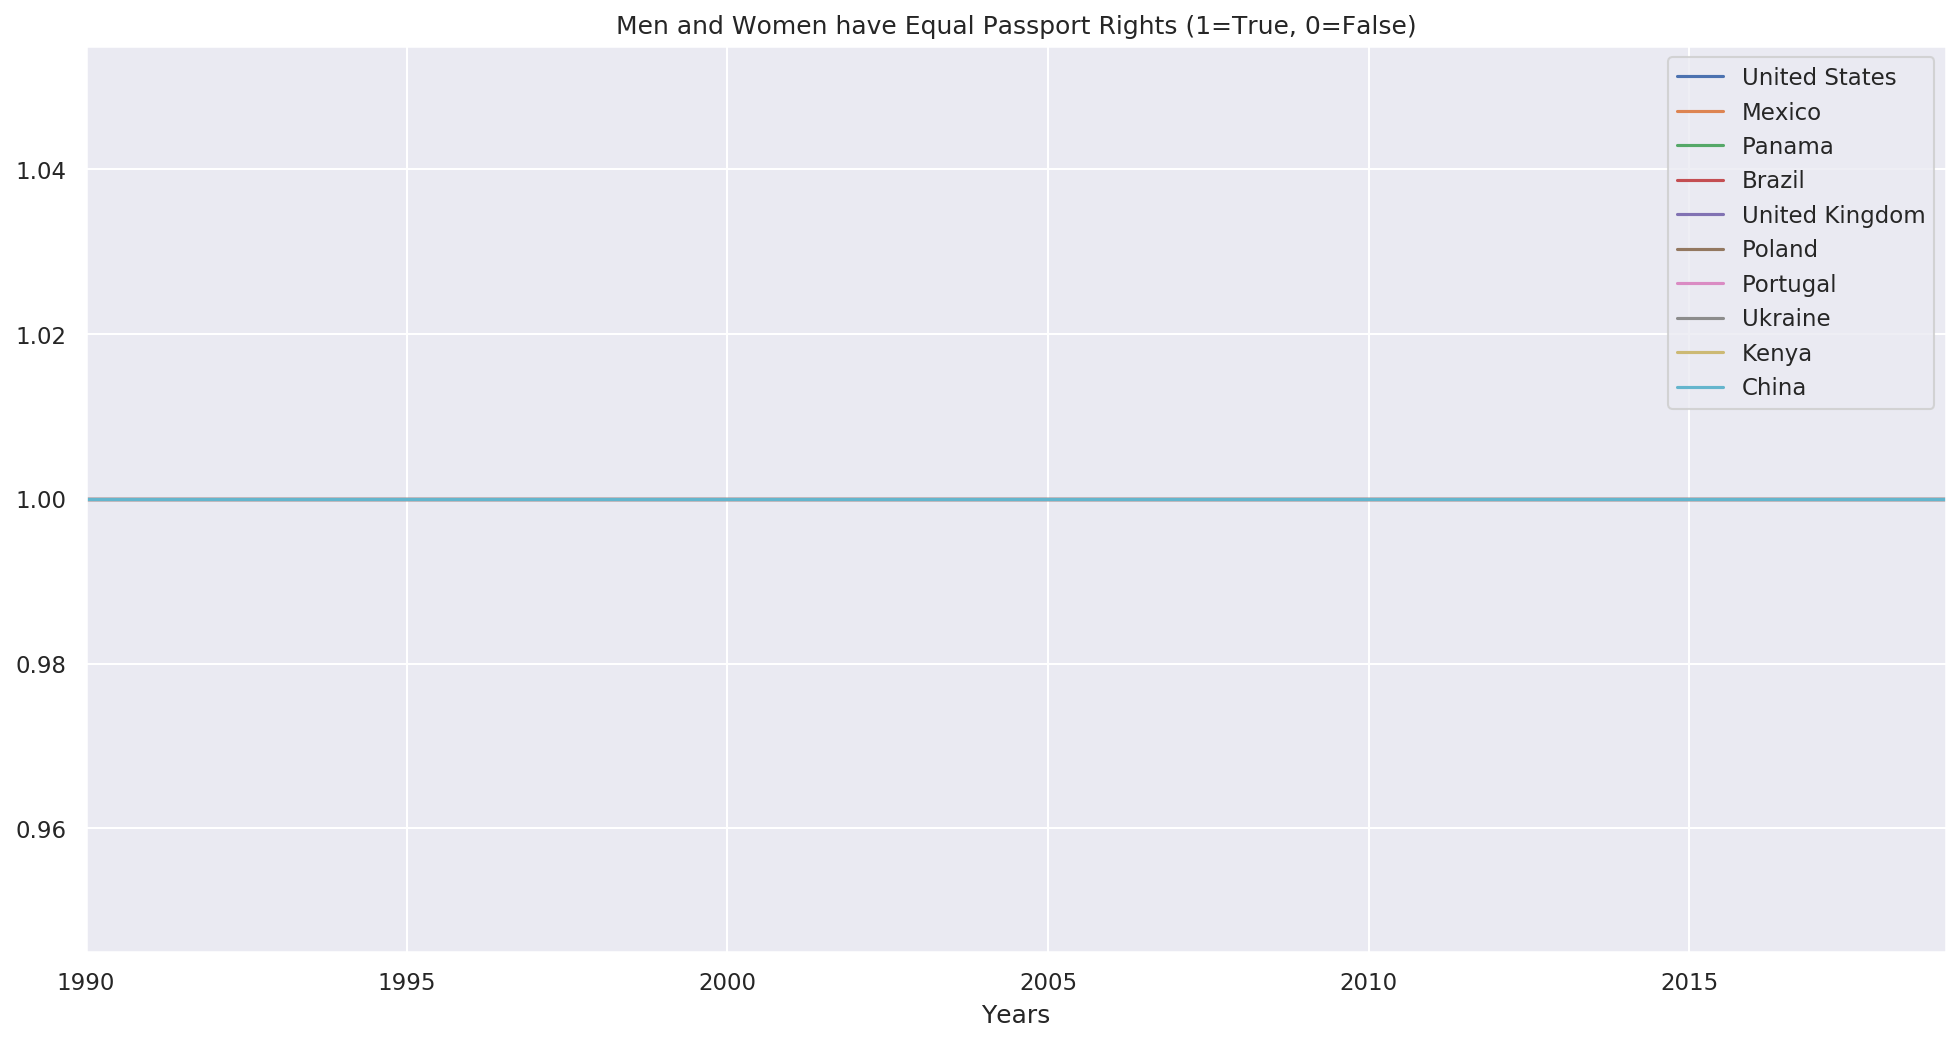

In [49]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SGAPLPSPTEQ'].plot(label=country)
  
plt.title('Men and Women have Equal Passport Rights (1=True, 0=False)')
  
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

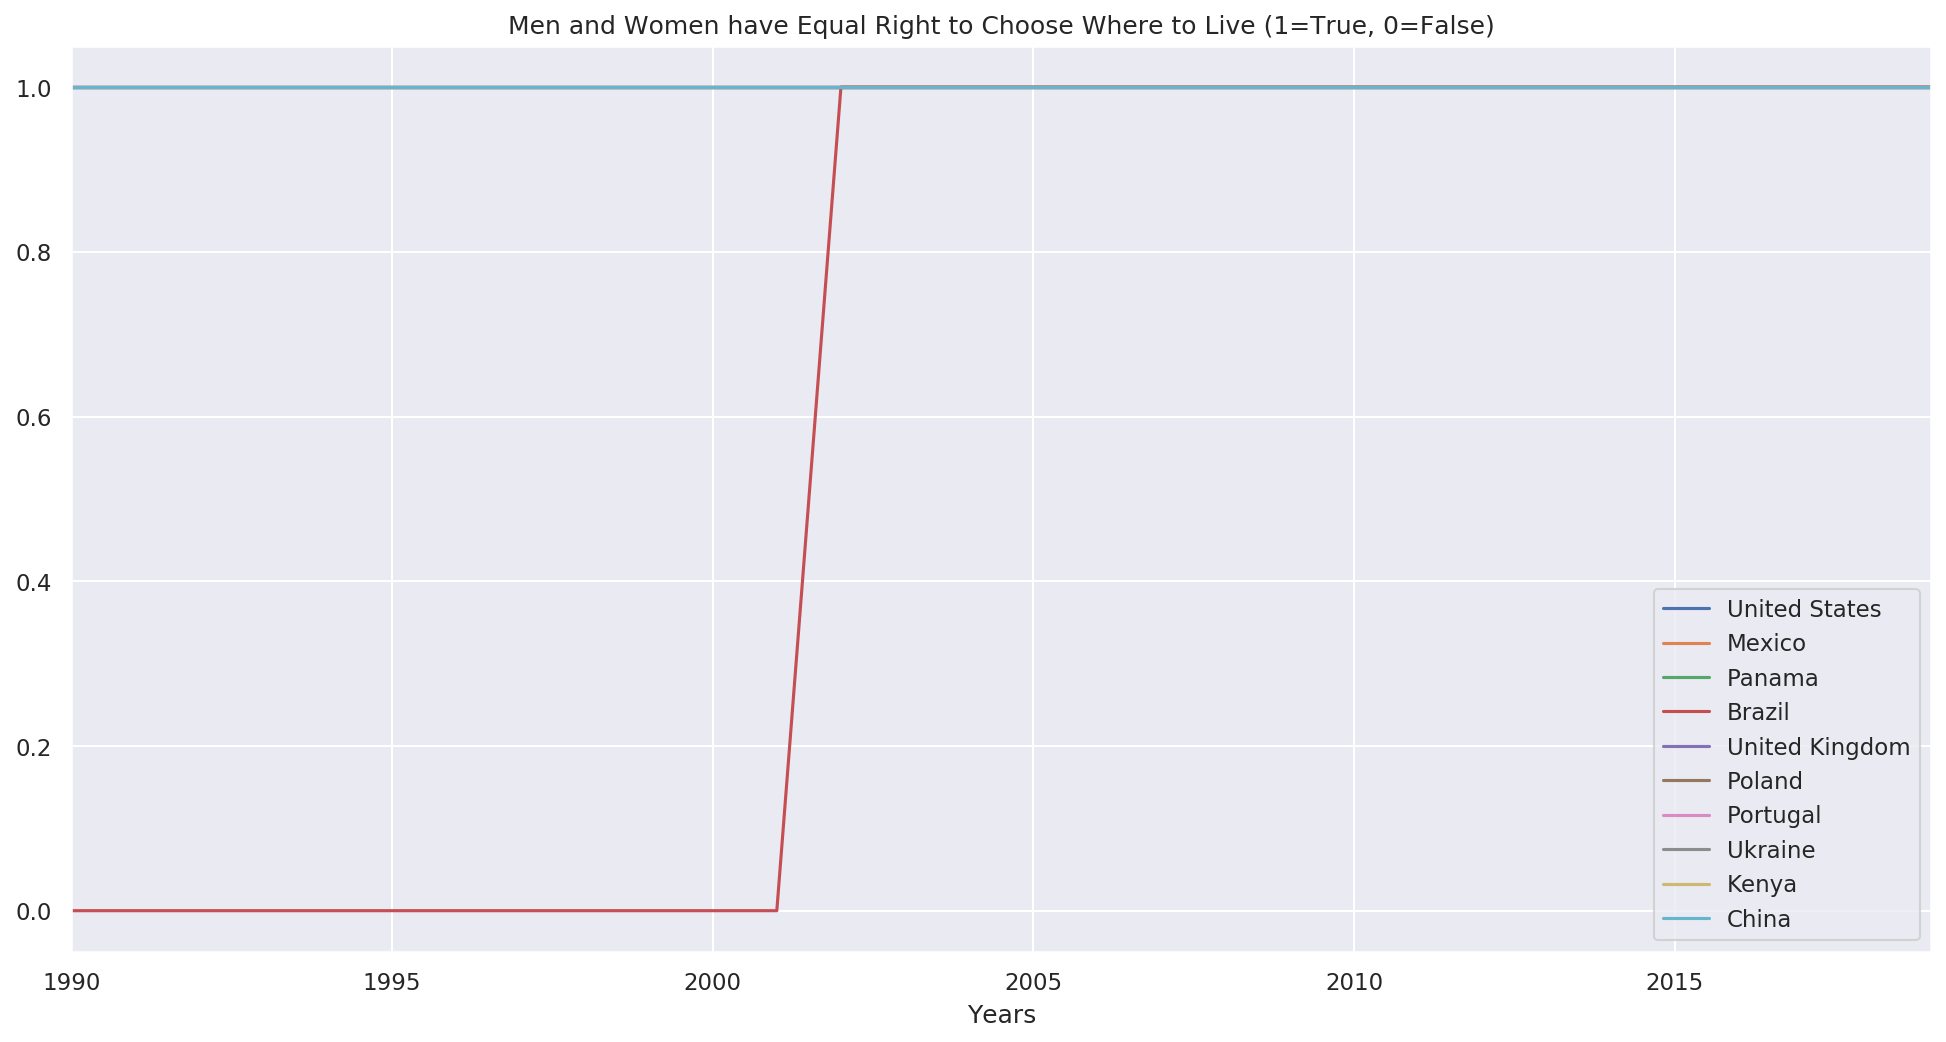

In [50]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SGLOCLIVEEQ'].plot(label=country)
  
plt.title('Men and Women have Equal Right to Choose Where to Live (1=True, 0=False)')
  
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

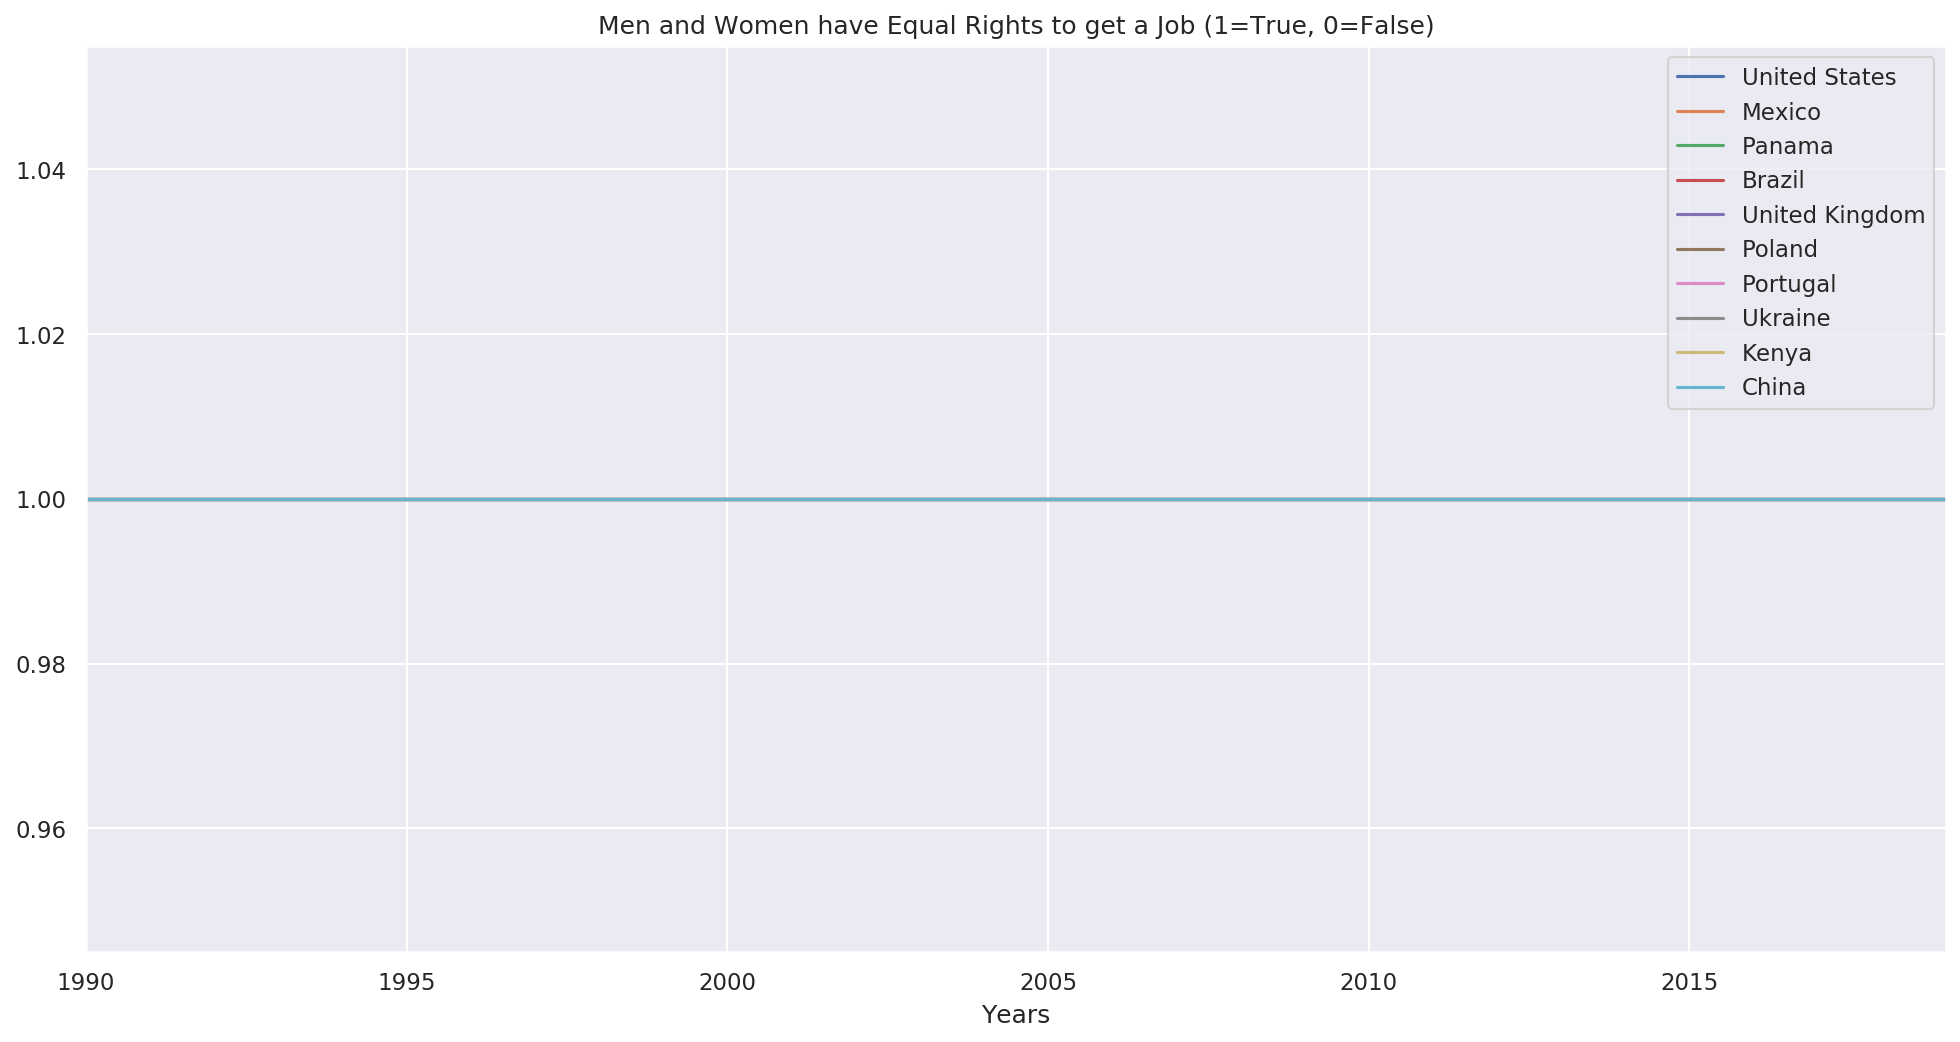

In [51]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SGGETJOBSEQ'].plot(label=country)
  
plt.title('Men and Women have Equal Rights to get a Job (1=True, 0=False)')
  
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

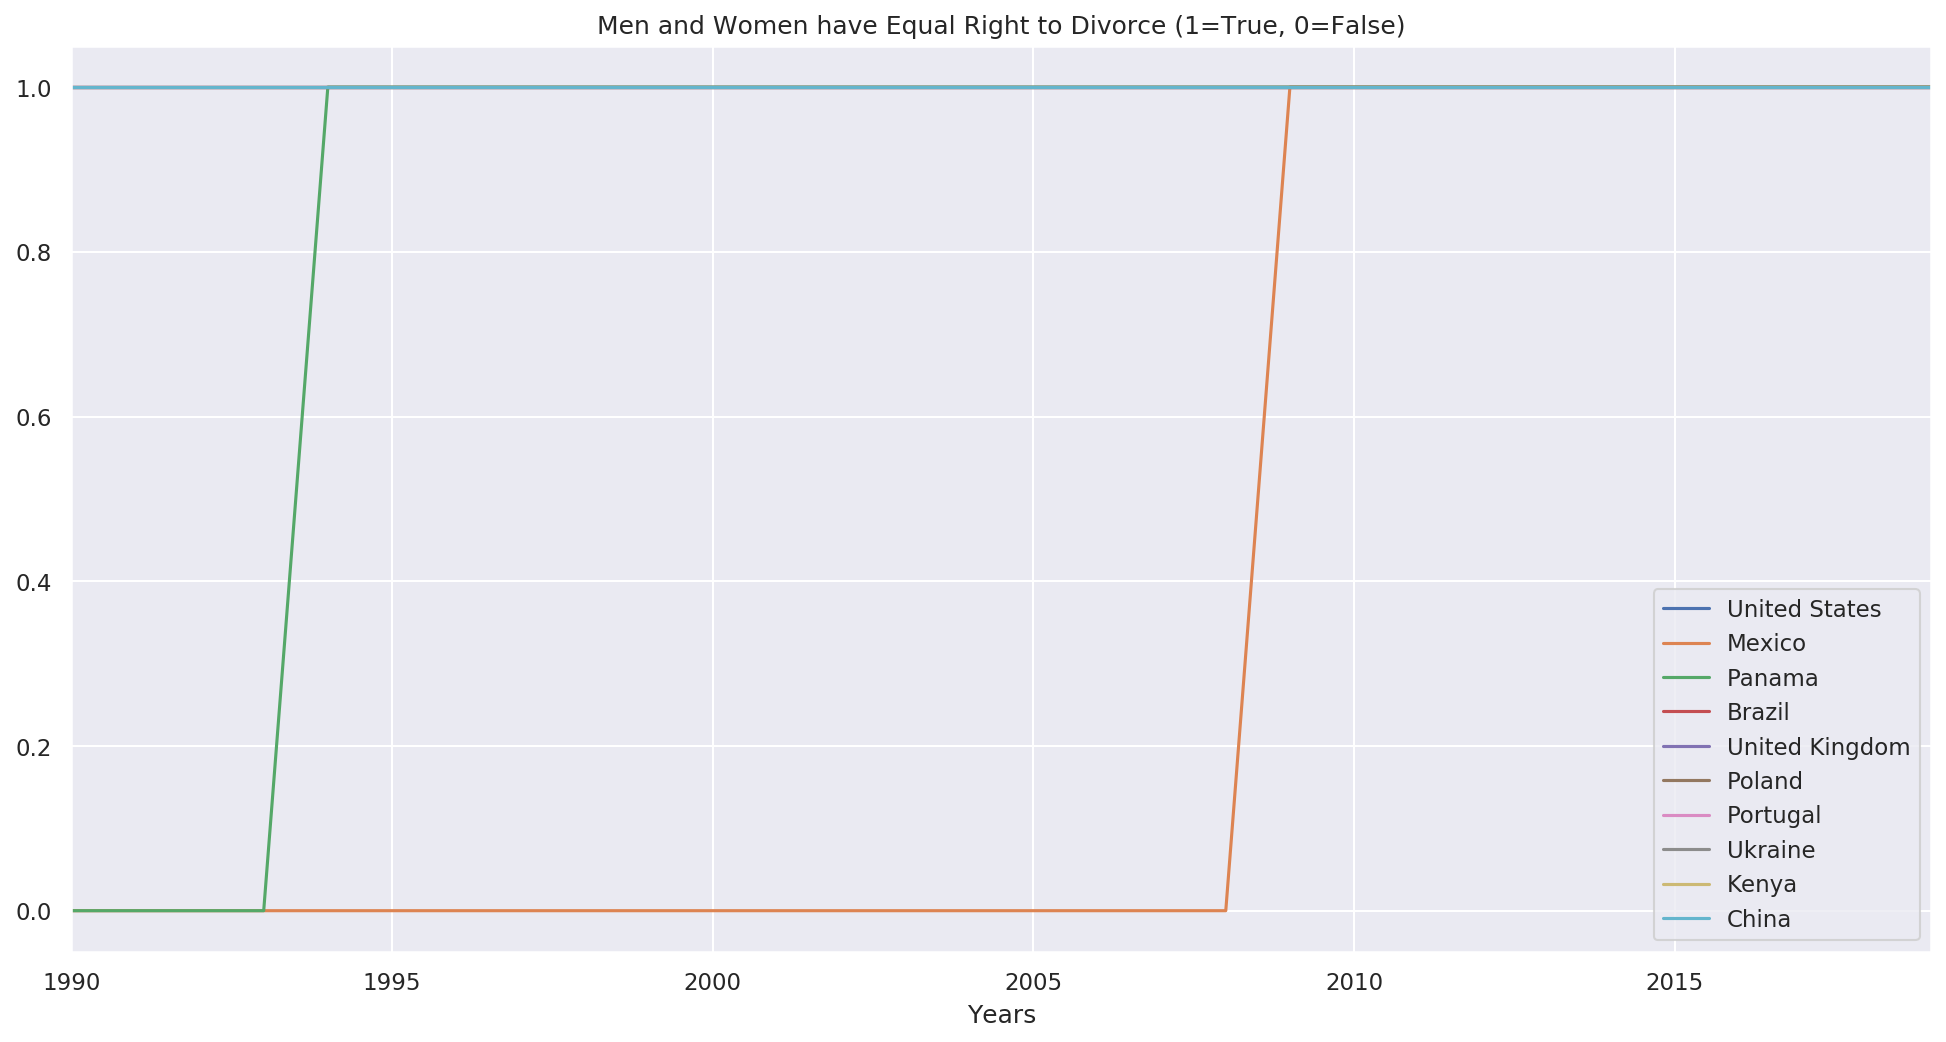

In [52]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SGOBTDVRCEQ'].plot(label=country)
  
plt.title('Men and Women have Equal Right to Divorce (1=True, 0=False)')
  
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

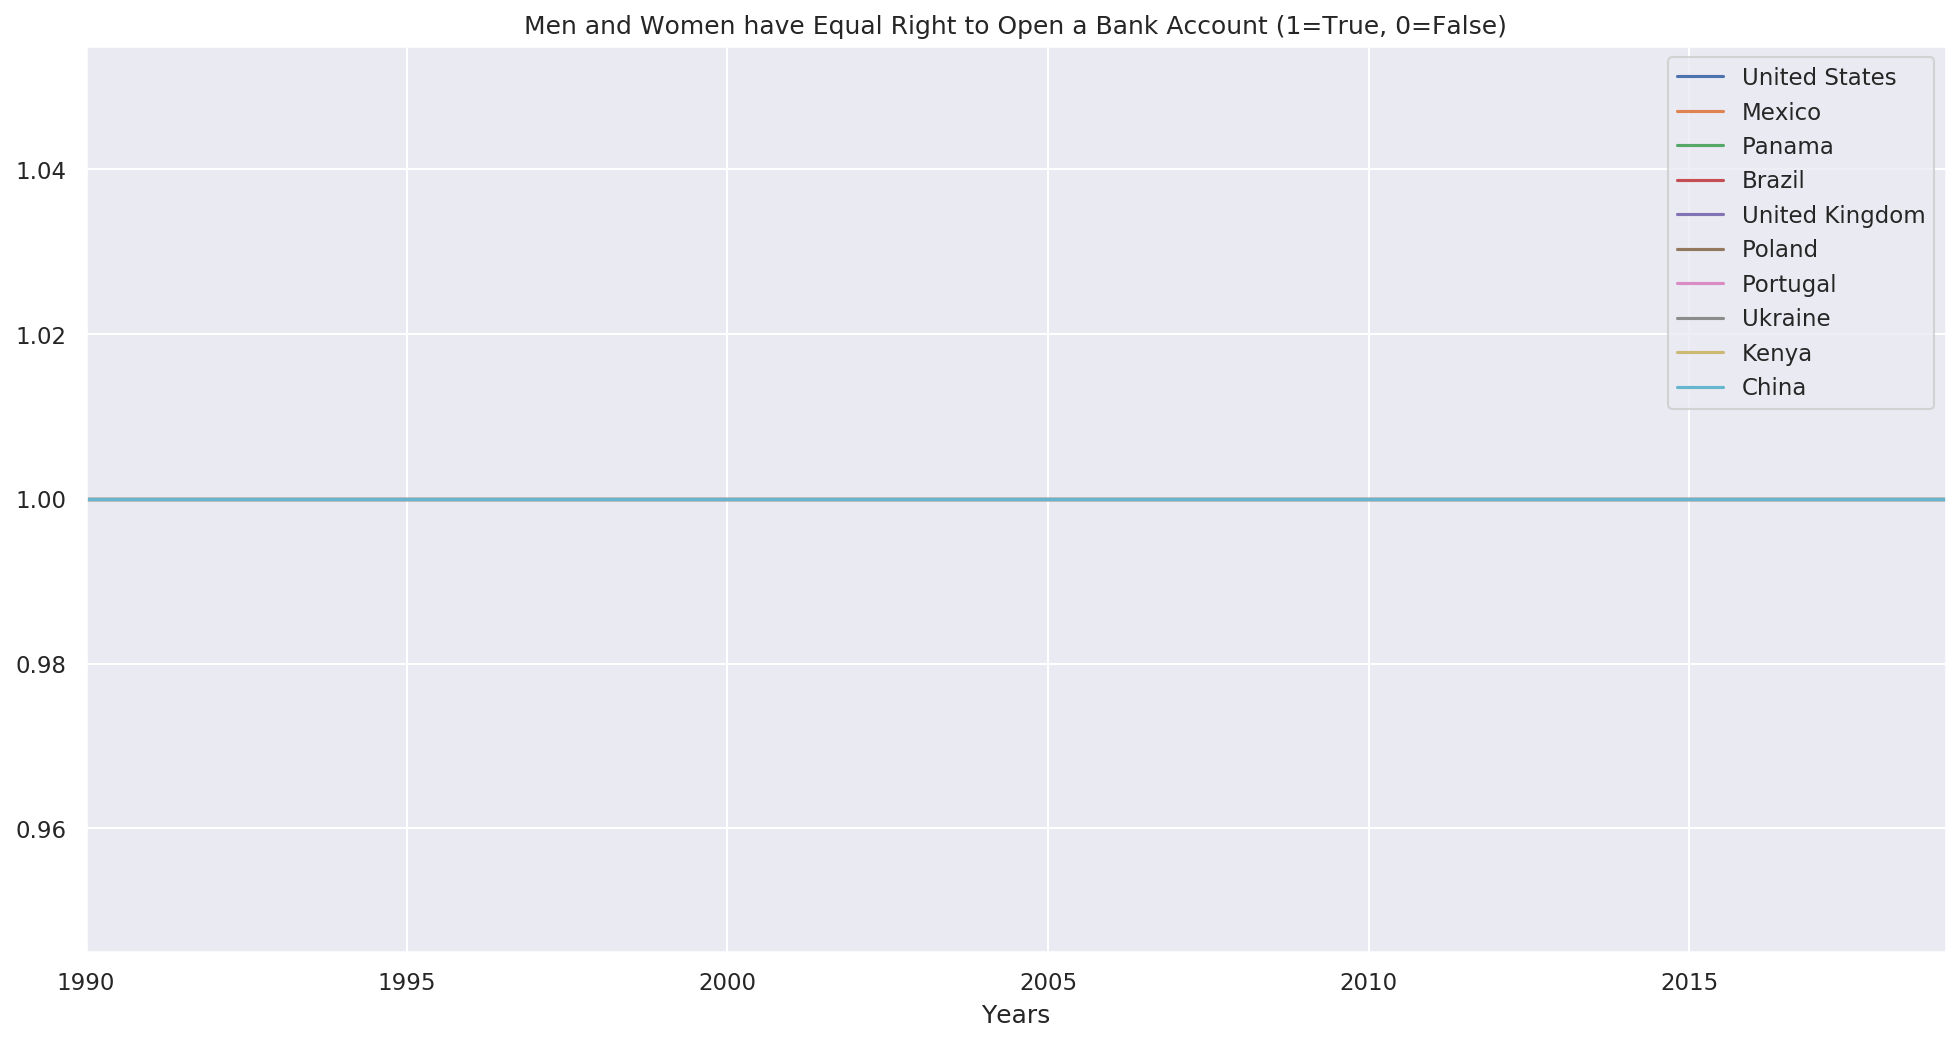

In [53]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SGOPNBANKEQ'].plot(label=country)
  
plt.title('Men and Women have Equal Right to Open a Bank Account (1=True, 0=False)')
  
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

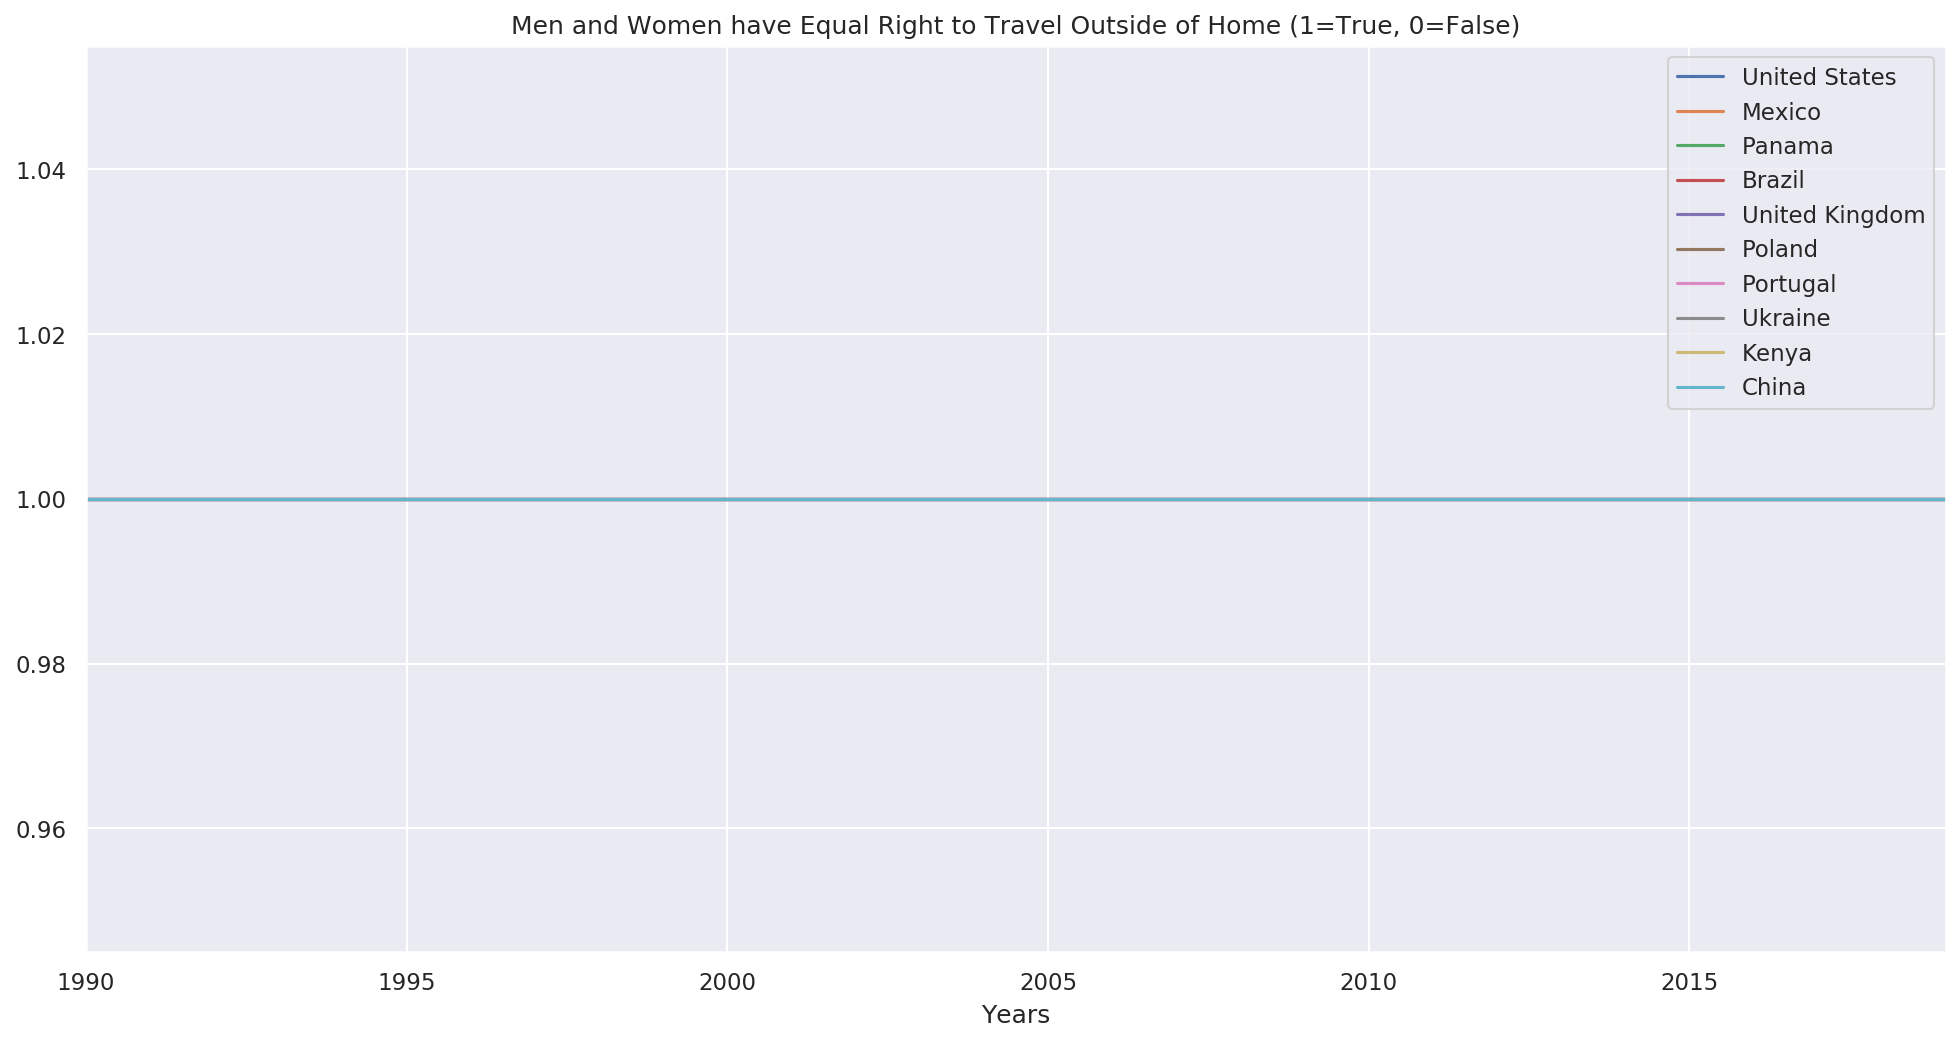

In [54]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SGHMETRVLEQ'].plot(label=country)
  
plt.title('Men and Women have Equal Right to Travel Outside of Home (1=True, 0=False)')
  
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

### Economic/public policy variables

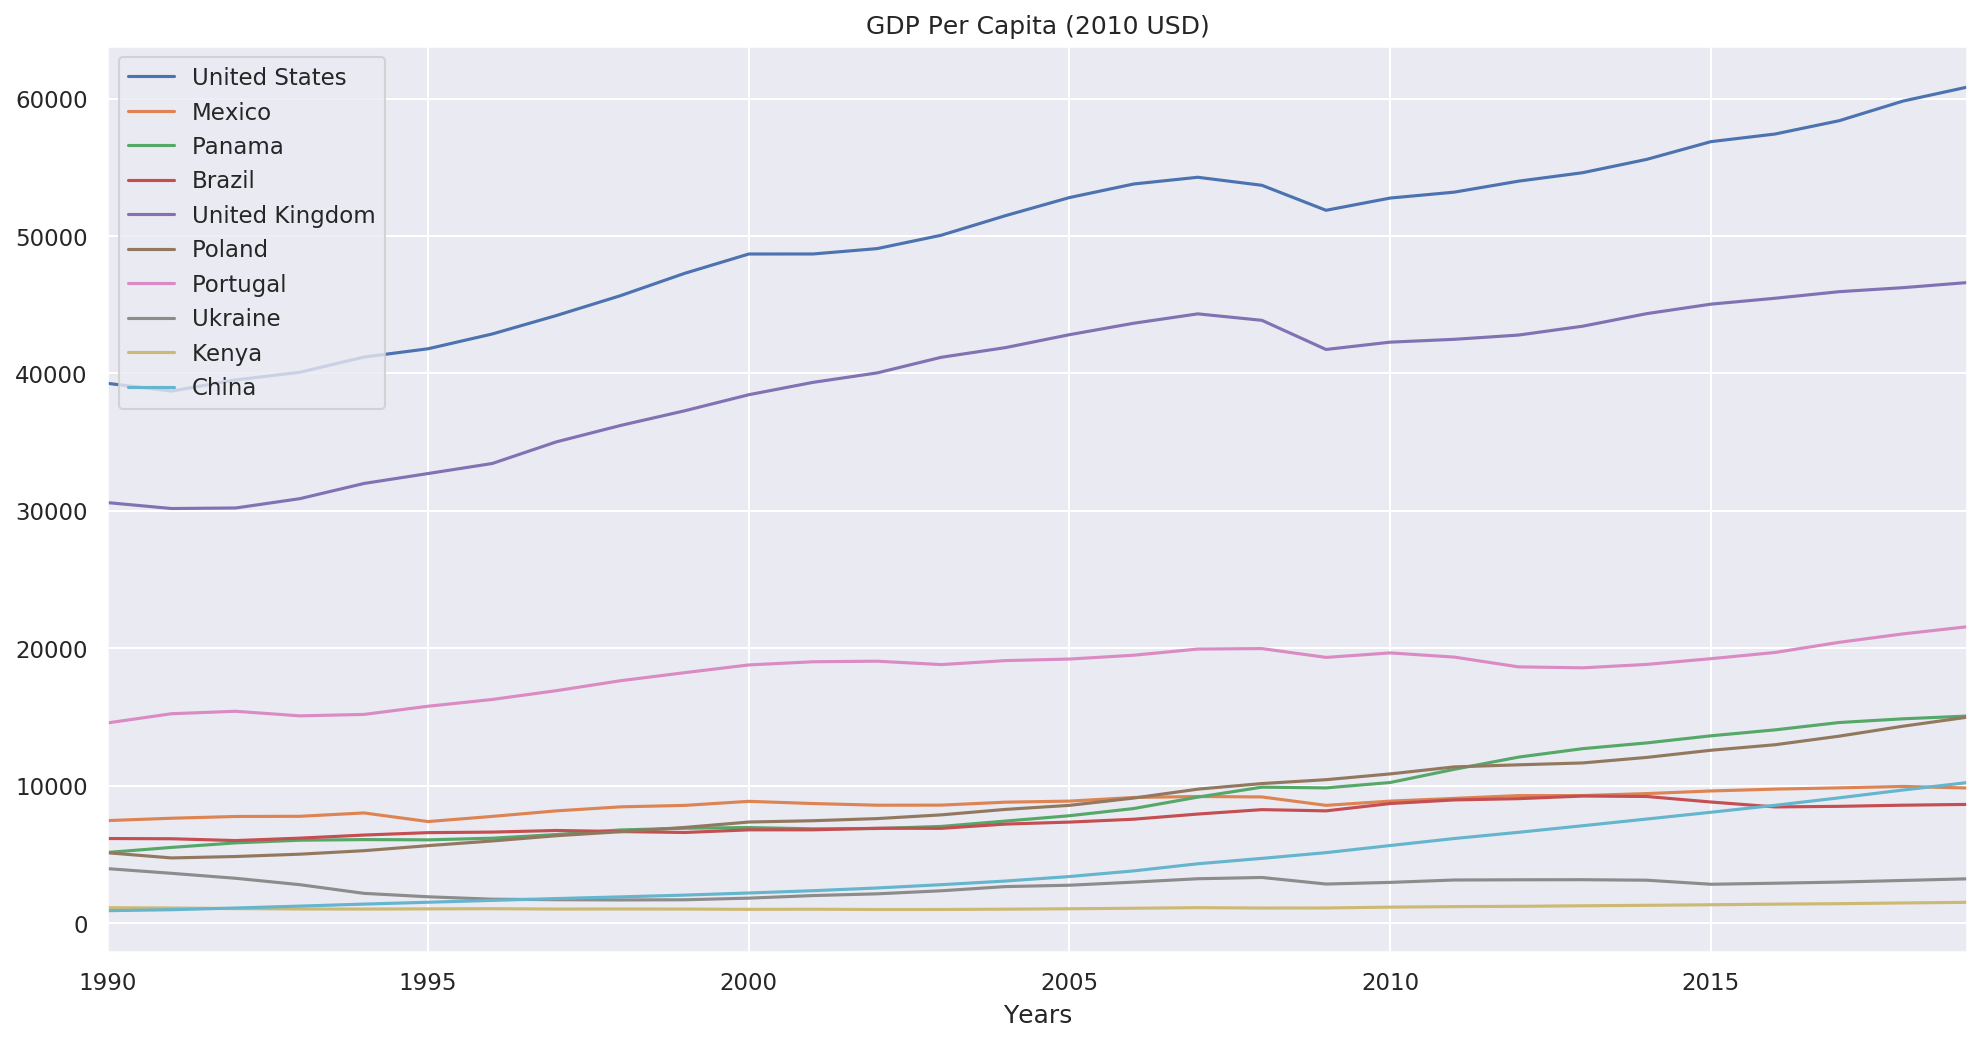

In [56]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['NYGDPPCAPKD'].plot(label=country)
  
plt.title('GDP Per Capita (2010 USD)')
  
plt.xlabel('Years')
  
plt.legend()

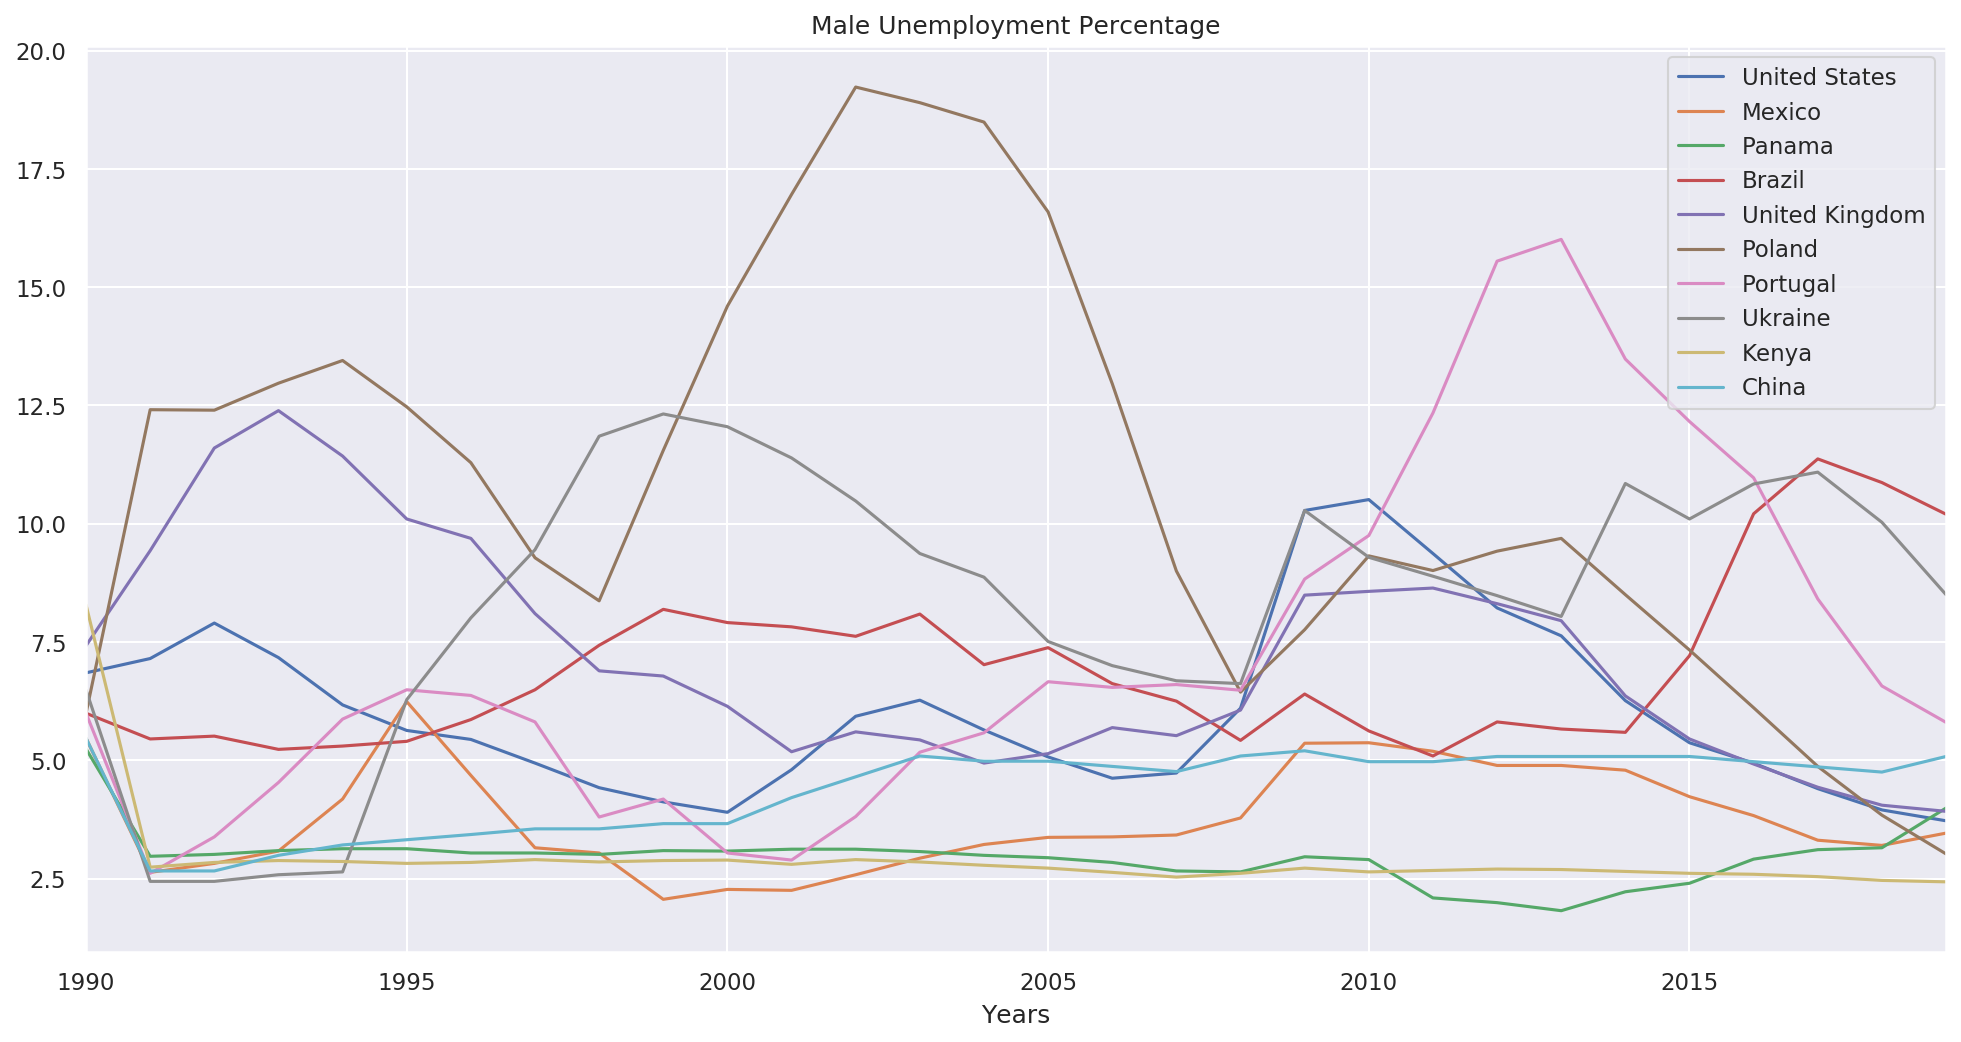

In [57]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SLUEMTOTLMAZS'].plot(label=country)
  
plt.title('Male Unemployment Percentage')
  
plt.xlabel('Years')
  
plt.legend()

### Population statistics

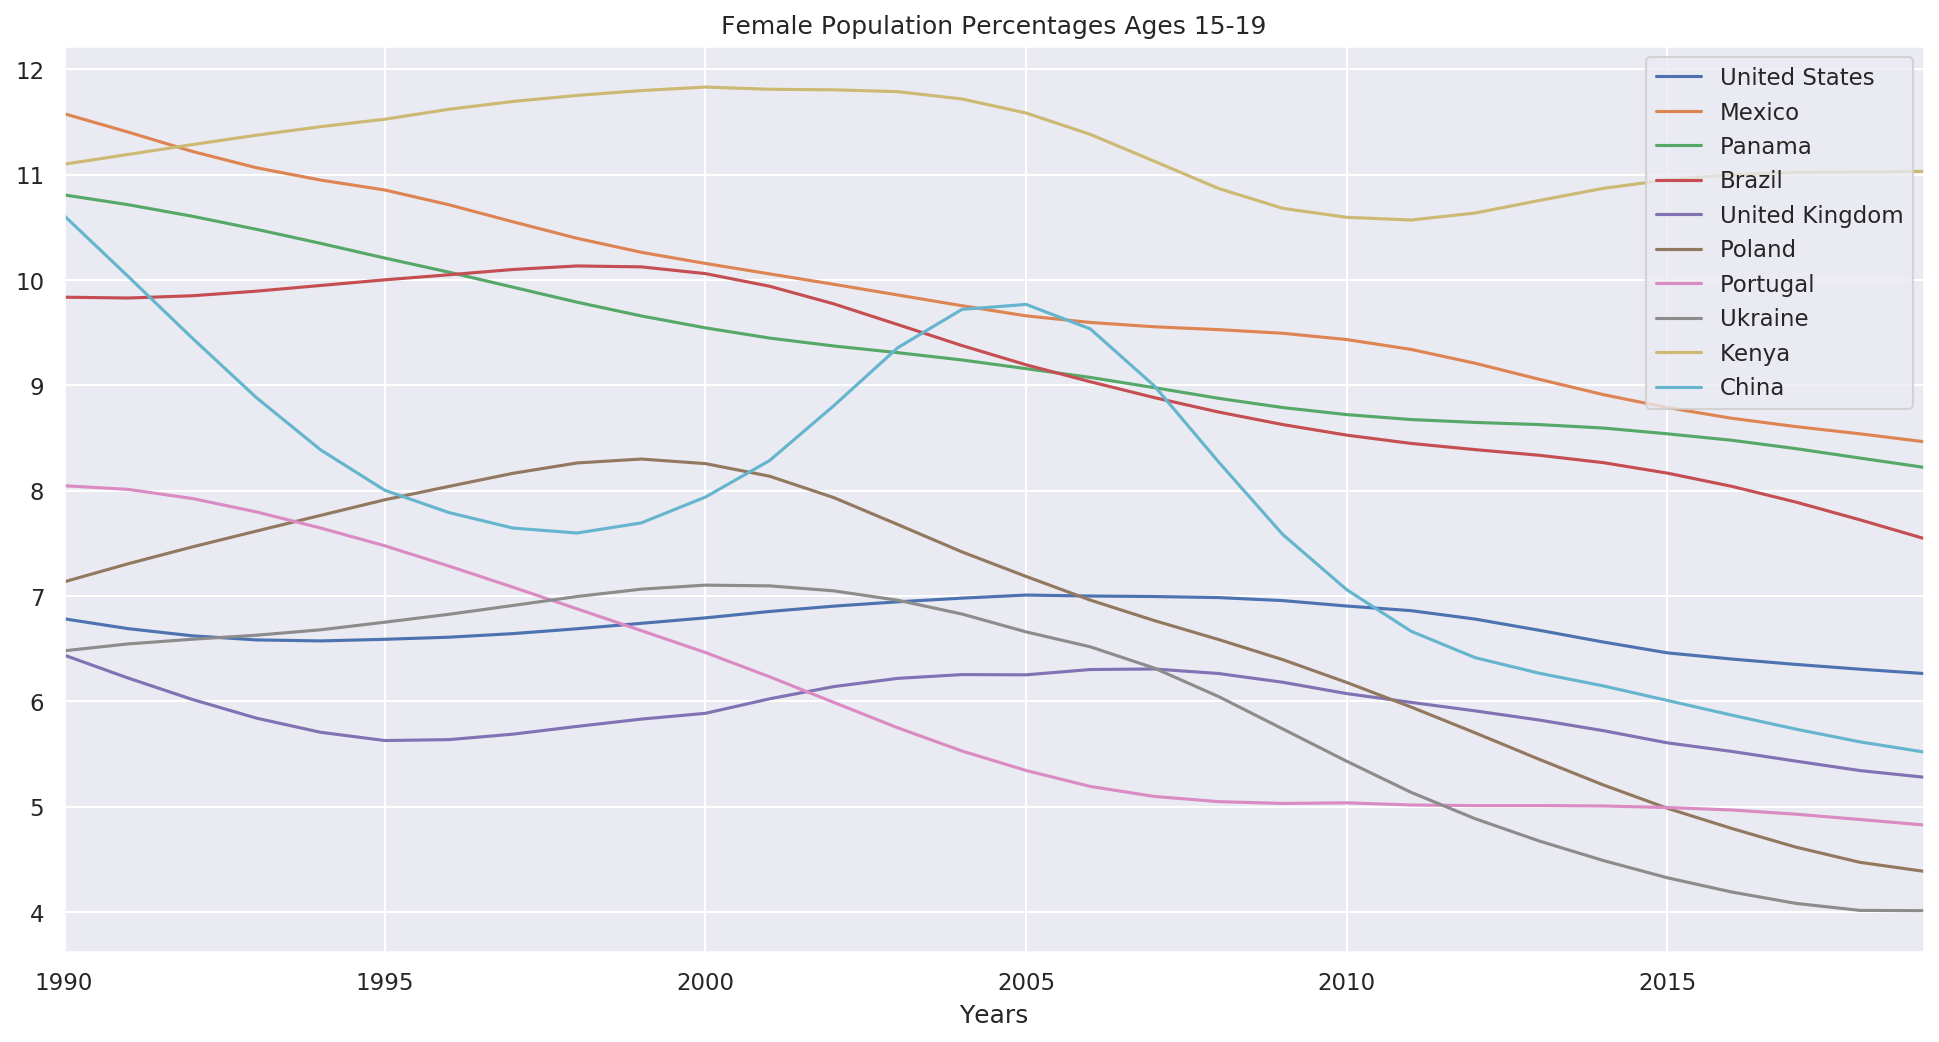

In [58]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SPPOP1519FE5Y'].plot(label=country)
  
plt.title('Female Population Percentages Ages 15-19')
  
plt.xlabel('Years')
  
plt.legend()

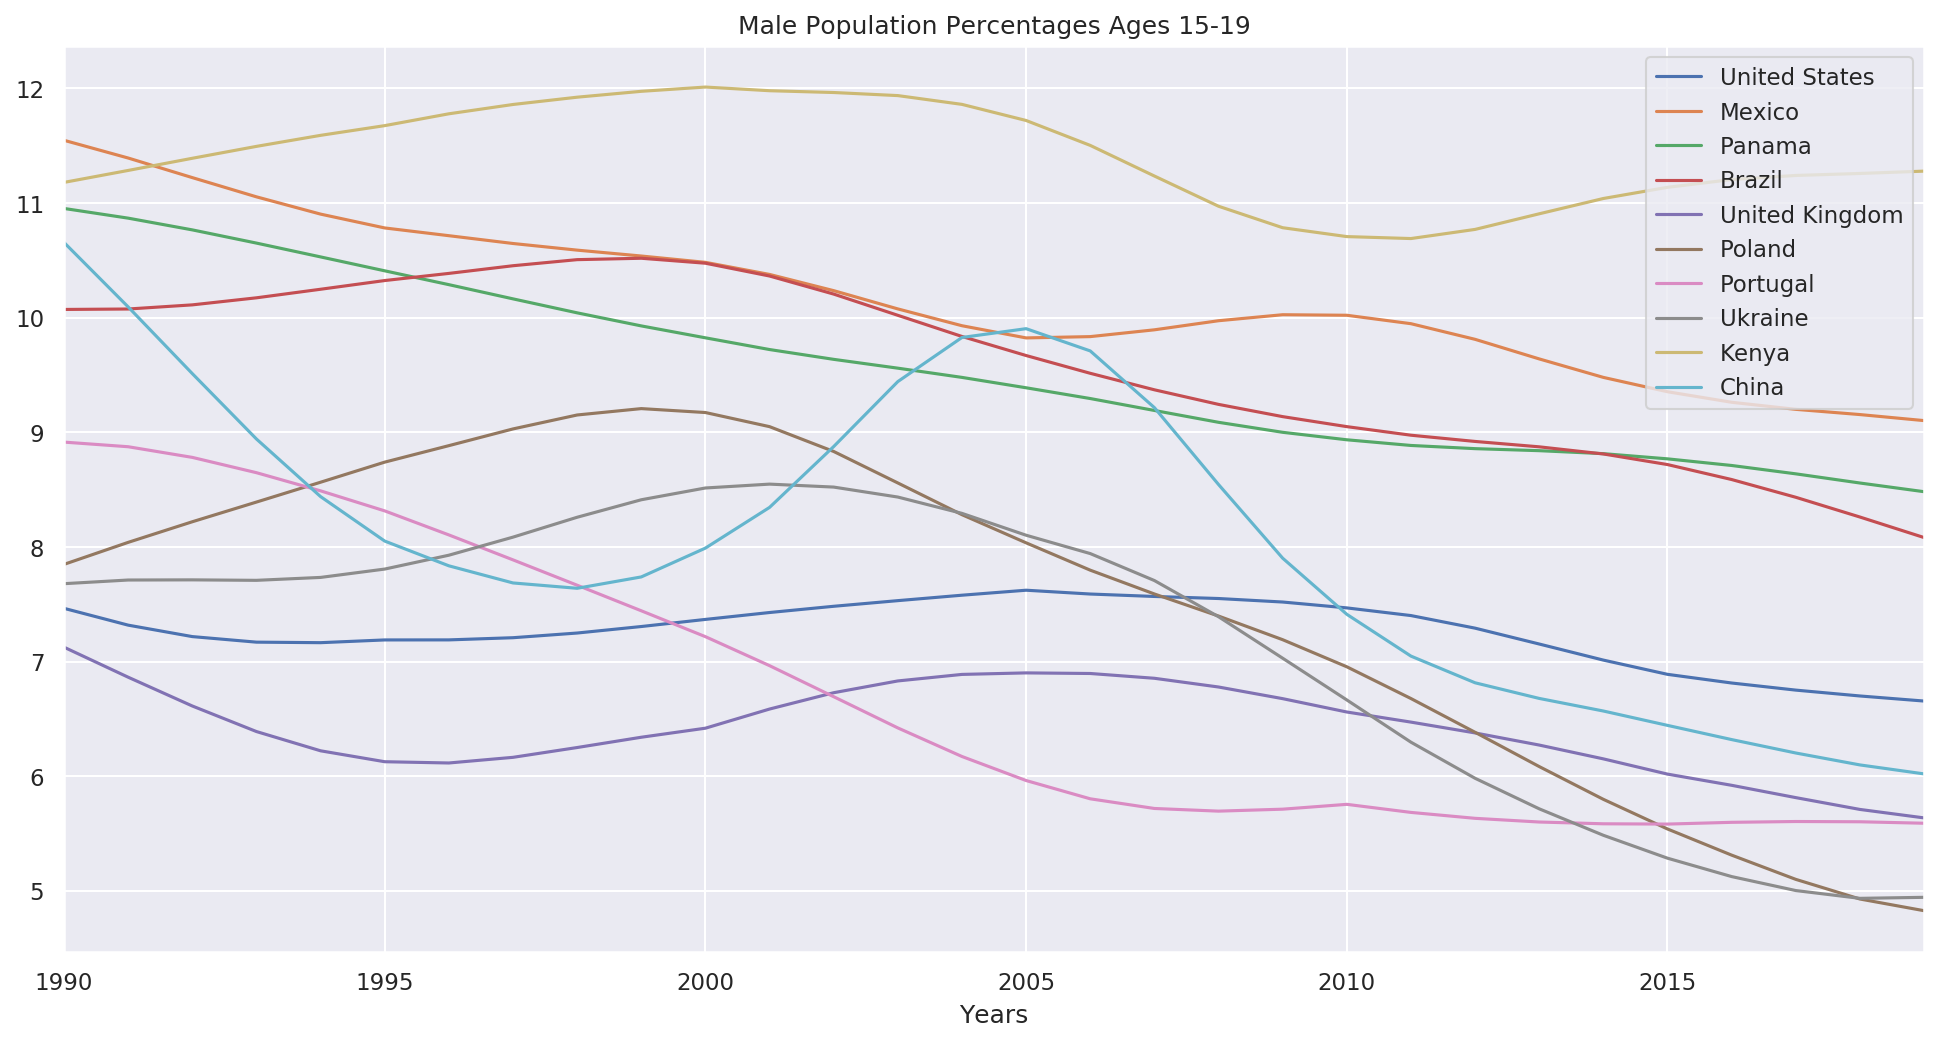

In [59]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SPPOP1519MA5Y'].plot(label=country)
  
plt.title('Male Population Percentages Ages 15-19')
  
plt.xlabel('Years')
  
plt.legend()

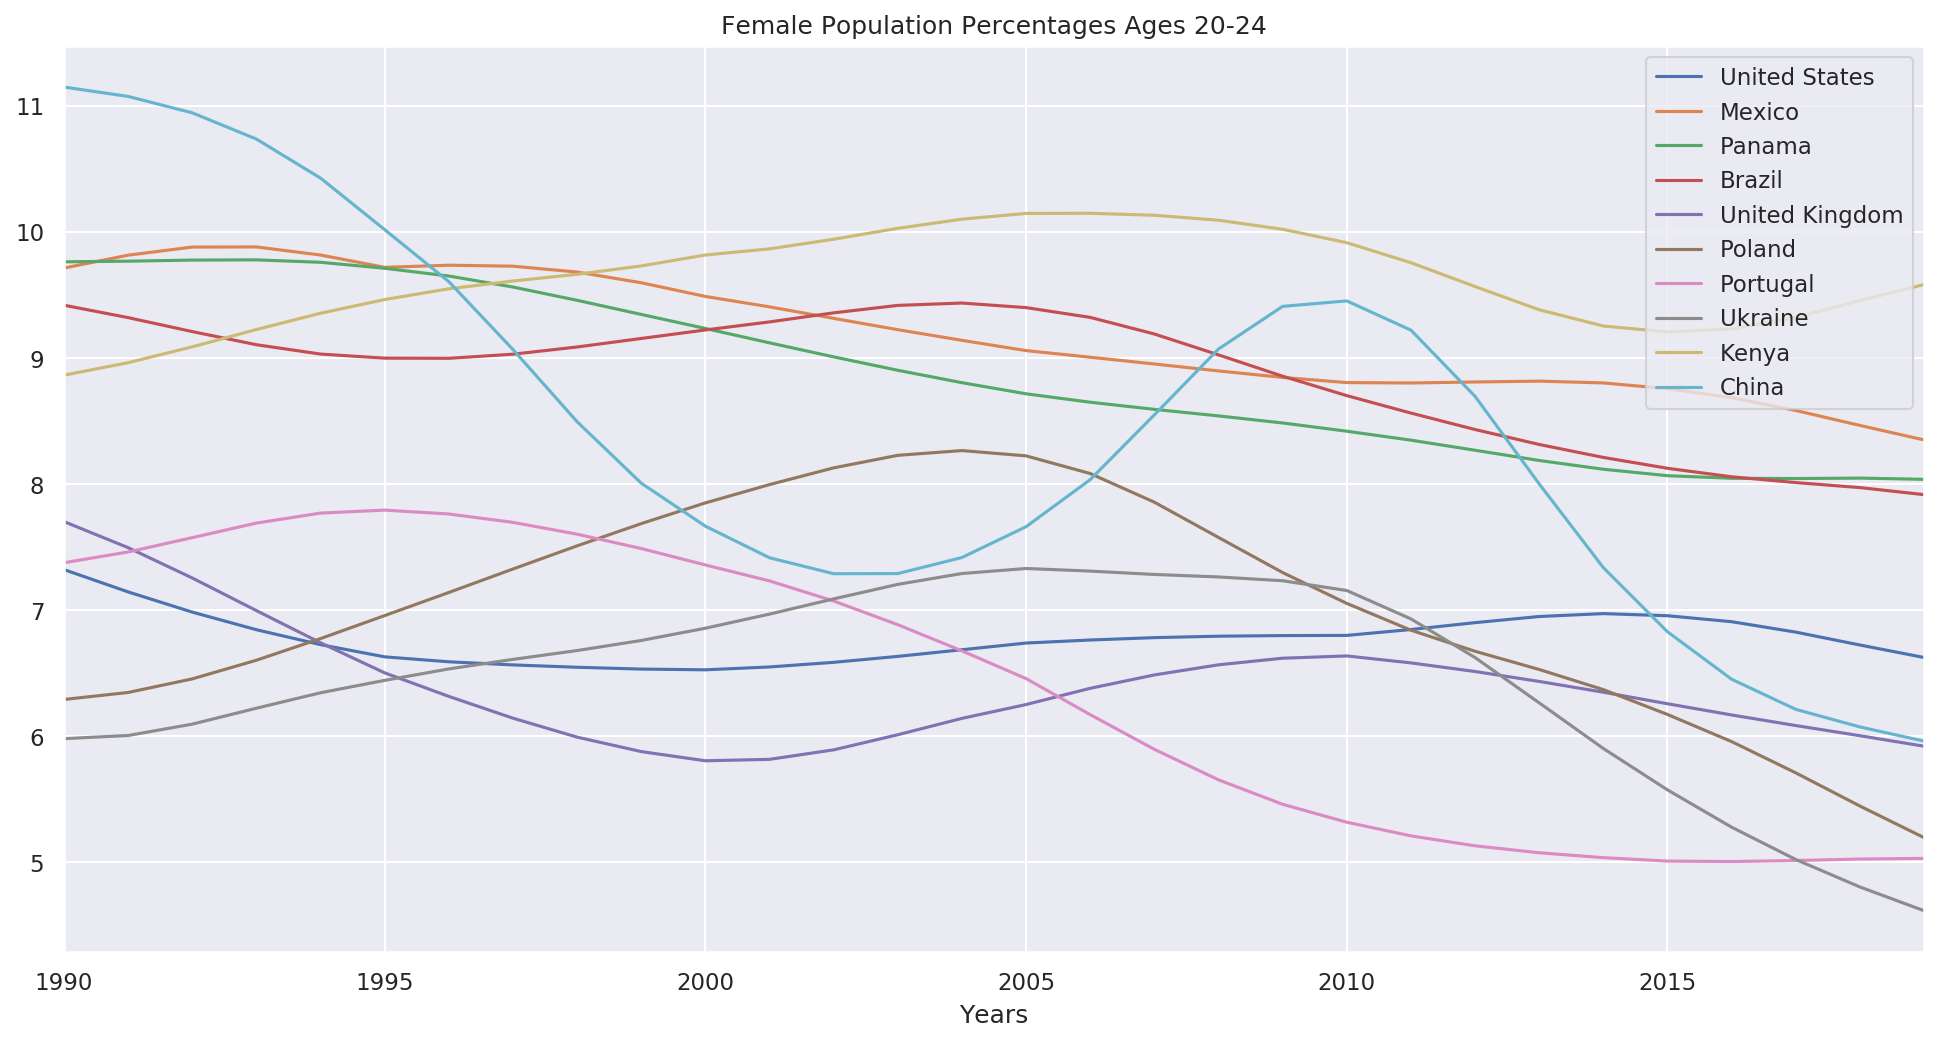

In [60]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SPPOP2024FE5Y'].plot(label=country)
  
plt.title('Female Population Percentages Ages 20-24')
  
plt.xlabel('Years')
  
plt.legend()

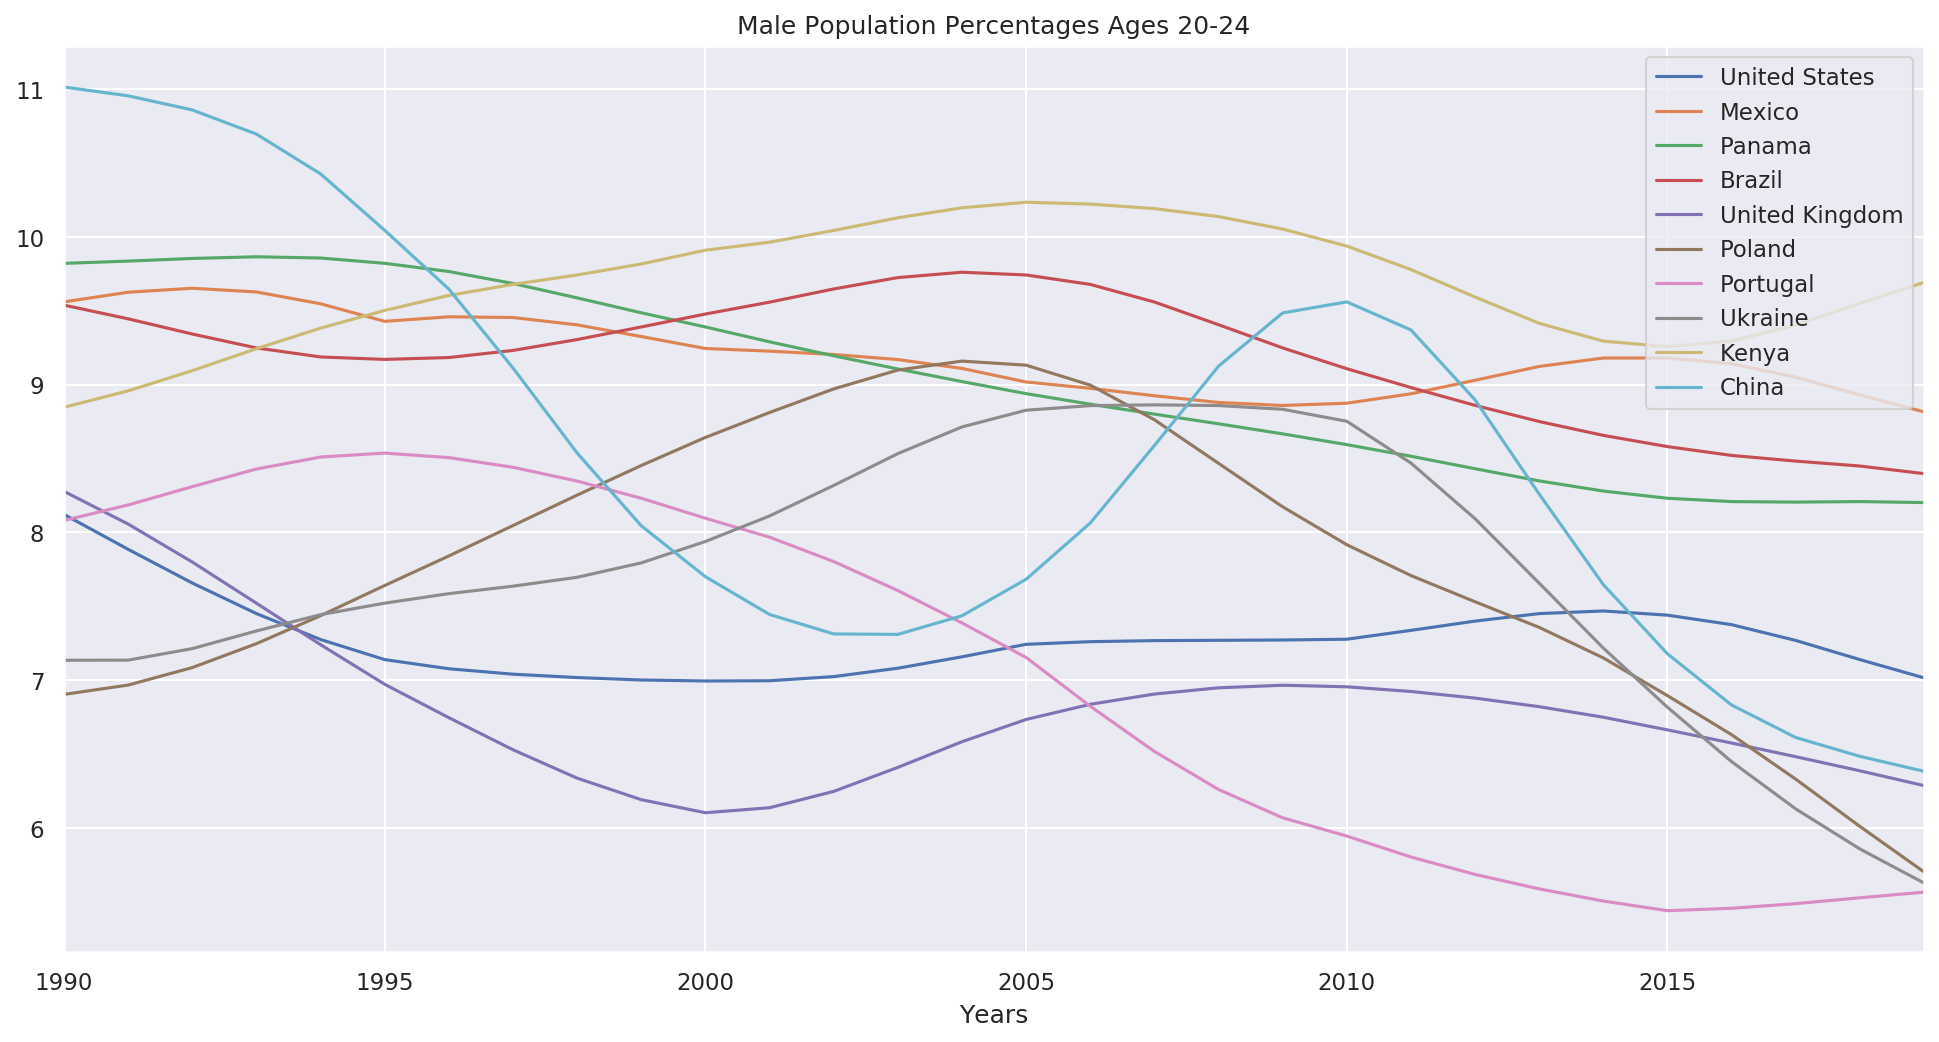

In [61]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SPPOP2024MA5Y'].plot(label=country)
  
plt.title('Male Population Percentages Ages 20-24')
  
plt.xlabel('Years')
  
plt.legend()

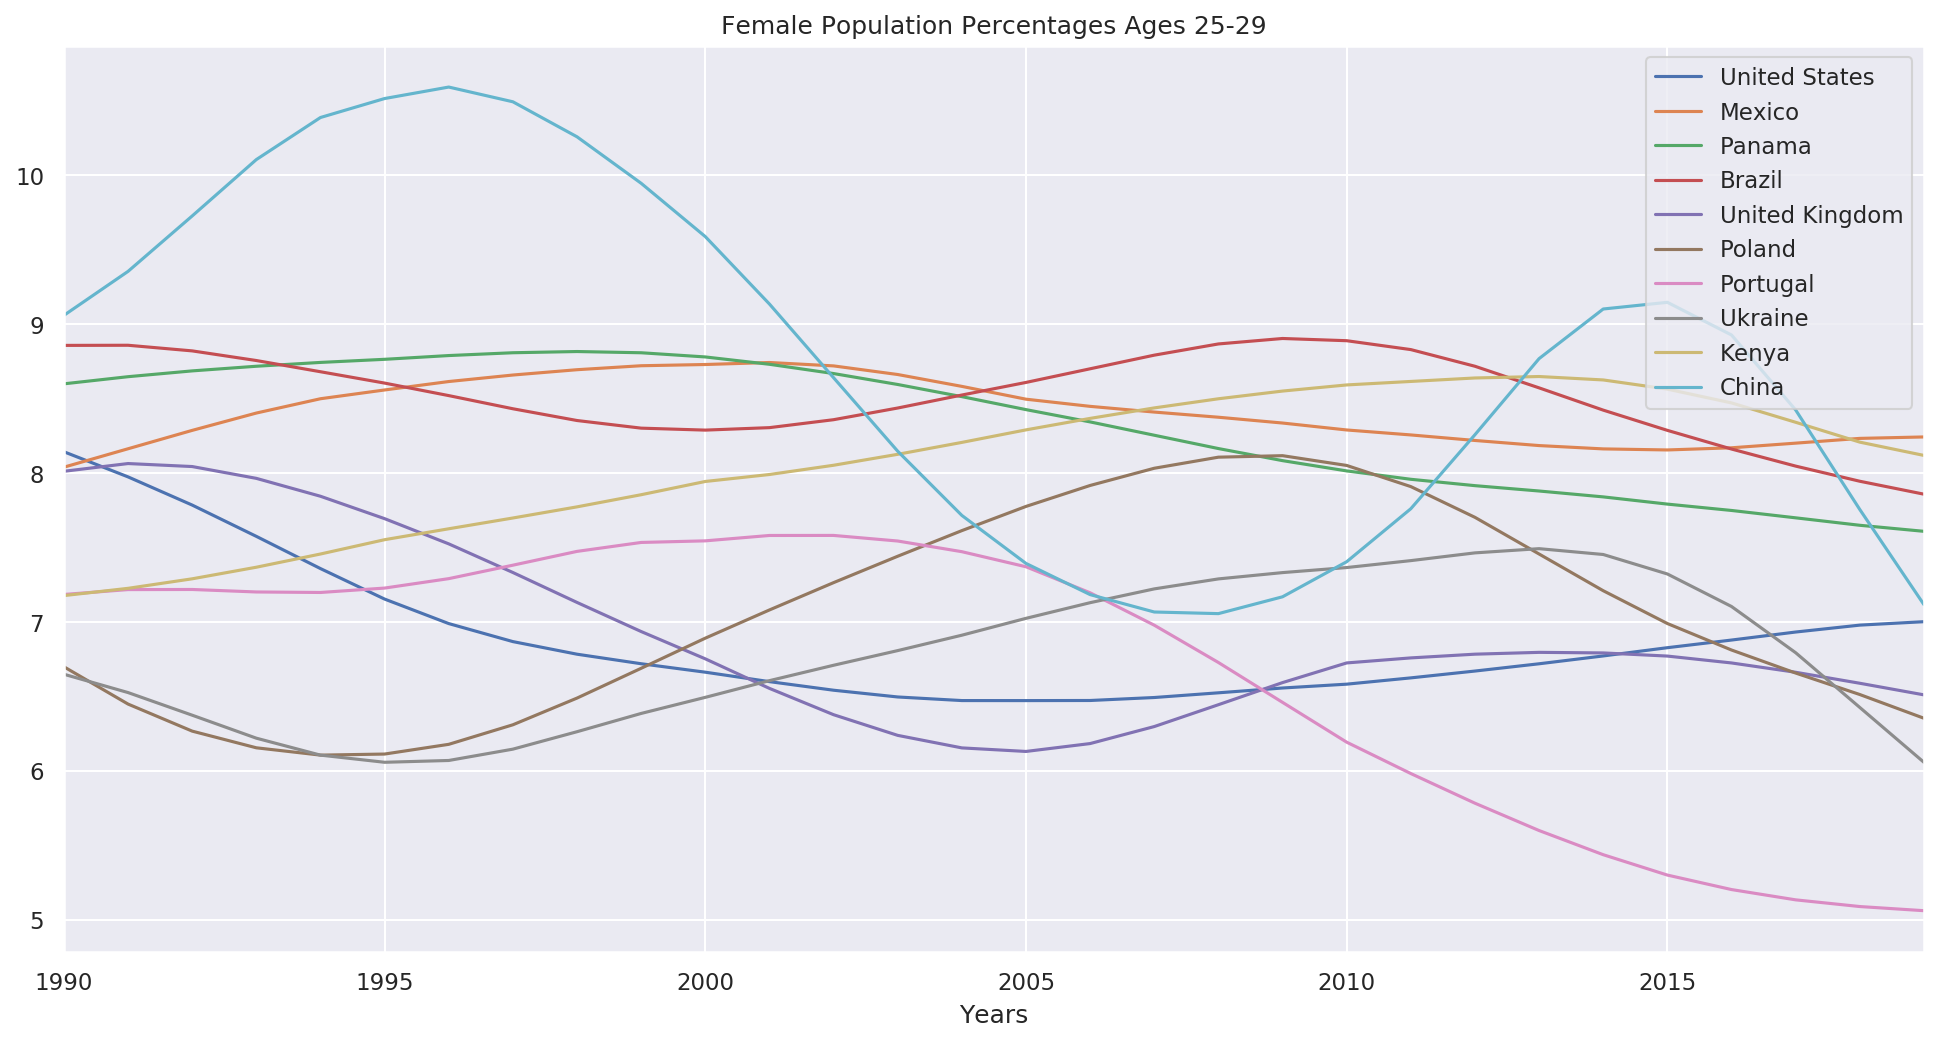

In [62]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SPPOP2529FE5Y'].plot(label=country)

plt.title('Female Population Percentages Ages 25-29')
  
plt.xlabel('Years')
  
plt.legend()

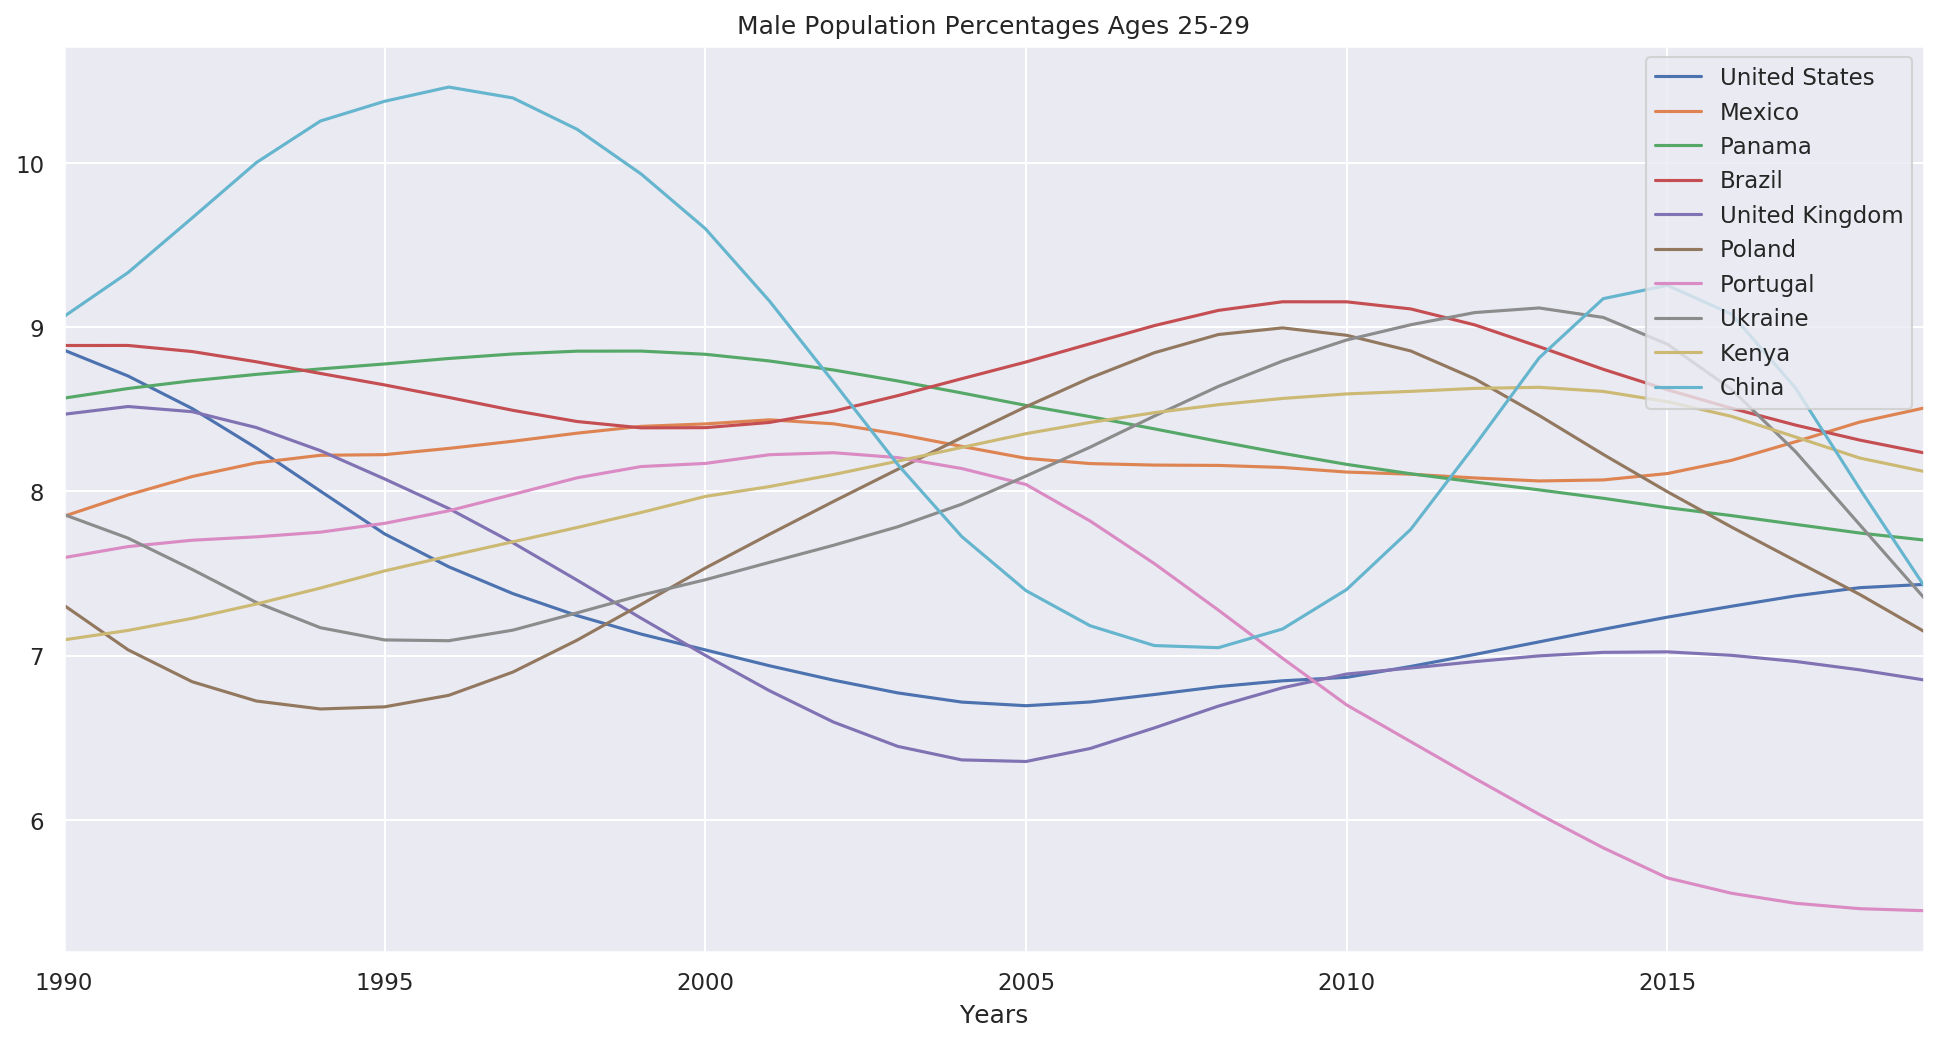

In [63]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SPPOP2529MA5Y'].plot(label=country)
  
plt.title('Male Population Percentages Ages 25-29')
  
plt.xlabel('Years')
  
plt.legend()

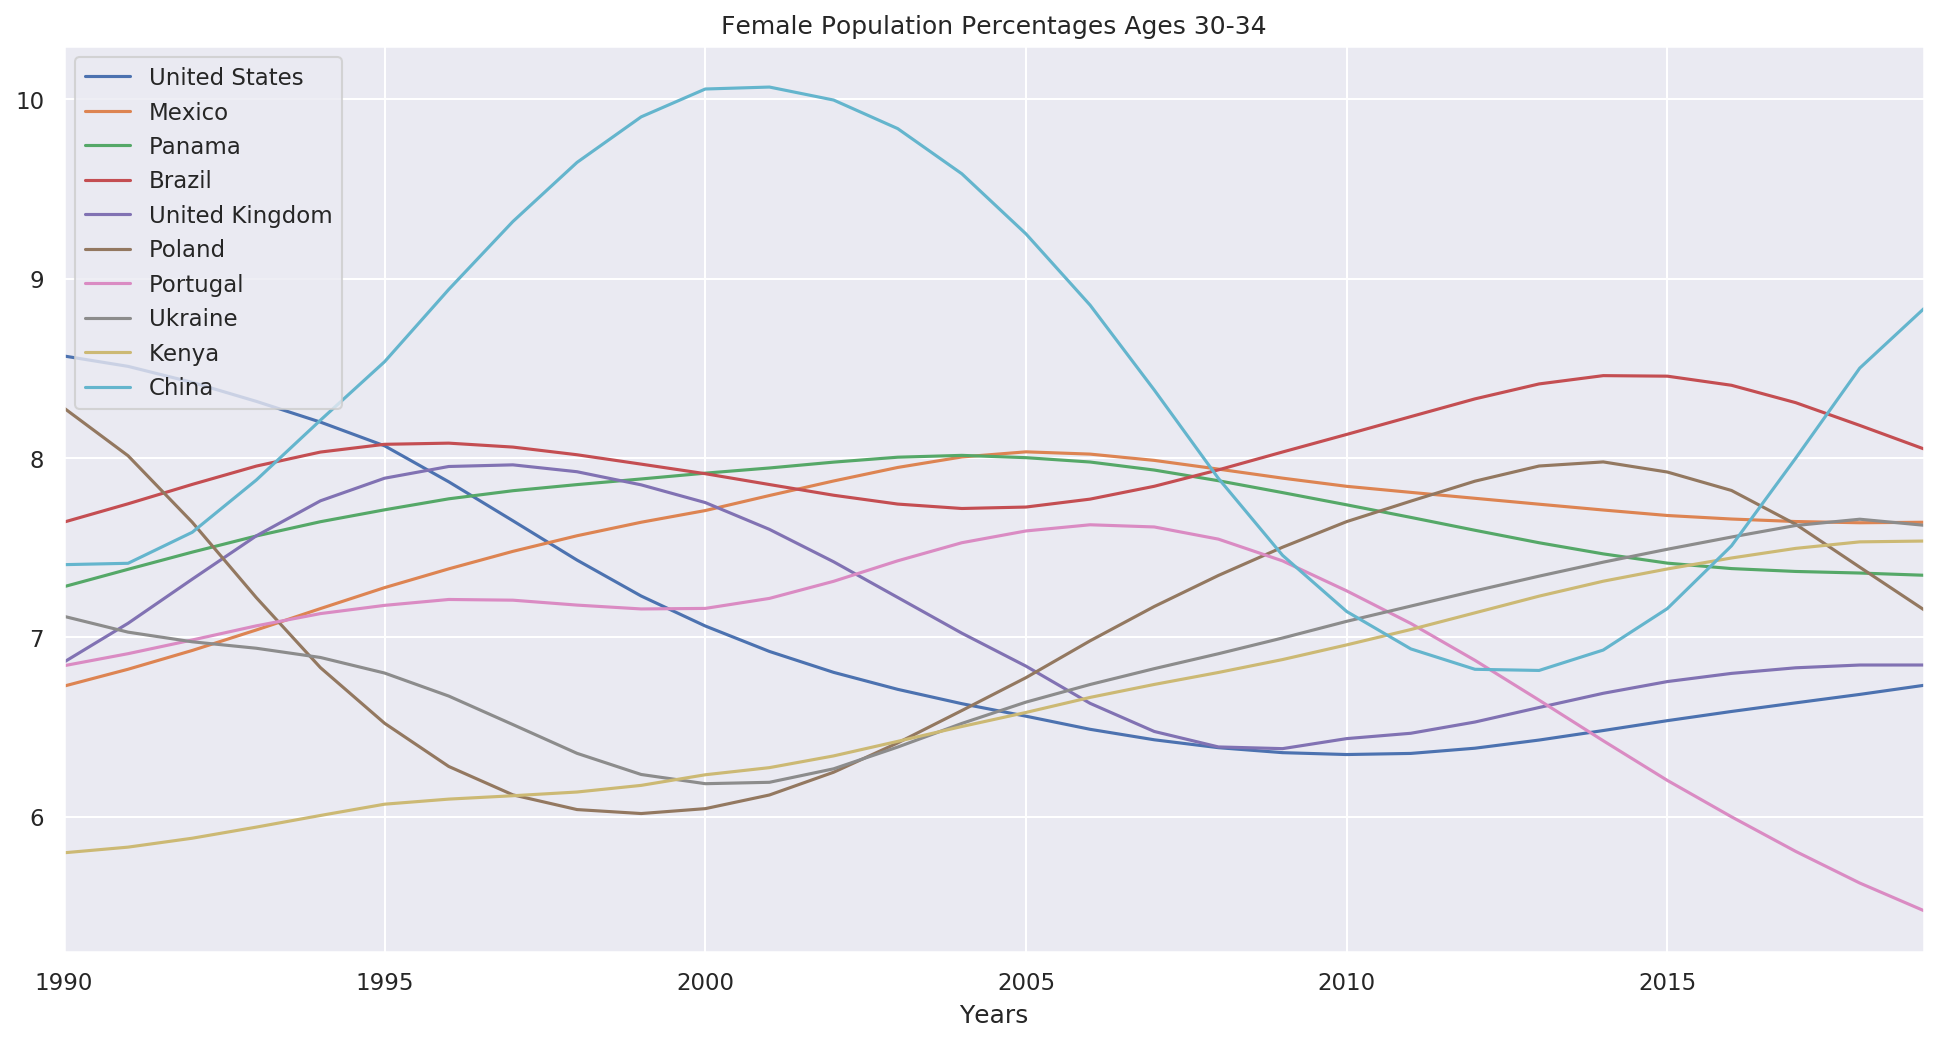

In [64]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SPPOP3034FE5Y'].plot(label=country)
  
plt.title('Female Population Percentages Ages 30-34')
  
plt.xlabel('Years')
  
plt.legend()

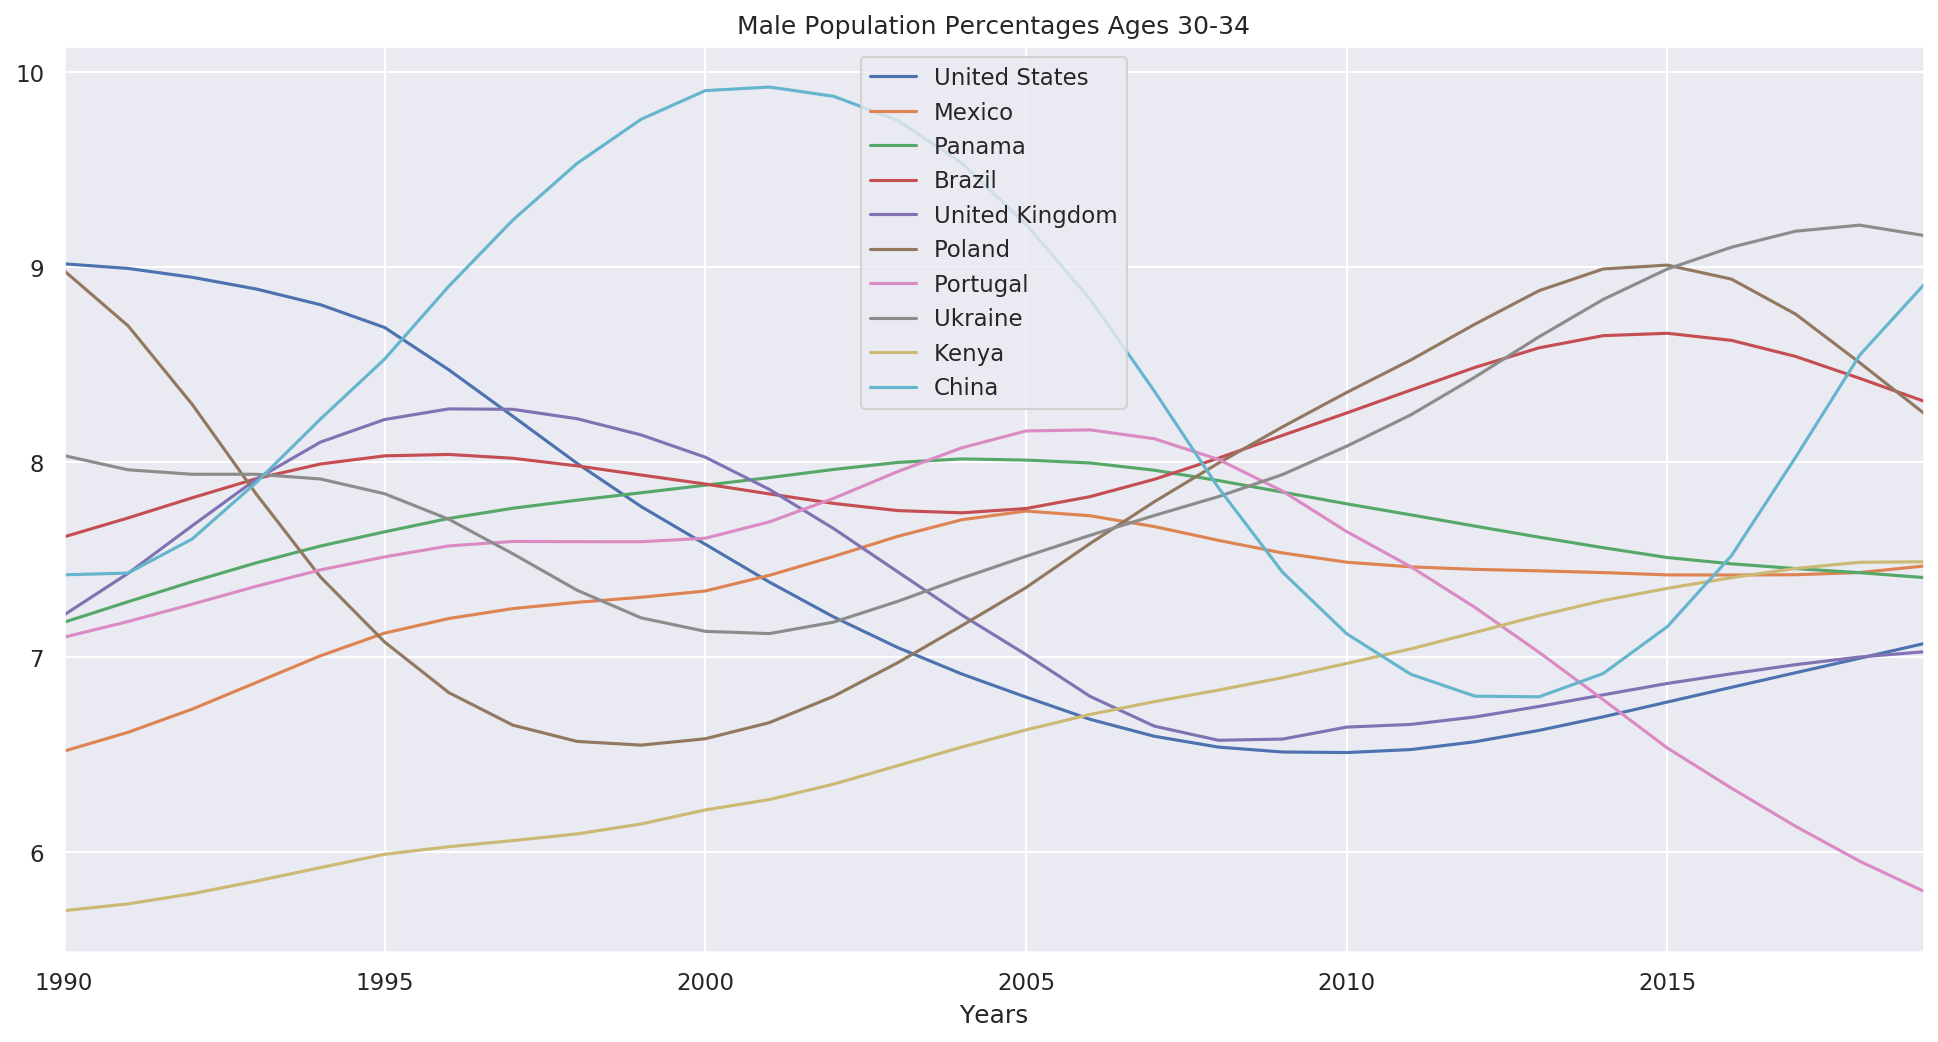

In [65]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SPPOP3034MA5Y'].plot(label=country)
  
plt.title('Male Population Percentages Ages 30-34')
  
plt.xlabel('Years')
  
plt.legend()

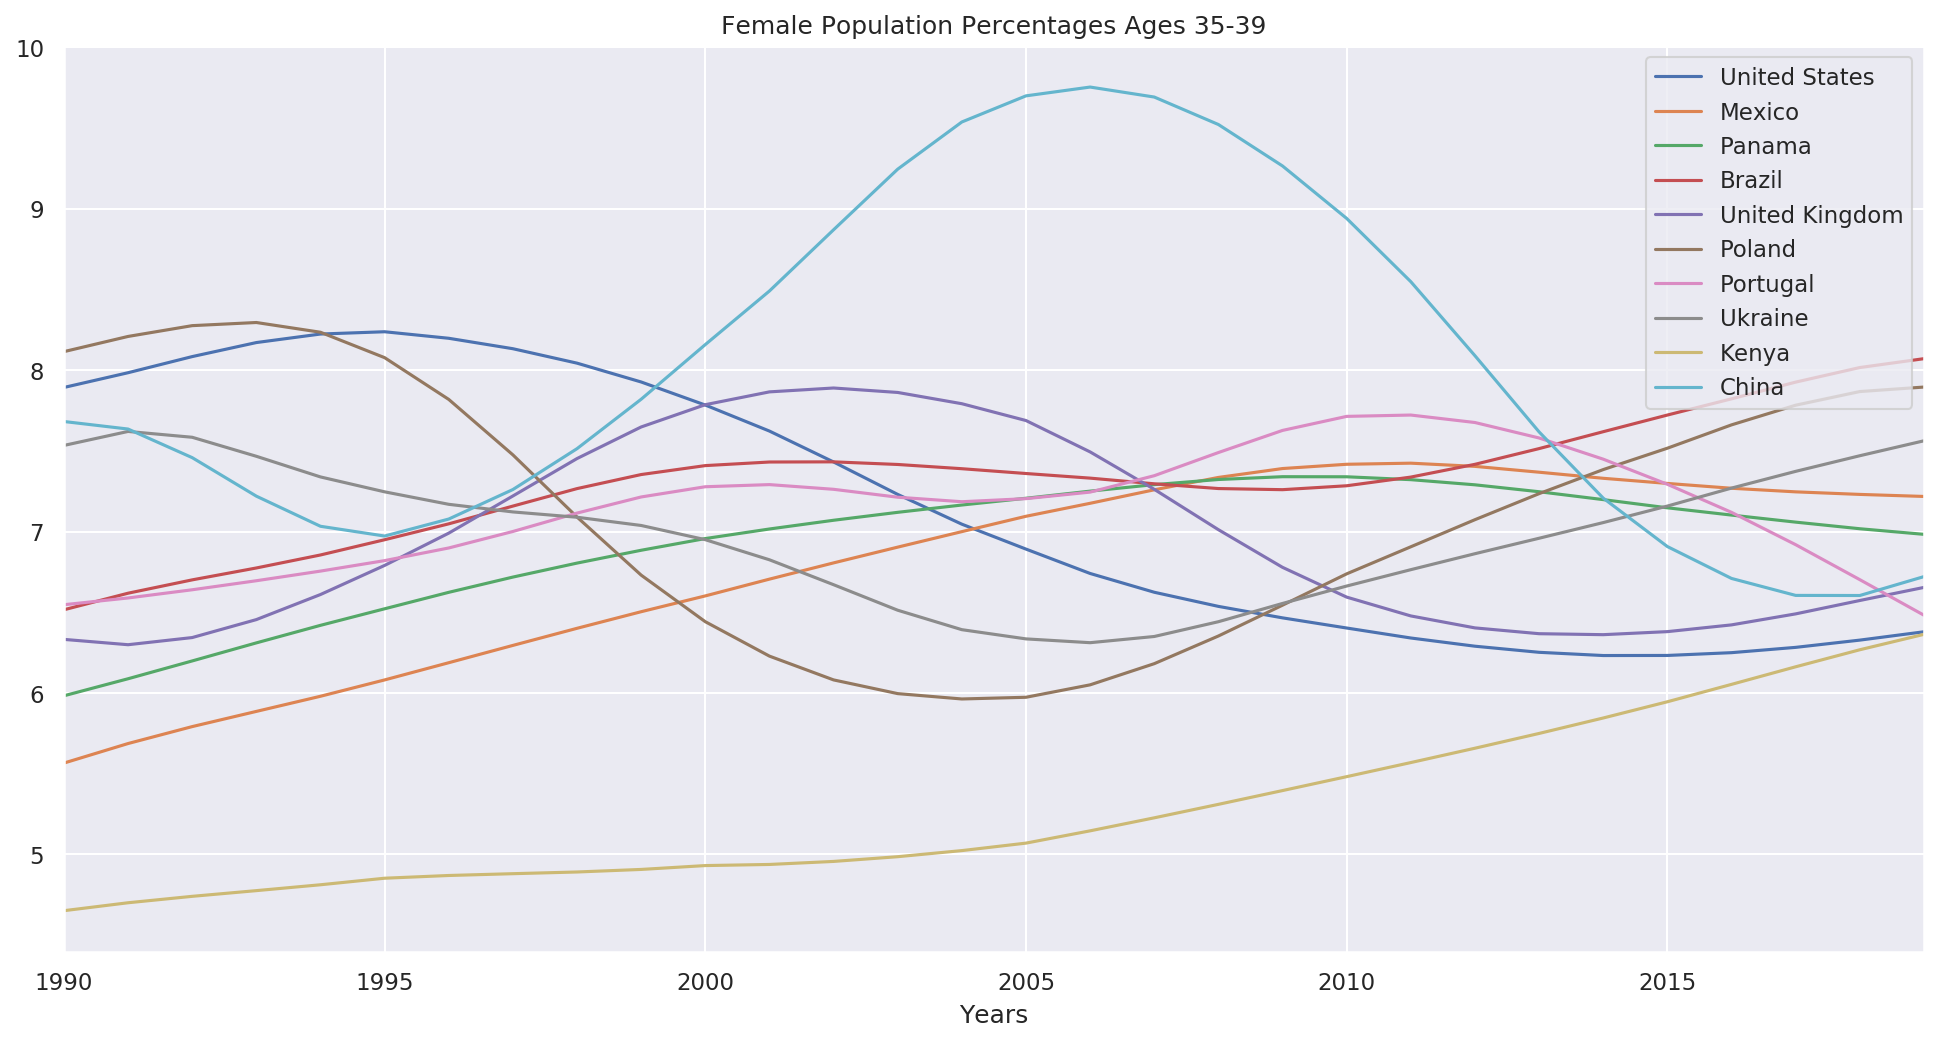

In [66]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SPPOP3539FE5Y'].plot(label=country)
  
plt.title('Female Population Percentages Ages 35-39')
  
plt.xlabel('Years')
  
plt.legend()

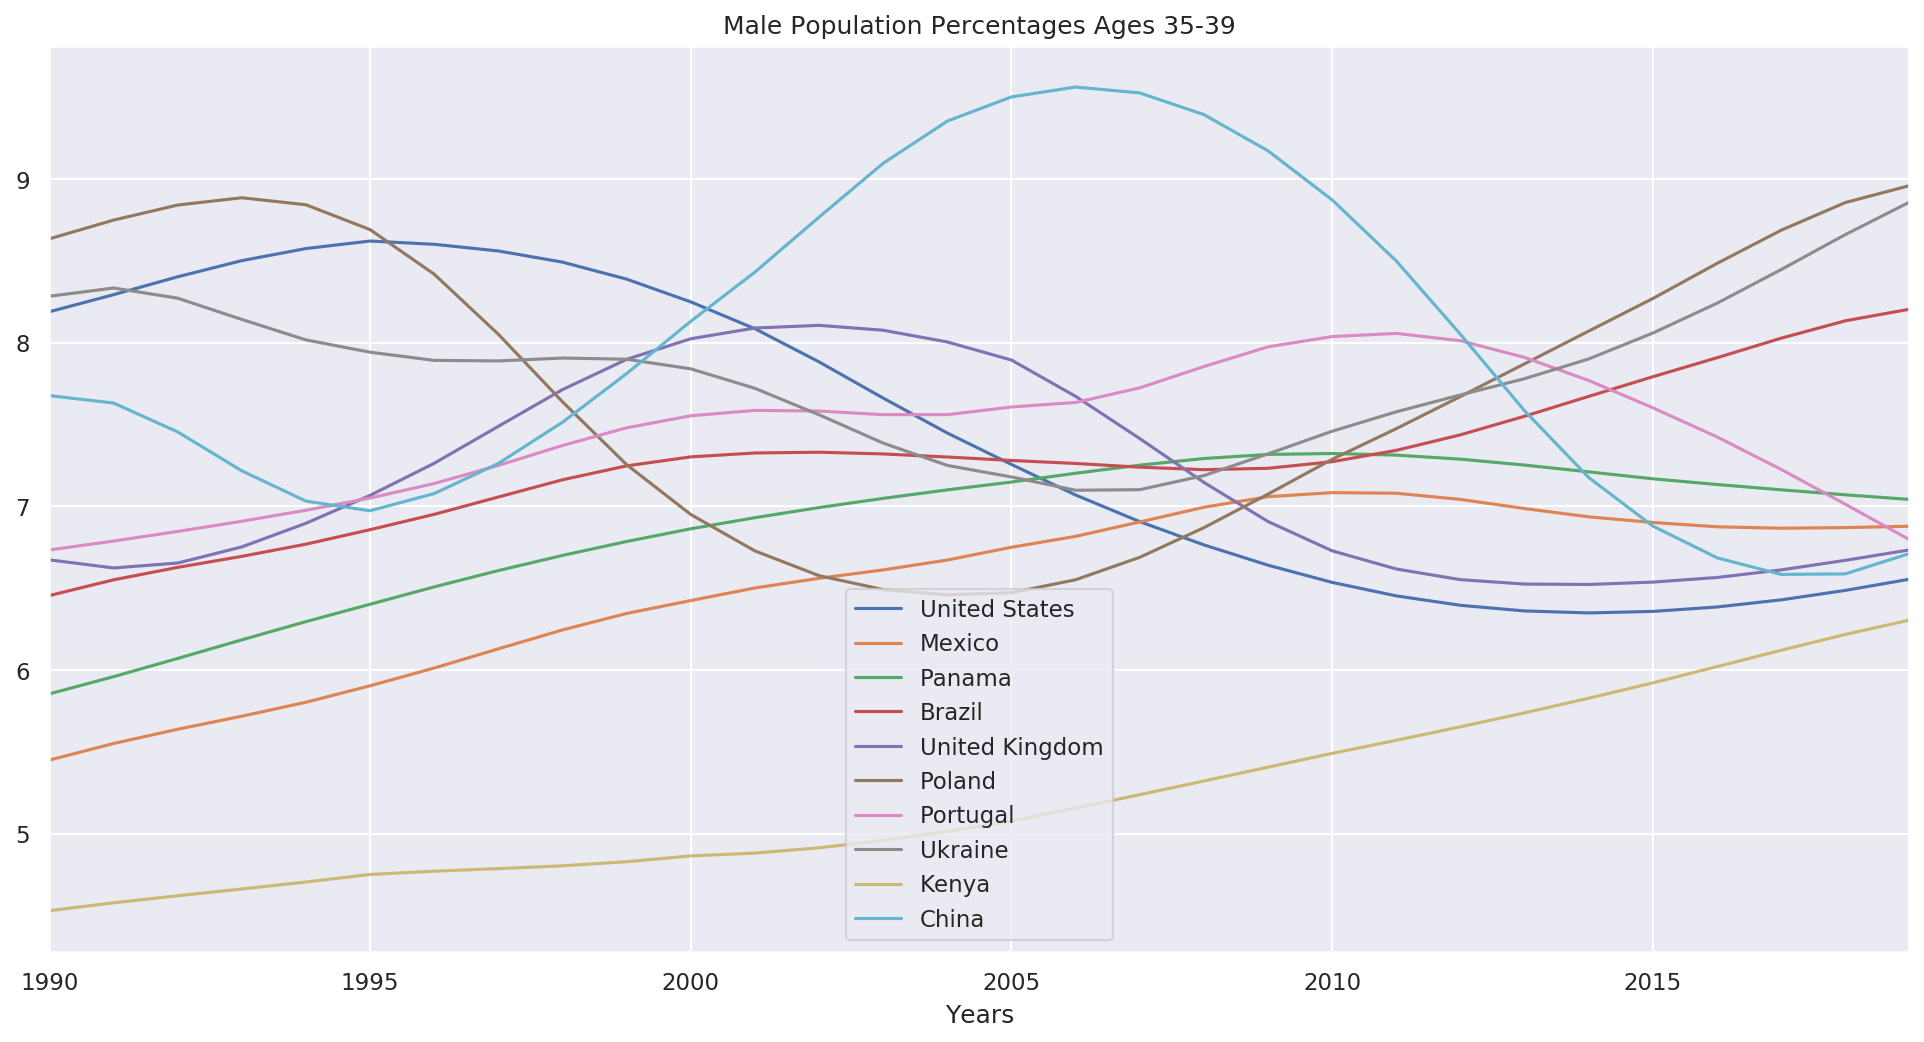

In [67]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SPPOP3539MA5Y'].plot(label=country)
  
plt.title('Male Population Percentages Ages 35-39')
  
plt.xlabel('Years')
  
plt.legend()

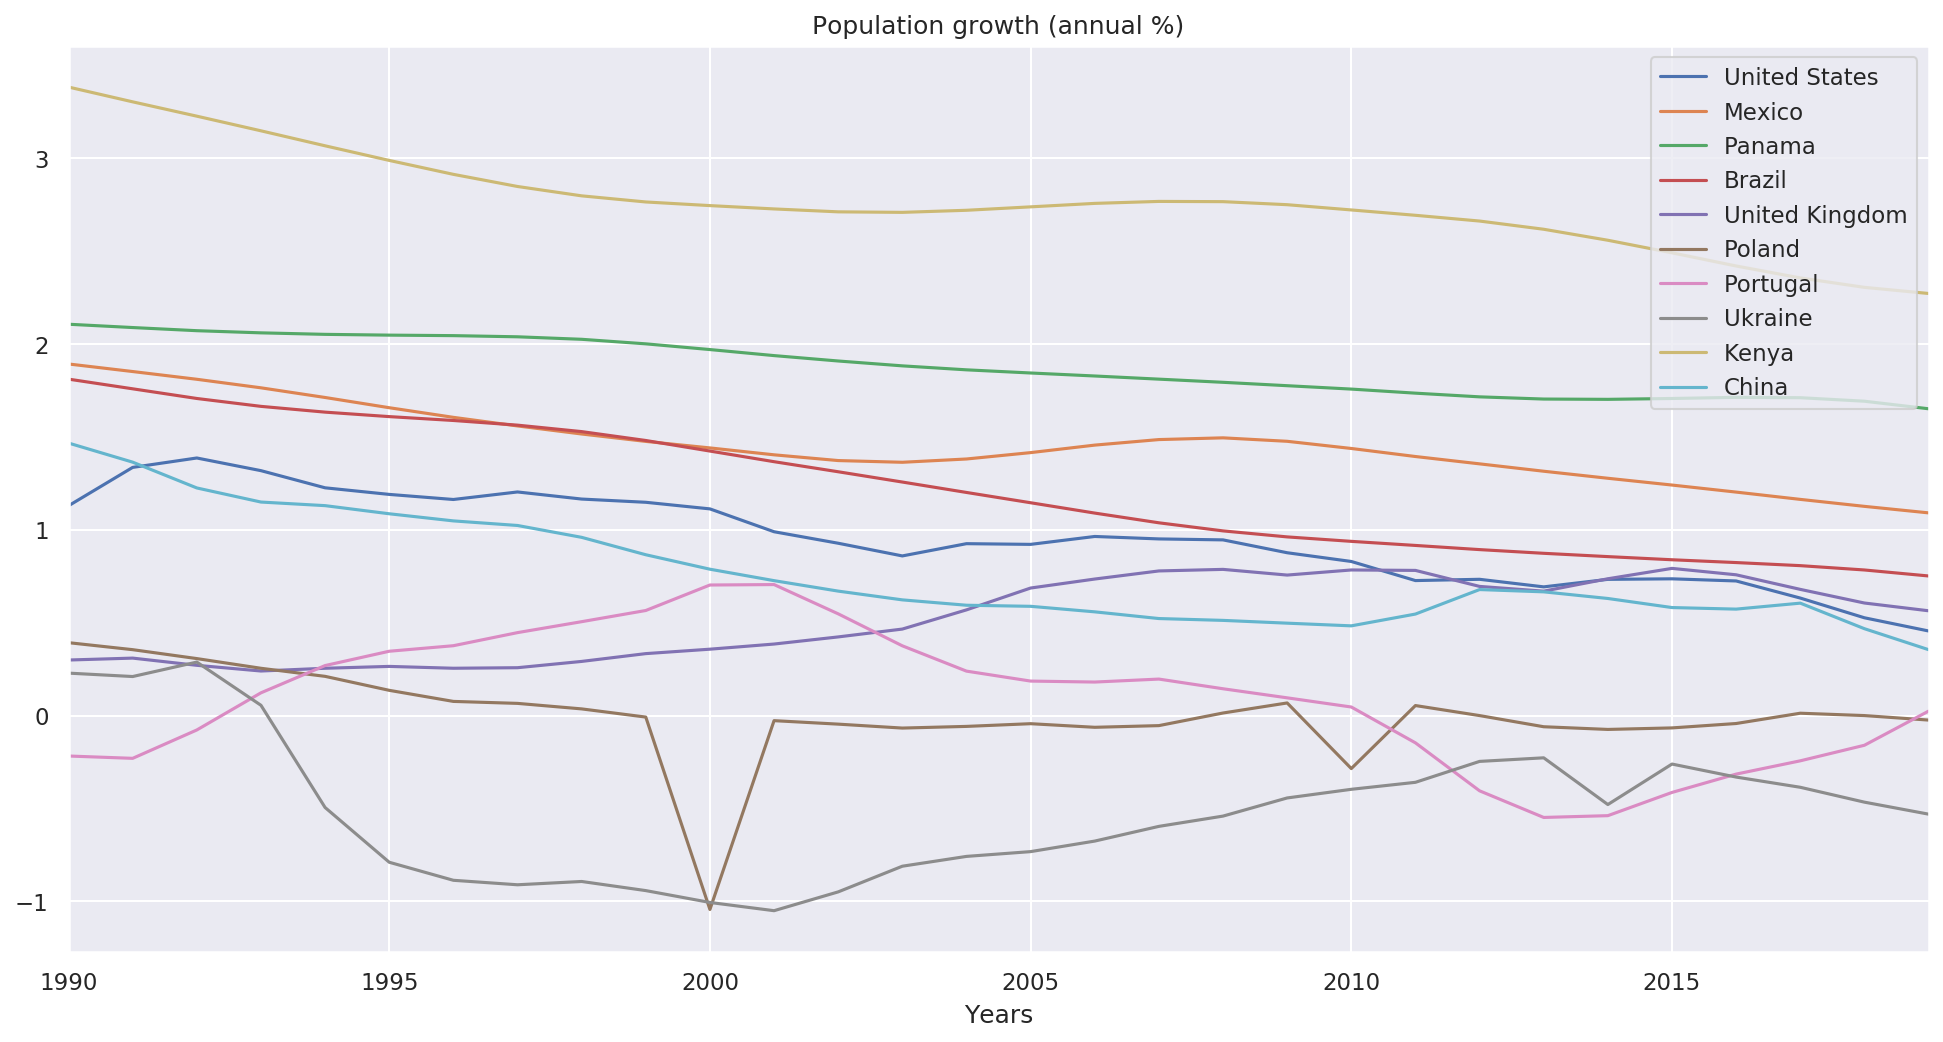

In [68]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SPPOPGROW'].plot(label=country)
  
plt.title('Population growth (annual %)')
  
plt.xlabel('Years')
  
plt.legend()

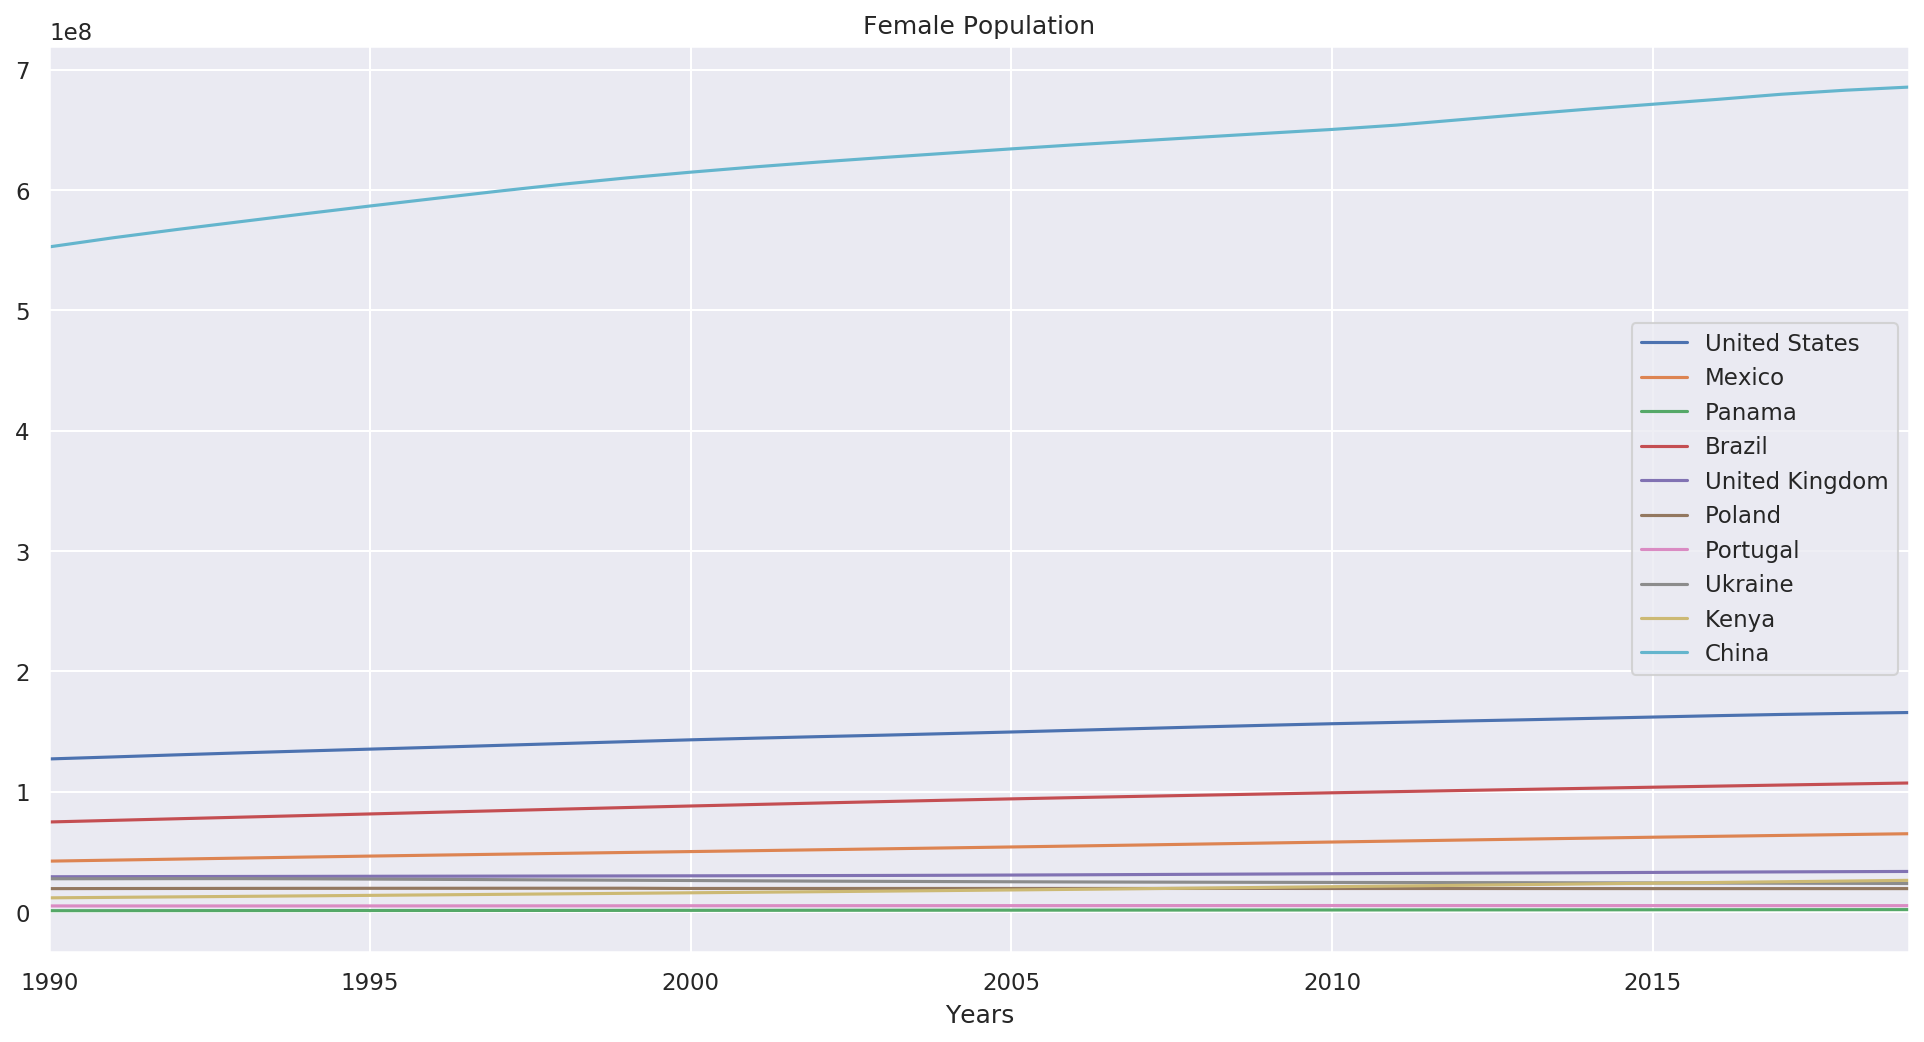

In [69]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SPPOPTOTLFEIN'].plot(label=country)
  
plt.title('Female Population')
  
plt.xlabel('Years')
  
plt.legend()

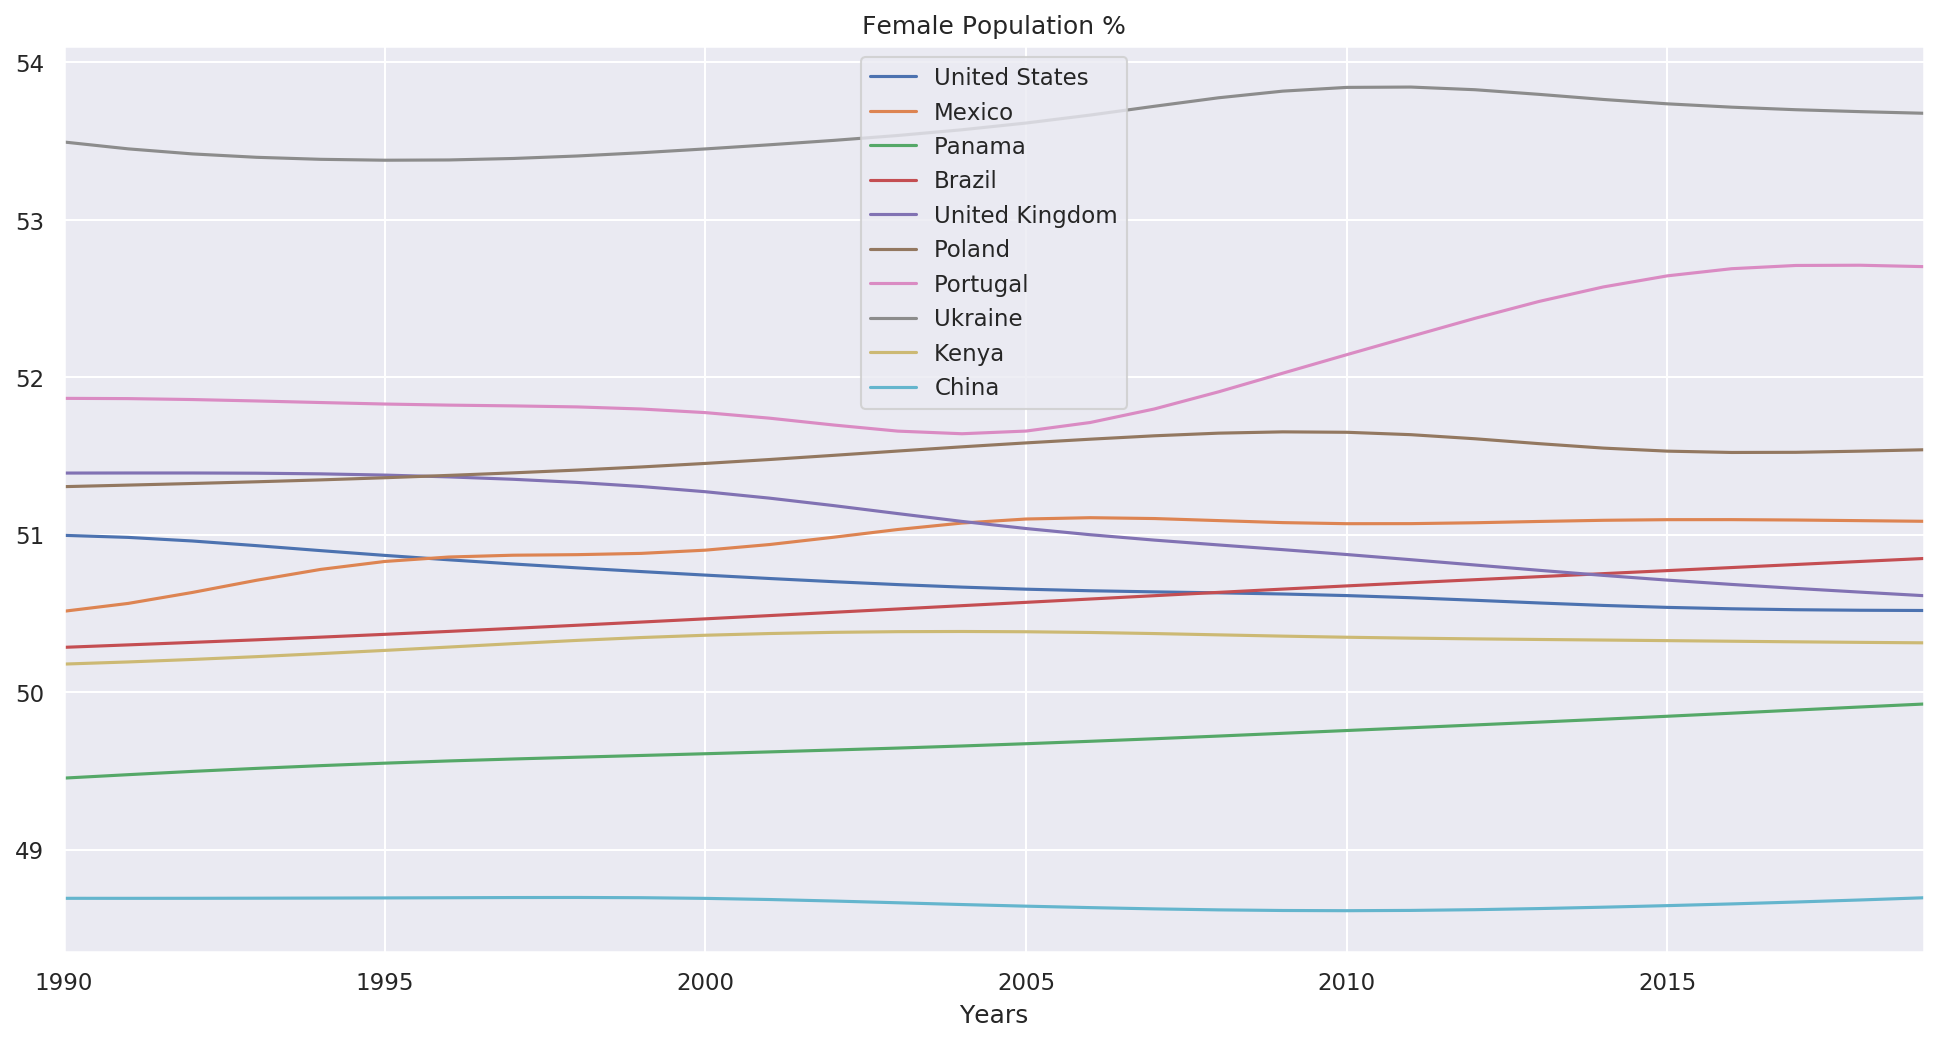

In [70]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SPPOPTOTLFEZS'].plot(label=country)
  
plt.title('Female Population %')
  
plt.xlabel('Years')
  
plt.legend()

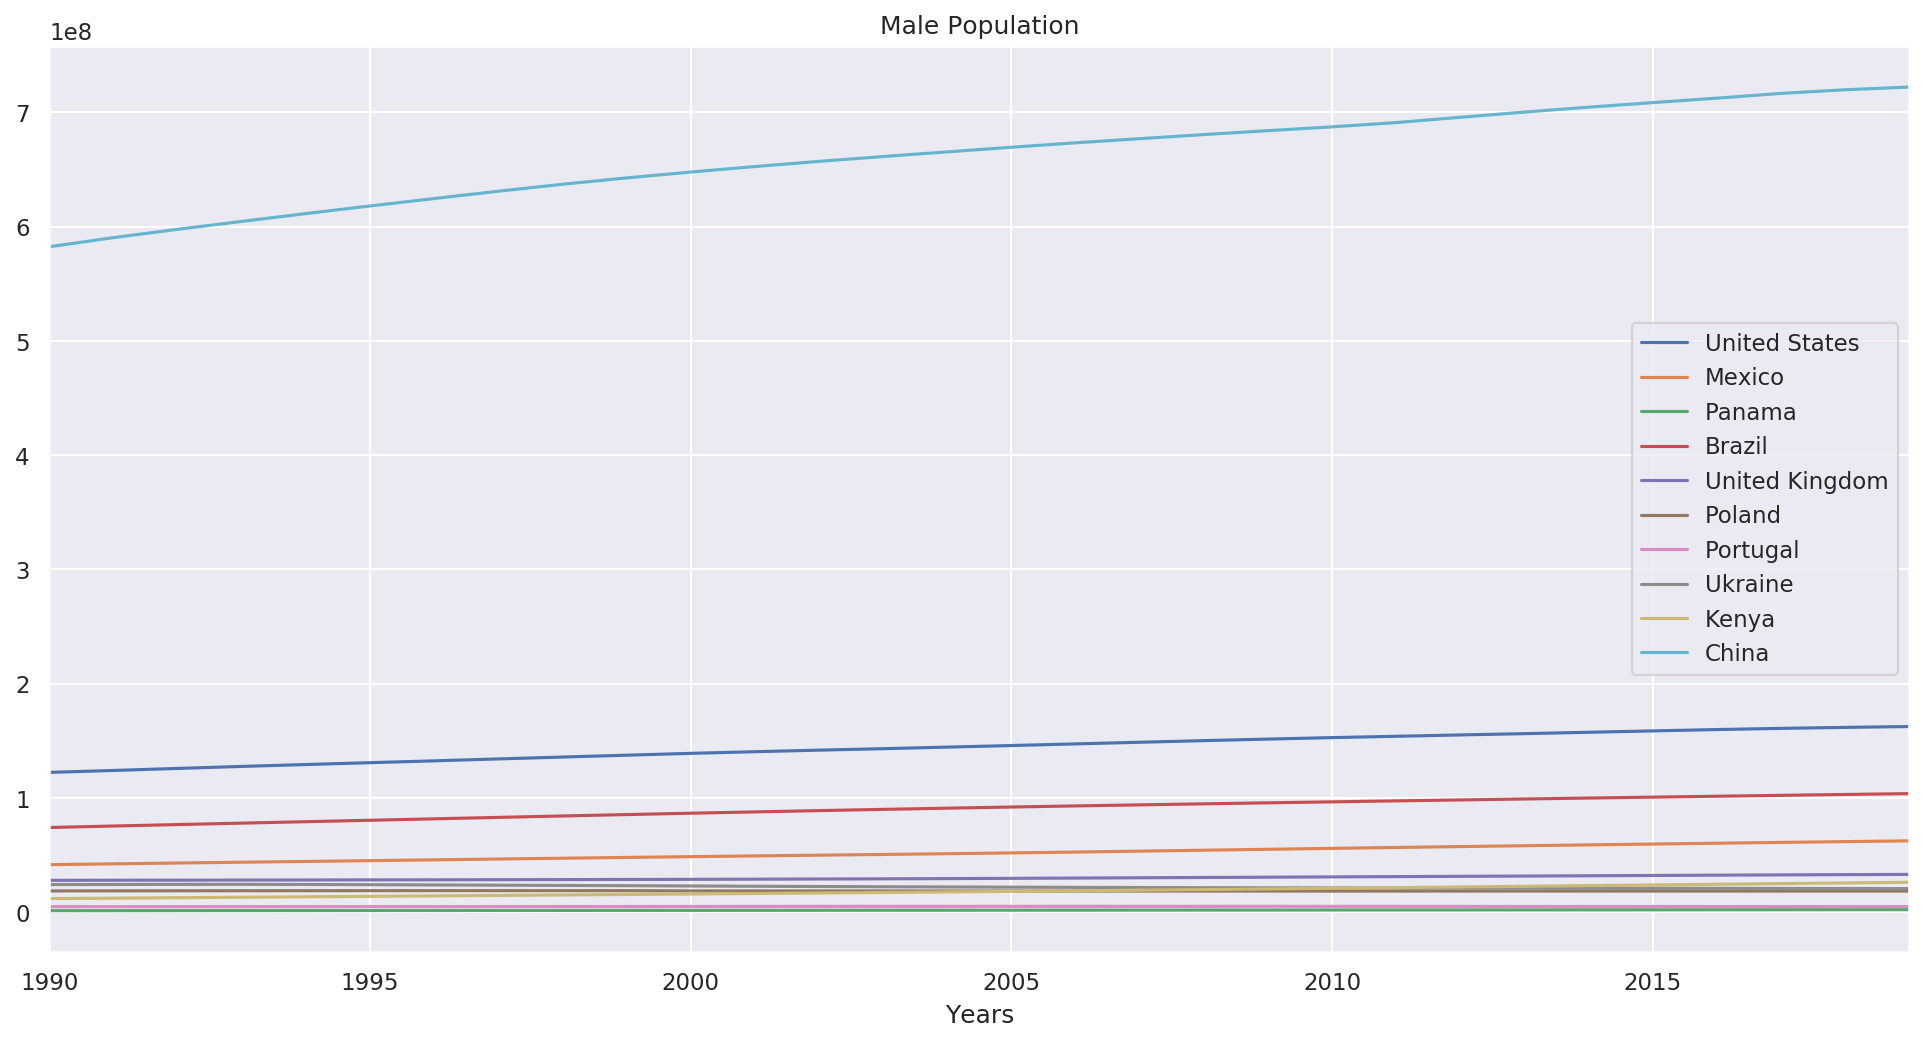

In [71]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SPPOPTOTLMAIN'].plot(label=country)
  
plt.title('Male Population')
  
plt.xlabel('Years')
  
plt.legend()

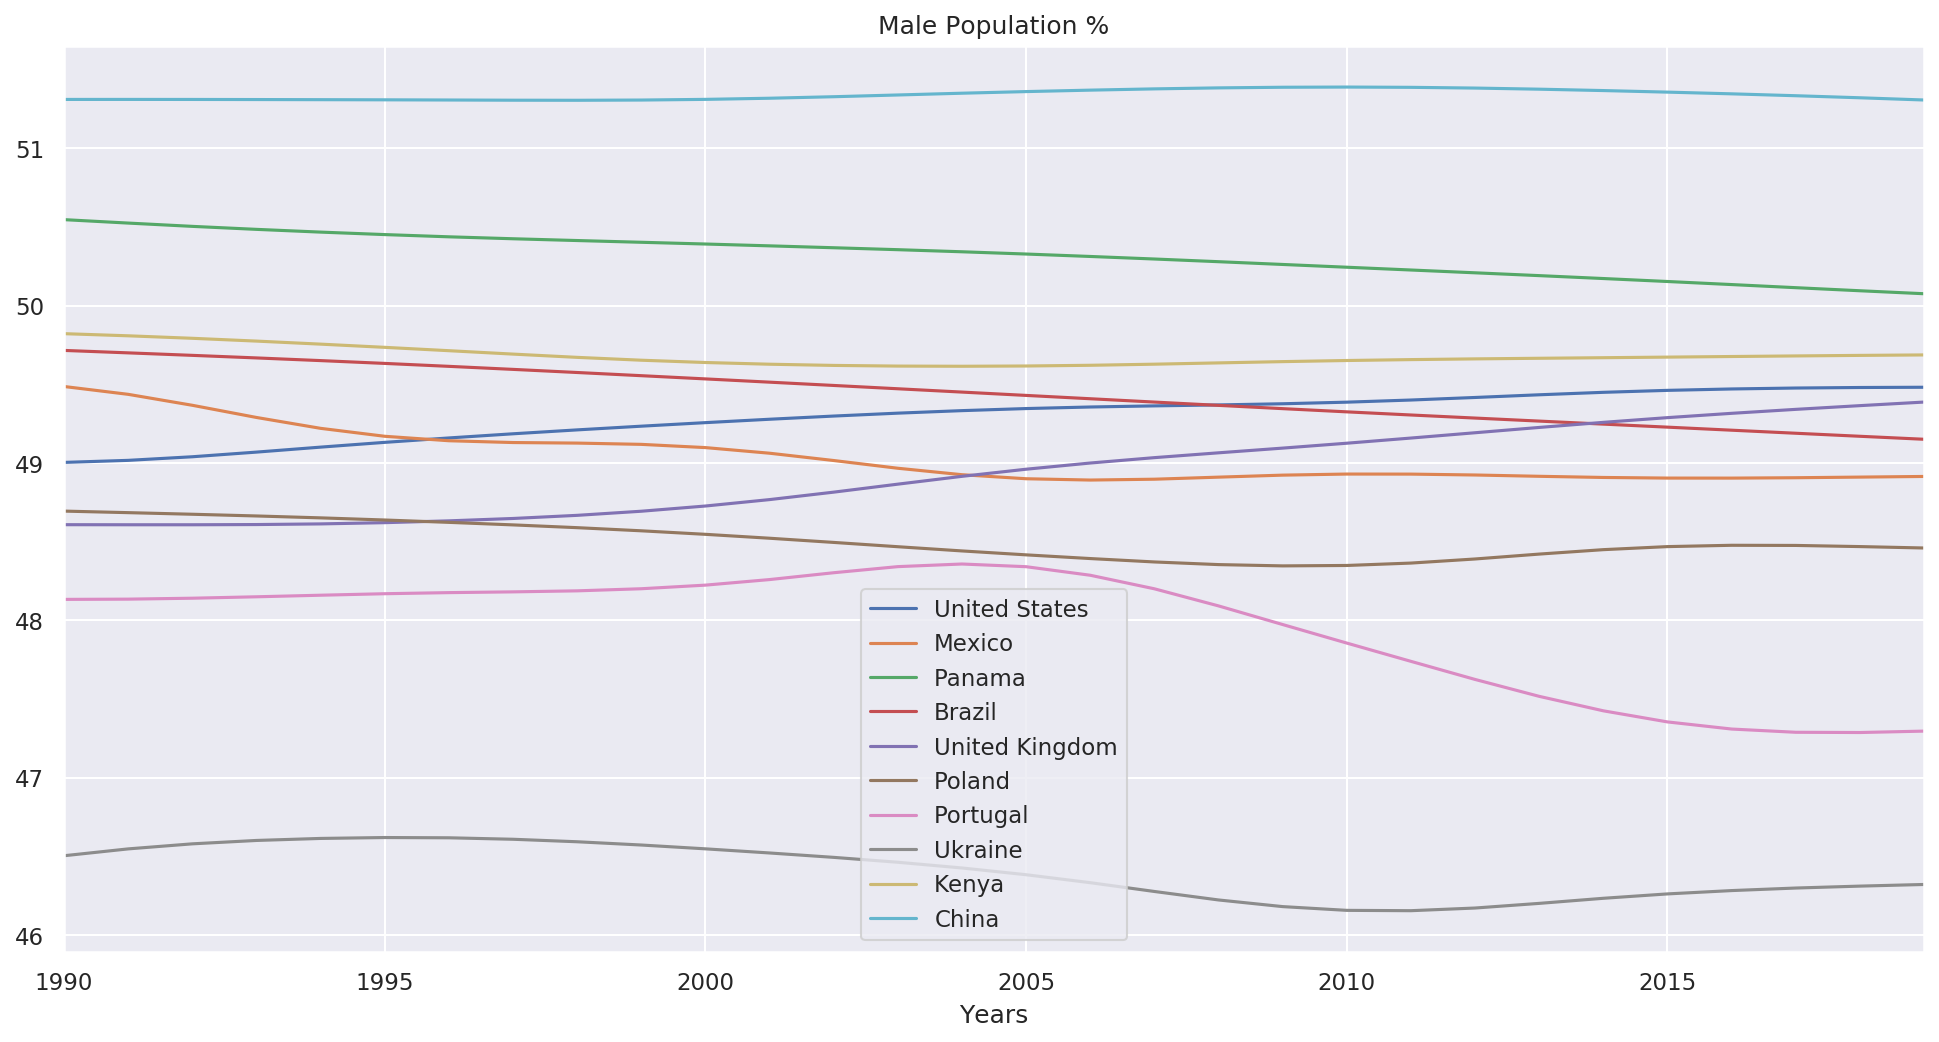

In [72]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SPPOPTOTLMAZS'].plot(label=country)
  
plt.title('Male Population %')
  
plt.xlabel('Years')
  
plt.legend()

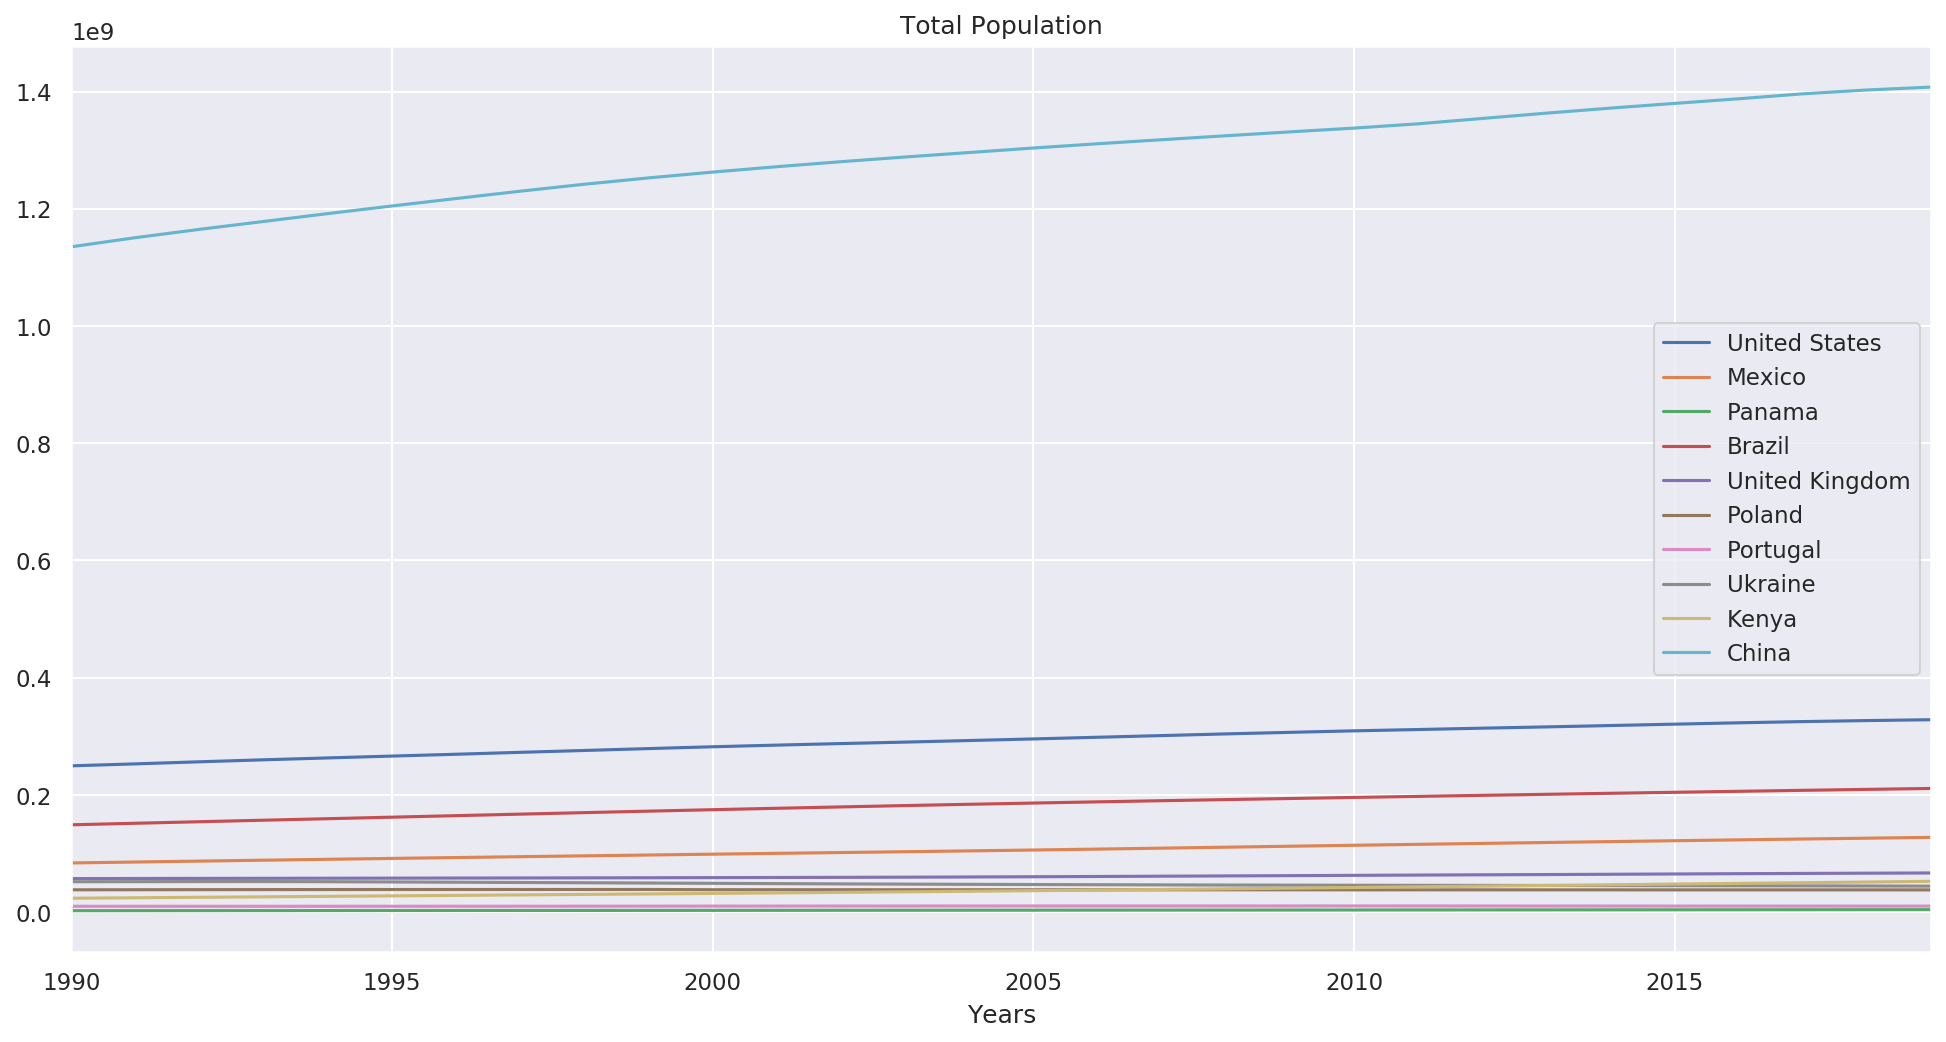

In [73]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SPPOPTOTL'].plot(label=country)
  
plt.title('Total Population')
  
plt.xlabel('Years')
  
plt.legend()

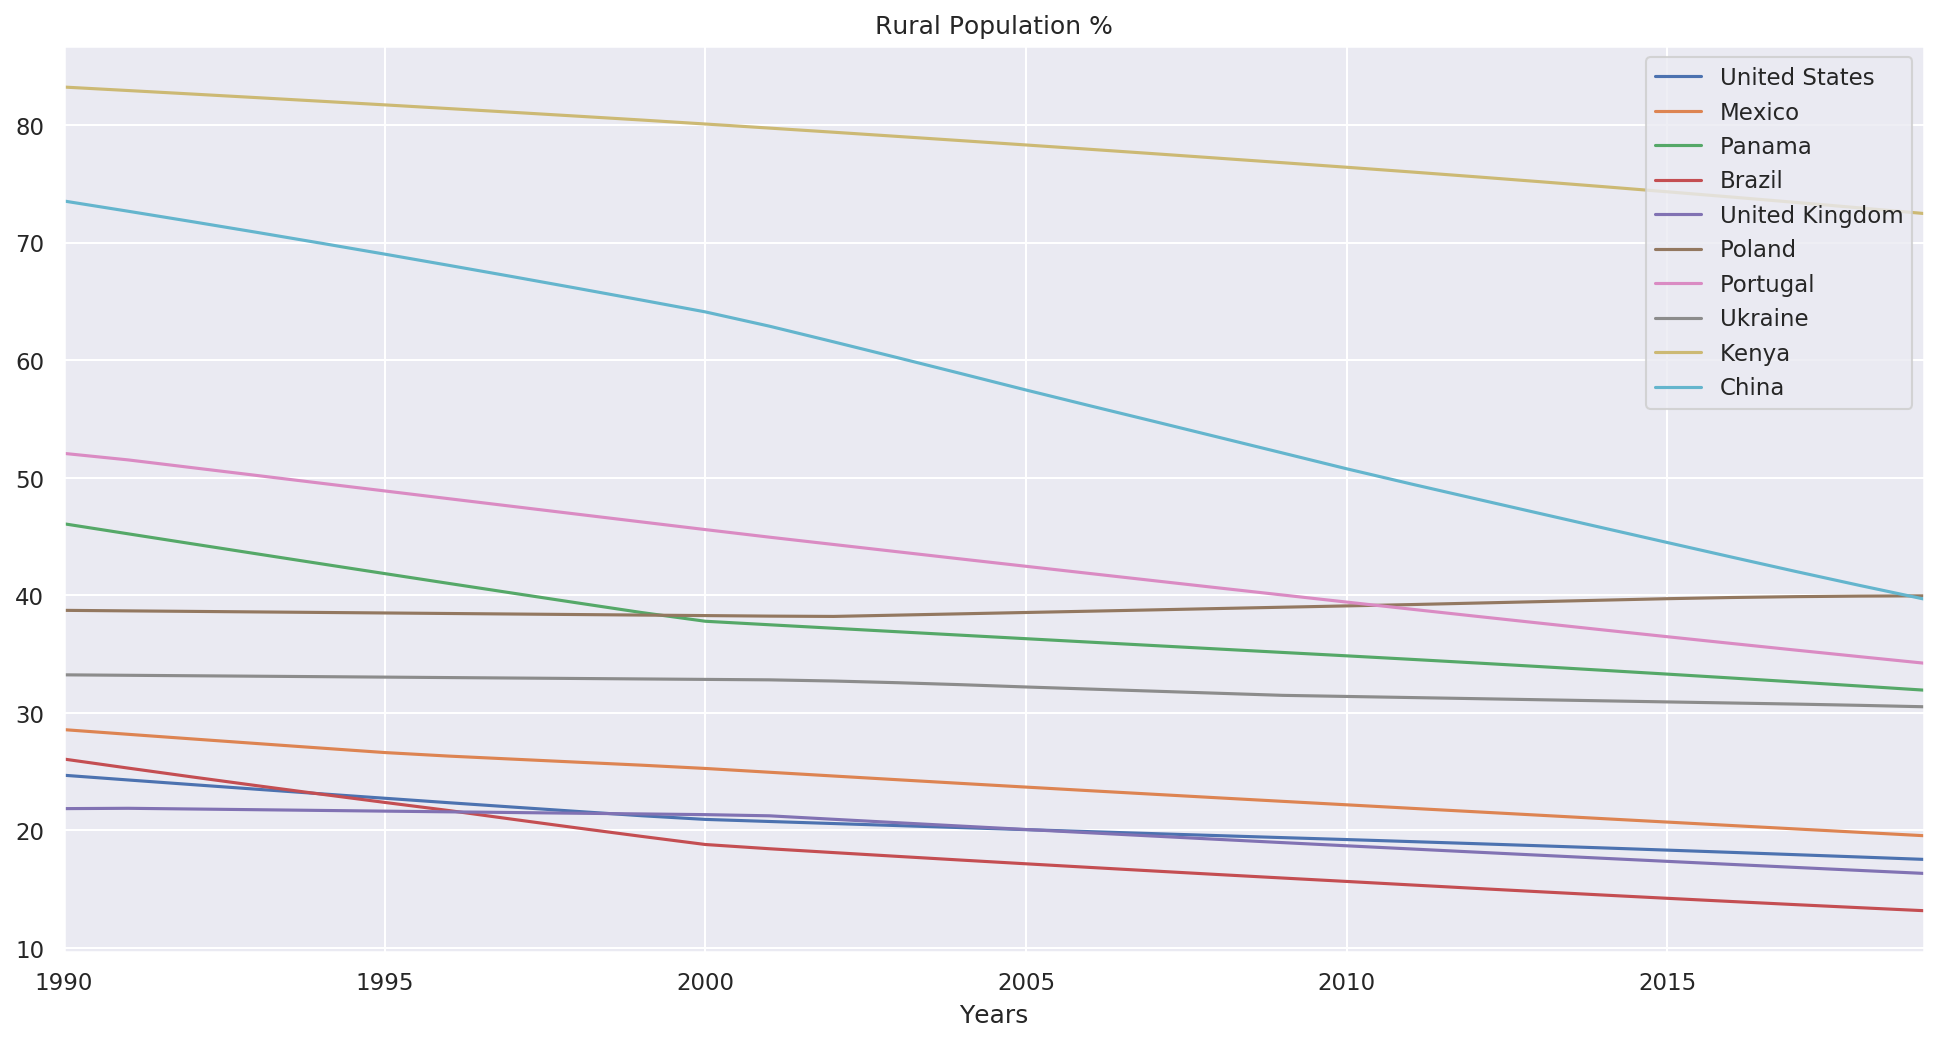

In [74]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['SPRURTOTLZS'].plot(label=country)
  
plt.title('Rural Population %')
  
plt.xlabel('Years')
  
plt.legend()

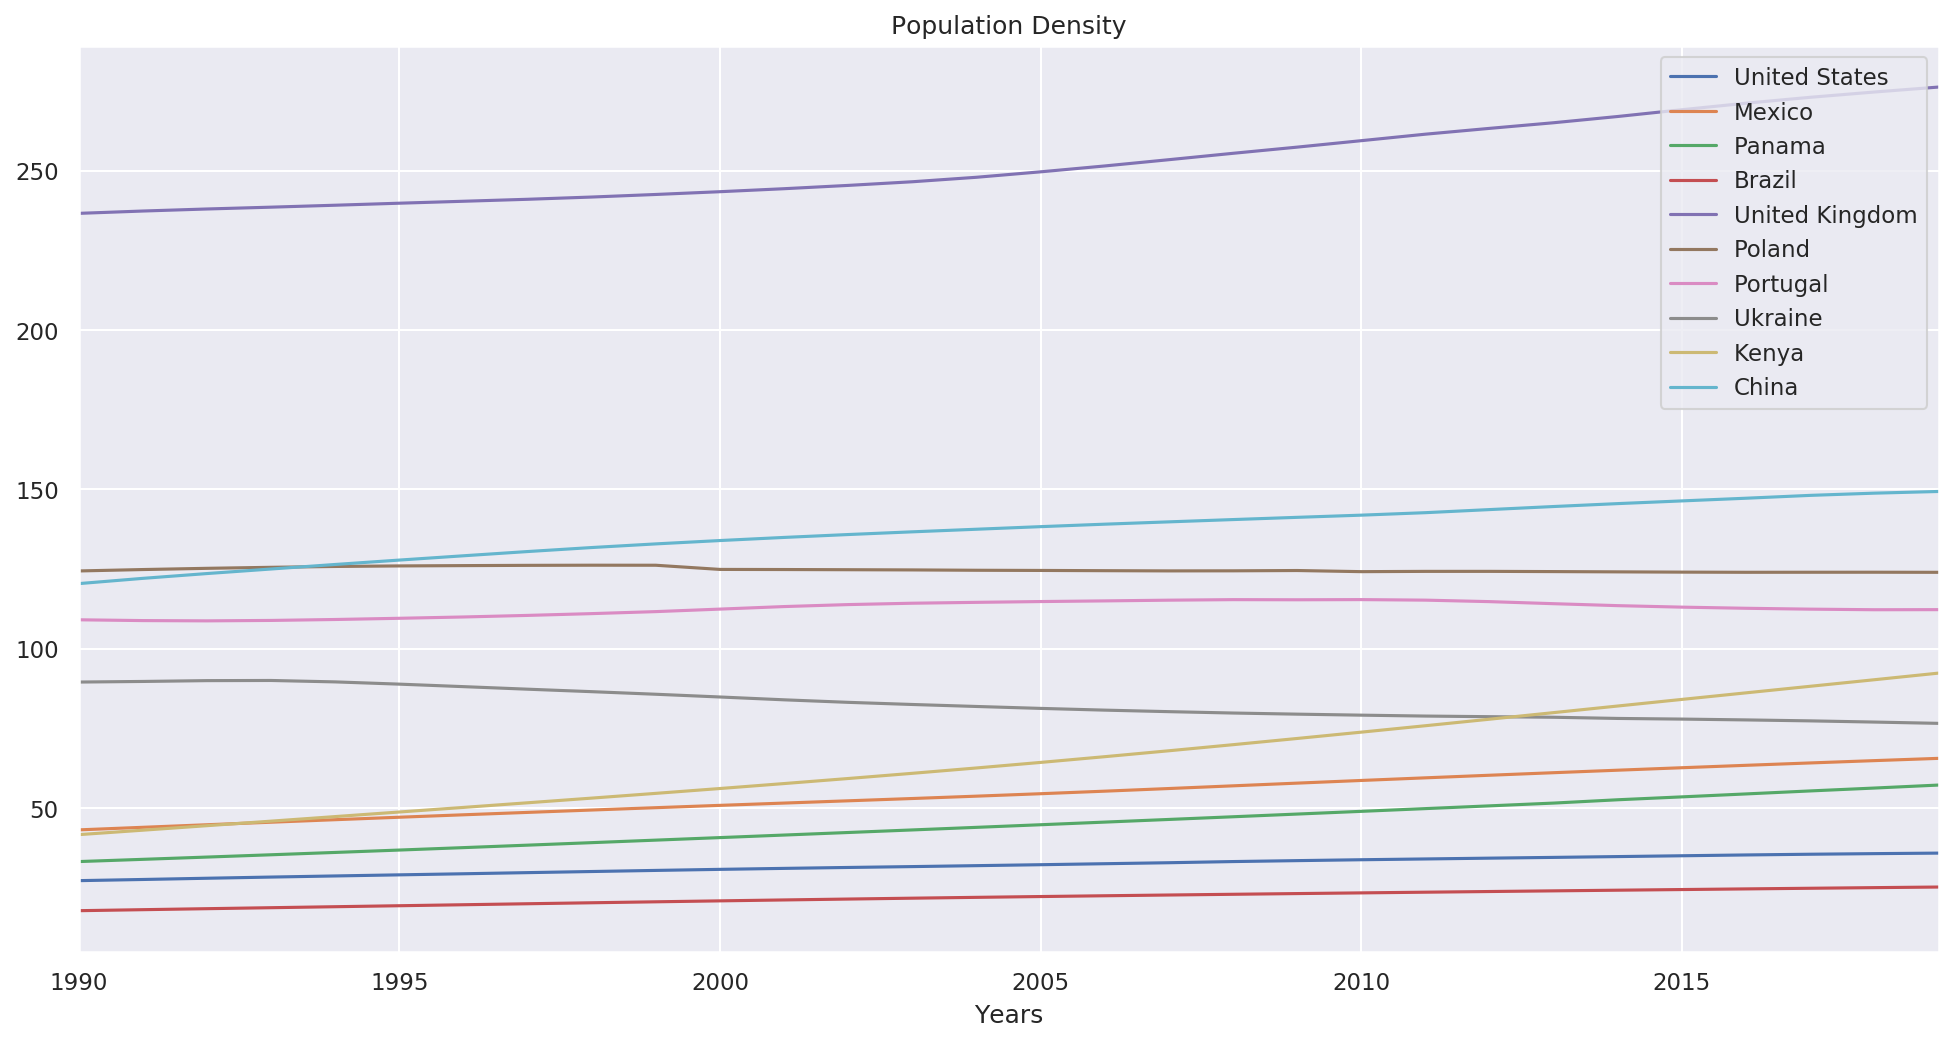

In [75]:
plt.figure(figsize=(16, 8), dpi=150)

for country in countries:
    df_country = df[df["CountryName"] == country]
    df_country['ENPOPDNST'].plot(label=country)
  
plt.title('Population Density')
  
plt.xlabel('Years')
  
plt.legend()